<h2>1 Data Exploration</h2>

<h4>(a) Calculate and report the descriptive statistics (mean, median, standard deviation, minimum, maximum) for all continuous variables in the dataset.</h4>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from scipy.stats import f as f_dist, t as t_dist, jarque_bera, shapiro, pearsonr
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('../../datasets/PropertyFund.csv')
print("PropertyFund Dataset Analysis")

# (a) Descriptive Statistics for Continuous Variables
print("\n(a) Descriptive Statistics for Continuous Variables")
print("-" * 50)

# Identify continuous variables (excluding binary variables: type, location, prior_claims)
continuous_vars = ['claims', 'deductible', 'coverage', 'age', 'premium']

# Calculate descriptive statistics
desc_stats = df[continuous_vars].describe()

# Create a more comprehensive statistics table
stats_table = pd.DataFrame({
    'Mean': df[continuous_vars].mean(),
    'Median': df[continuous_vars].median(),
    'Std Dev': df[continuous_vars].std(),
    'Minimum': df[continuous_vars].min(),
    'Maximum': df[continuous_vars].max(),
    'Skewness': df[continuous_vars].skew(),
    'Kurtosis': df[continuous_vars].kurtosis()
})

# Round to 3 decimal places for better presentation
stats_table = stats_table.round(3)

print("\nComprehensive Descriptive Statistics:")
print(stats_table.to_string())

# # Export to LaTeX format for easy inclusion in report
# print("\n\nLaTeX Table Format:")
# print(stats_table.to_latex(float_format="%.3f", caption="Descriptive Statistics for Continuous Variables", label="tab:desc_stats"))


PropertyFund Dataset Analysis

(a) Descriptive Statistics for Continuous Variables
--------------------------------------------------

Comprehensive Descriptive Statistics:
               Mean   Median  Std Dev  Minimum  Maximum  Skewness  Kurtosis
claims       18.049   17.845    6.448     0.72    41.39     0.254     0.095
deductible    2.490    1.905    1.942     0.51    10.00     1.542     2.351
coverage    189.014  186.750   72.169    50.00   424.50     0.145    -0.292
age          15.438   11.000   14.227     1.00    85.00     1.869     4.496
premium       2.969    2.945    0.822     0.50     5.78     0.245     0.030


<h4>(b) Create a correlation matrix for all continuous variables. Which variable has the strongest linear
relationship with claims?</h4>



(b) Correlation Matrix for Continuous Variables
--------------------------------------------------

Correlation Matrix:
            claims  deductible  coverage    age  premium
claims       1.000      -0.265     0.761  0.199    0.793
deductible  -0.265       1.000    -0.066  0.006   -0.059
coverage     0.761      -0.066     1.000 -0.015    0.723
age          0.199       0.006    -0.015  1.000    0.314
premium      0.793      -0.059     0.723  0.314    1.000

Variable with strongest linear relationship with 'claims':
Variable: premium
Correlation coefficient: 0.793


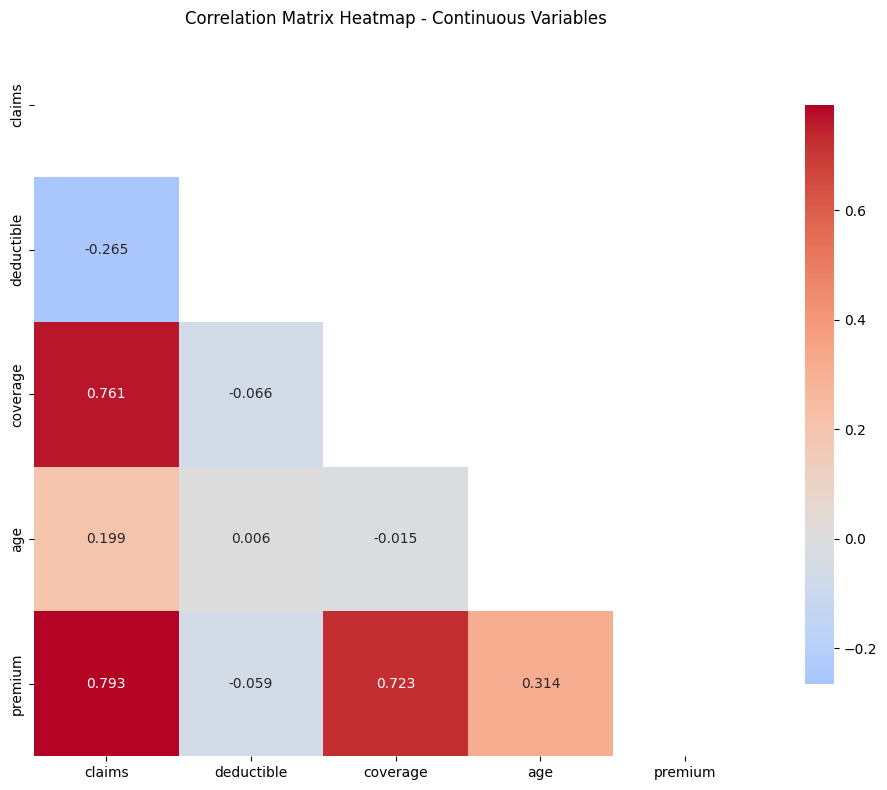

In [82]:
# (b) Correlation Matrix
print("\n\n(b) Correlation Matrix for Continuous Variables")
print("-" * 50)

# Calculate correlation matrix
correlation_matrix = df[continuous_vars].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3).to_string())

# Find the strongest correlation with 'claims' (excluding self-correlation)
claims_correlations = correlation_matrix['claims'].drop('claims')
strongest_corr_var = claims_correlations.abs().idxmax()
strongest_corr_value = claims_correlations[strongest_corr_var]

print(f"\nVariable with strongest linear relationship with 'claims':")
print(f"Variable: {strongest_corr_var}")
print(f"Correlation coefficient: {strongest_corr_value:.3f}")

# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, mask=mask, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Correlation Matrix Heatmap - Continuous Variables')
plt.tight_layout()
plt.show()

# # Export correlation matrix to LaTeX
# print("\nLaTeX Correlation Matrix:")
# print(correlation_matrix.round(3).to_latex(float_format="%.3f", caption="Correlation Matrix for Continuous Variables", label="tab:corr_matrix"))


<h4>(c) Identify any variables that appear to have skewed distributions based on the descriptive statistics. For these variables, comment on whether a logarithmic transformation might be appropriate.</h4>



(c) Skewness Analysis and Log Transformation Assessment
--------------------------------------------------

Skewness Assessment:
Rule of thumb: |skewness| > 1 indicates highly skewed distribution
Rule of thumb: 0.5 < |skewness| < 1 indicates moderately skewed distribution

claims:
  Skewness: 0.254
  Assessment: Approximately symmetric

deductible:
  Skewness: 1.542
  Assessment: Highly skewed
  Log transformation skewness: 0.134
  Improvement from log transformation: 1.408
  Recommendation: Log transformation would improve normality

coverage:
  Skewness: 0.145
  Assessment: Approximately symmetric

age:
  Skewness: 1.869
  Assessment: Highly skewed
  Log transformation skewness: -0.347
  Improvement from log transformation: 1.523
  Recommendation: Log transformation would improve normality

premium:
  Skewness: 0.245
  Assessment: Approximately symmetric



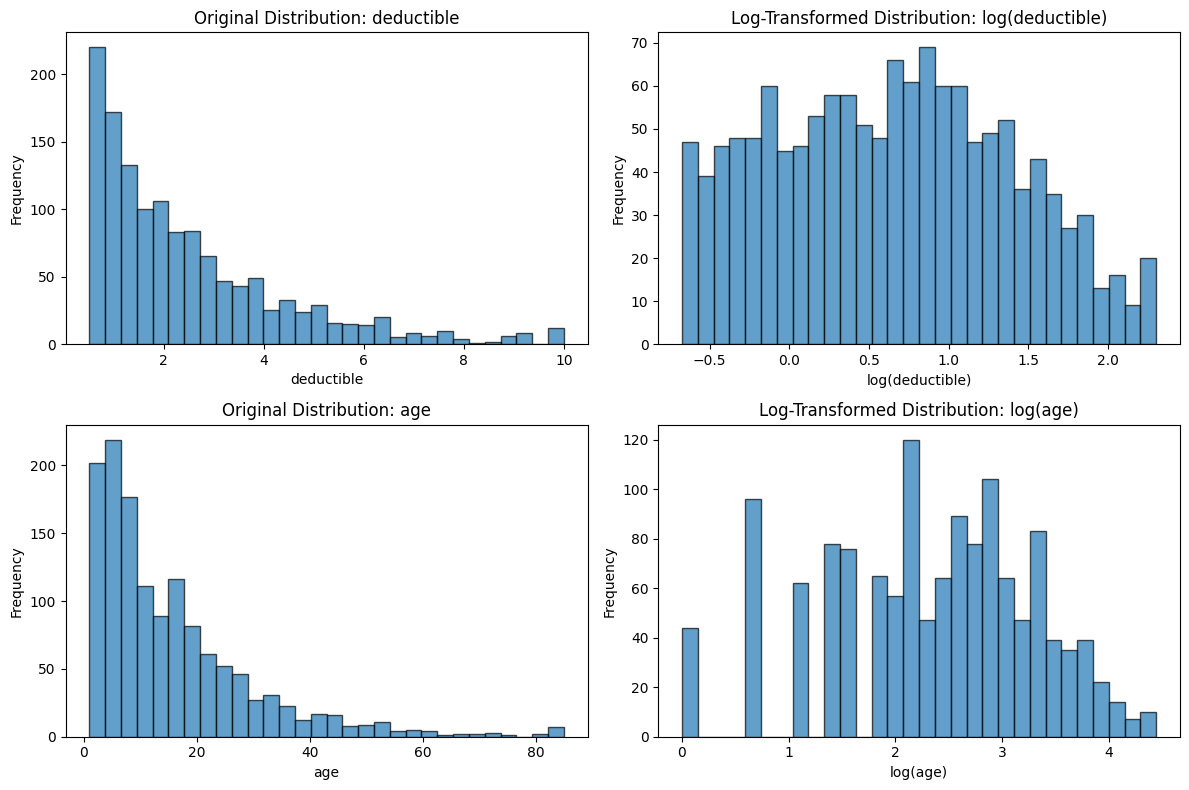

In [83]:

# (c) Skewness Analysis and Log Transformation Assessment
print("\n\n(c) Skewness Analysis and Log Transformation Assessment")
print("-" * 50)

print("\nSkewness Assessment:")
print("Rule of thumb: |skewness| > 1 indicates highly skewed distribution")
print("Rule of thumb: 0.5 < |skewness| < 1 indicates moderately skewed distribution")
print()

skewed_vars = []
for var in continuous_vars:
    skewness = df[var].skew()
    print(f"{var}:")
    print(f"  Skewness: {skewness:.3f}")
    
    if abs(skewness) > 1:
        print(f"  Assessment: Highly skewed")
        skewed_vars.append(var)
    elif abs(skewness) > 0.5:
        print(f"  Assessment: Moderately skewed")
        skewed_vars.append(var)
    else:
        print(f"  Assessment: Approximately symmetric")
    
    # Check if log transformation is appropriate
    if var in skewed_vars and df[var].min() > 0:
        log_skewness = np.log(df[var]).skew()
        improvement = abs(skewness) - abs(log_skewness)
        print(f"  Log transformation skewness: {log_skewness:.3f}")
        print(f"  Improvement from log transformation: {improvement:.3f}")
        if improvement > 0.2:
            print(f"  Recommendation: Log transformation would improve normality")
        else:
            print(f"  Recommendation: Log transformation shows minimal improvement")
    elif var in skewed_vars and df[var].min() <= 0:
        print(f"  Note: Contains zero/negative values - standard log transformation not appropriate")
        print(f"  Alternative: Consider log(x+1) or other transformations")
    
    print()

# Create distribution plots for skewed variables
if skewed_vars:
    fig, axes = plt.subplots(len(skewed_vars), 2, figsize=(12, 4*len(skewed_vars)))
    if len(skewed_vars) == 1:
        axes = axes.reshape(1, -1)
    
    for i, var in enumerate(skewed_vars):
        # Original distribution
        axes[i, 0].hist(df[var], bins=30, alpha=0.7, edgecolor='black')
        axes[i, 0].set_title(f'Original Distribution: {var}')
        axes[i, 0].set_xlabel(var)
        axes[i, 0].set_ylabel('Frequency')
        
        # Log-transformed distribution (if applicable)
        if df[var].min() > 0:
            axes[i, 1].hist(np.log(df[var]), bins=30, alpha=0.7, edgecolor='black')
            axes[i, 1].set_title(f'Log-Transformed Distribution: log({var})')
            axes[i, 1].set_xlabel(f'log({var})')
        else:
            axes[i, 1].hist(np.log(df[var] + 1), bins=30, alpha=0.7, edgecolor='black')
            axes[i, 1].set_title(f'Log(x+1) Transformed Distribution: {var}')
            axes[i, 1].set_xlabel(f'log({var} + 1)')
        
        axes[i, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [84]:

print("\nSummary of Findings:")
print("-" * 50)
print(f"Variables with skewed distributions: {', '.join(skewed_vars) if skewed_vars else 'None'}")
print(f"Variable most strongly correlated with claims: {strongest_corr_var} (r = {strongest_corr_value:.3f})")

# Additional insights
print(f"\nData Overview:")
print(f"Total observations: {len(df):,}")
print(f"Variables analyzed: {len(continuous_vars)}")
print(f"Missing values: {df[continuous_vars].isnull().sum().sum()}")


Summary of Findings:
--------------------------------------------------
Variables with skewed distributions: deductible, age
Variable most strongly correlated with claims: premium (r = 0.793)

Data Overview:
Total observations: 1,340
Variables analyzed: 5
Missing values: 0


<h2>2 Simple Regression Analysis</h2>

<h4>(a) Fit a simple linear regression model with claims as the dependent variable and coverage as the explanatory variable. Write the fitted regression equation.</h4>

In [85]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Simple Linear Regression Analysis: Claims vs Coverage")

# Prepare the data
X = df[['coverage']].values  # Independent variable (explanatory)
y = df['claims'].values      # Dependent variable

# Remove any rows with missing values
mask = ~(np.isnan(X.flatten()) | np.isnan(y))
X_clean = X[mask].reshape(-1, 1)
y_clean = y[mask]

print(f"Dataset Information:")
print(f"Total observations: {len(df):,}")
print(f"Observations used in regression: {len(X_clean):,}")
print(f"Missing values removed: {len(df) - len(X_clean):,}")

# (a) Fit Simple Linear Regression Model
print("\n(a) Simple Linear Regression Model Fitting")
print("-" * 50)

# Fit the model
model = LinearRegression()
model.fit(X_clean, y_clean)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Get predictions for R-squared calculation
y_pred = model.predict(X_clean)

print(f"Model Coefficients:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}")

print(f"\nFitted Regression Equation:")
print(f"Claims = {intercept:.4f} + {slope:.4f} × Coverage")
print(f"\nIn mathematical notation:")
print(f"ŷ = {intercept:.4f} + {slope:.4f}x")
print(f"where ŷ = predicted claims, x = coverage")

# # LaTeX format for the equation
# print(f"\nLaTeX format for report:")
# print(f"\\hat{{Claims}} = {intercept:.4f} + {slope:.4f} \\times Coverage")


Simple Linear Regression Analysis: Claims vs Coverage
Dataset Information:
Total observations: 1,340
Observations used in regression: 1,340
Missing values removed: 0

(a) Simple Linear Regression Model Fitting
--------------------------------------------------
Model Coefficients:
Intercept (β₀): 5.2054
Slope (β₁): 0.0679

Fitted Regression Equation:
Claims = 5.2054 + 0.0679 × Coverage

In mathematical notation:
ŷ = 5.2054 + 0.0679x
where ŷ = predicted claims, x = coverage


<h4>(b) Interpret the slope coefficient in practical terms. What does it tell us about the relationship between coverage and claims?</h4>

In [86]:

# (b) Interpret the Slope Coefficient
print("\n\n(b) Interpretation of Slope Coefficient")
print("-" * 50)

print(f"Slope coefficient: {slope:.4f}")
print(f"\nPractical Interpretation:")

if slope > 0:
    print(f"• For every 1-unit increase in coverage, claims are expected to increase by {slope:.4f} units, on average.")
    print(f"• This indicates a positive relationship between coverage and claims.")
    print(f"• Properties with higher coverage amounts tend to have higher claims.")
elif slope < 0:
    print(f"• For every 1-unit increase in coverage, claims are expected to decrease by {abs(slope):.4f} units, on average.")
    print(f"• This indicates a negative relationship between coverage and claims.")
    print(f"• Properties with higher coverage amounts tend to have lower claims.")
else:
    print(f"• The slope is approximately zero, suggesting no linear relationship between coverage and claims.")

# Additional interpretation based on magnitude
slope_percentage = slope * 100
print(f"\nAlternative interpretation:")
print(f"• For every 100-unit increase in coverage, claims change by {slope_percentage:.2f} units, on average.")

# Calculate some example predictions
coverage_examples = [100, 150, 200, 250]
print(f"\nExample predictions:")
for cov in coverage_examples:
    pred_claims = intercept + slope * cov
    print(f"• Coverage = {cov}: Predicted Claims = {pred_claims:.2f}")




(b) Interpretation of Slope Coefficient
--------------------------------------------------
Slope coefficient: 0.0679

Practical Interpretation:
• For every 1-unit increase in coverage, claims are expected to increase by 0.0679 units, on average.
• This indicates a positive relationship between coverage and claims.
• Properties with higher coverage amounts tend to have higher claims.

Alternative interpretation:
• For every 100-unit increase in coverage, claims change by 6.79 units, on average.

Example predictions:
• Coverage = 100: Predicted Claims = 12.00
• Coverage = 150: Predicted Claims = 15.40
• Coverage = 200: Predicted Claims = 18.80
• Coverage = 250: Predicted Claims = 22.19


<h4>(c) Calculate and interpret the coefficient of determination (R2) for this model.</h4>



(c) Coefficient of Determination (R²) Analysis
--------------------------------------------------
Model Performance Metrics:
R² (Coefficient of Determination): 0.5784
R² as percentage: 57.84%
Correlation coefficient (r): 0.7605
Root Mean Square Error (RMSE): 4.1850

Interpretation of R²:
• 57.84% of the variation in claims is explained by coverage.
• 42.16% of the variation in claims is due to other factors not included in the model.
• The linear relationship between coverage and claims is moderate (R² = 0.5784).

Statistical Significance:
• t-statistic: 42.8442
• p-value: 0.0000
• Degrees of freedom: 1338
• The relationship is statistically significant at the 5% level.


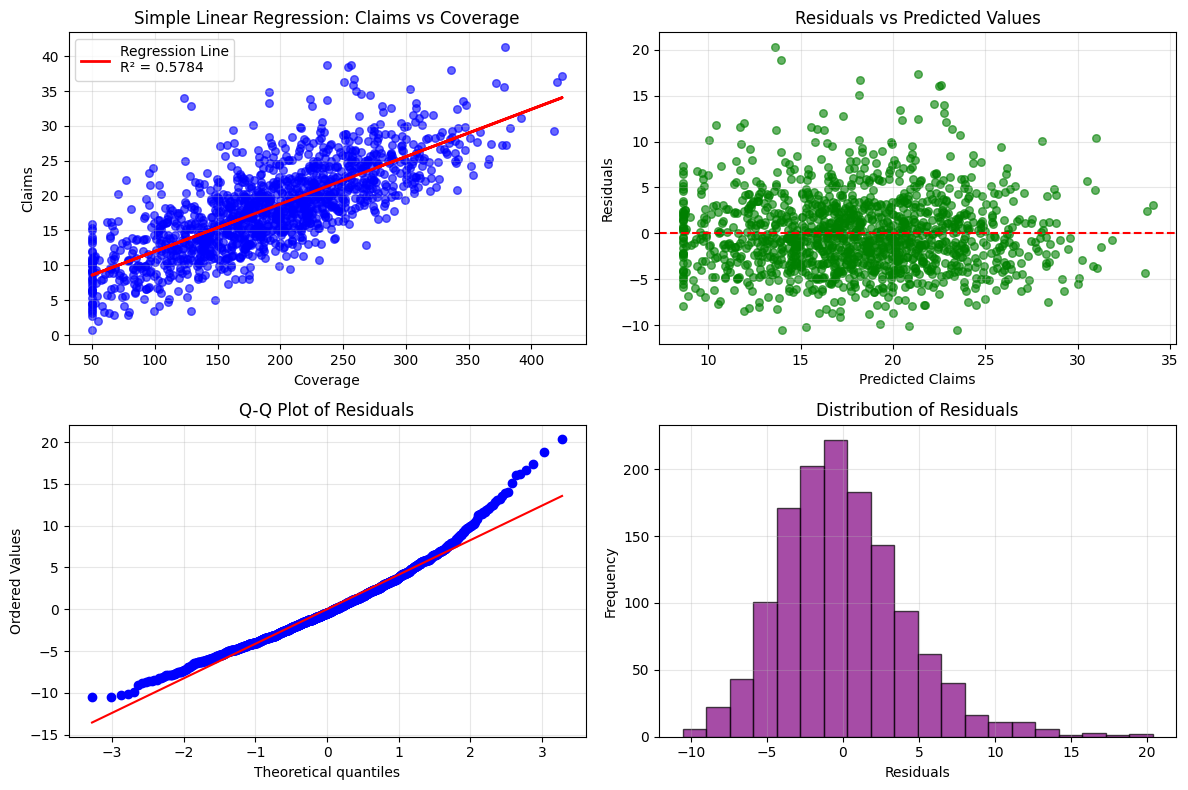



Summary Table:
         Metric  Value                                 Interpretation
 Intercept (β₀) 5.2054              Expected claims when coverage = 0
     Slope (β₁) 0.0679 Change in claims per unit increase in coverage
             R² 0.5784                    57.8% of variance explained
Correlation (r) 0.7605                    Linear association strength
           RMSE 4.1850                       Average prediction error
   Observations   1340                                    Sample size


In [87]:
# (c) Calculate and Interpret R-squared
print("\n\n(c) Coefficient of Determination (R²) Analysis")
print("-" * 50)

# Calculate R-squared
r_squared = r2_score(y_clean, y_pred)

# Also calculate correlation coefficient
correlation, p_value = pearsonr(X_clean.flatten(), y_clean)

print(f"Model Performance Metrics:")
print(f"R² (Coefficient of Determination): {r_squared:.4f}")
print(f"R² as percentage: {r_squared * 100:.2f}%")
print(f"Correlation coefficient (r): {correlation:.4f}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(np.mean((y_clean - y_pred)**2)):.4f}")

print(f"\nInterpretation of R²:")
print(f"• {r_squared * 100:.2f}% of the variation in claims is explained by coverage.")
print(f"• {(1 - r_squared) * 100:.2f}% of the variation in claims is due to other factors not included in the model.")

# Interpret the strength of the relationship
if r_squared >= 0.70:
    strength = "strong"
elif r_squared >= 0.30:
    strength = "moderate"
elif r_squared >= 0.10:
    strength = "weak"
else:
    strength = "very weak"

print(f"• The linear relationship between coverage and claims is {strength} (R² = {r_squared:.4f}).")

# Statistical significance test
n = len(X_clean)
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation**2))
degrees_freedom = n - 2
p_value_t = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_freedom))

print(f"\nStatistical Significance:")
print(f"• t-statistic: {t_statistic:.4f}")
print(f"• p-value: {p_value_t:.4f}")
print(f"• Degrees of freedom: {degrees_freedom}")

if p_value_t < 0.05:
    print(f"• The relationship is statistically significant at the 5% level.")
else:
    print(f"• The relationship is not statistically significant at the 5% level.")

# Create visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(X_clean, y_clean, alpha=0.6, color='blue', s=30)
plt.plot(X_clean, y_pred, color='red', linewidth=2, label=f'Regression Line\nR² = {r_squared:.4f}')
plt.xlabel('Coverage')
plt.ylabel('Claims')
plt.title('Simple Linear Regression: Claims vs Coverage')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Residuals plot
plt.subplot(2, 2, 2)
residuals = y_clean - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='green', s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Claims')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True, alpha=0.3)

# Subplot 3: QQ plot for residuals
plt.subplot(2, 2, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, alpha=0.3)

# Subplot 4: Histogram of residuals
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table for LaTeX
summary_stats = pd.DataFrame({
    'Metric': ['Intercept (β₀)', 'Slope (β₁)', 'R²', 'Correlation (r)', 'RMSE', 'Observations'],
    'Value': [f"{intercept:.4f}", f"{slope:.4f}", f"{r_squared:.4f}", f"{correlation:.4f}", 
              f"{np.sqrt(np.mean((y_clean - y_pred)**2)):.4f}", f"{len(X_clean)}"],
    'Interpretation': [
        'Expected claims when coverage = 0',
        'Change in claims per unit increase in coverage',
        f'{r_squared * 100:.1f}% of variance explained',
        f'Linear association strength',
        'Average prediction error',
        'Sample size'
    ]
})

print(f"\n\nSummary Table:")
print(summary_stats.to_string(index=False))

# print(f"\n\nLaTeX Summary Table:")
# print(summary_stats.to_latex(index=False, float_format="%.4f", 
#                             caption="Simple Linear Regression Results Summary", 
#                             label="tab:regression_summary"))

In [88]:
print(f"\n\nKey Findings Summary:")
print(f"• Regression equation: Claims = {intercept:.4f} + {slope:.4f} × Coverage")
print(f"• Slope interpretation: Each additional unit of coverage is associated with a {slope:.4f} unit change in claims")
print(f"• Model explains {r_squared * 100:.1f}% of the variation in claims")
print(f"• The relationship is {'statistically significant' if p_value_t < 0.05 else 'not statistically significant'} (p = {p_value_t:.4f})")



Key Findings Summary:
• Regression equation: Claims = 5.2054 + 0.0679 × Coverage
• Slope interpretation: Each additional unit of coverage is associated with a 0.0679 unit change in claims
• Model explains 57.8% of the variation in claims
• The relationship is statistically significant (p = 0.0000)


<h2>3 Multiple Regression Model</h2>
<h3>Fit a multiple linear regression model with claims as the dependent variable and the following explanatory variables: deductible, coverage, age, prior claims, and premium.</h3>

<h4>(a) Write the fitted regression equation with coefficient estimates rounded to 3 decimal places.</h4>

In [89]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Multiple Linear Regression Analysis")
print("Dependent Variable: claims")
print("Explanatory Variables: deductible, coverage, age, prior_claims, premium")

# Prepare the data
explanatory_vars = ['deductible', 'coverage', 'age', 'prior_claims', 'premium']
X = df[explanatory_vars].values
y = df['claims'].values

# Remove any rows with missing values
complete_cases = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X_clean = X[complete_cases]
y_clean = y[complete_cases]

print(f"\nDataset Information:")
print(f"Total observations: {len(df):,}")
print(f"Complete cases used: {len(X_clean):,}")
print(f"Observations removed (missing data): {len(df) - len(X_clean):,}")
print(f"Number of explanatory variables: {len(explanatory_vars)}")

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_clean, y_clean)

# Get predictions
y_pred = model.predict(X_clean)

# Extract coefficients
intercept = model.intercept_
coefficients = model.coef_

# Calculate additional statistics manually since sklearn doesn't provide them
n = len(X_clean)  # number of observations
k = X_clean.shape[1]  # number of explanatory variables
df_residual = n - k - 1  # degrees of freedom for residuals
df_model = k  # degrees of freedom for model

# Calculate residuals and residual sum of squares
residuals = y_clean - y_pred
rss = np.sum(residuals**2)  # Residual Sum of Squares
tss = np.sum((y_clean - np.mean(y_clean))**2)  # Total Sum of Squares

# Calculate standard errors
# Standard error calculation requires the variance-covariance matrix
X_with_intercept = np.column_stack([np.ones(n), X_clean])
try:
    # Calculate (X'X)^-1
    XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    
    # Mean squared error (residual variance)
    mse = rss / df_residual
    
    # Standard errors are square root of diagonal elements of MSE * (X'X)^-1
    var_coef = mse * np.diag(XtX_inv)
    std_errors = np.sqrt(var_coef)
    
    # Separate intercept and coefficient standard errors
    intercept_se = std_errors[0]
    coef_se = std_errors[1:]
    
except np.linalg.LinAlgError:
    print("Warning: Could not calculate standard errors due to singular matrix")
    intercept_se = np.nan
    coef_se = [np.nan] * len(coefficients)

# Calculate R-squared and adjusted R-squared
r_squared = r2_score(y_clean, y_pred)
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / df_residual)

# Calculate residual standard deviation (standard error of regression)
residual_std = np.sqrt(mse)

# (a) Fitted Regression Equation
print(f"\n(a) Fitted Regression Equation")
print("-" * 50)

print(f"Coefficient Estimates (rounded to 3 decimal places):")
print(f"Intercept (β₀): {intercept:.3f}")
for i, var in enumerate(explanatory_vars):
    print(f"β_{i+1} ({var}): {coefficients[i]:.3f}")

print(f"\nFitted Regression Equation:")
equation_parts = [f"{intercept:.3f}"]
for i, var in enumerate(explanatory_vars):
    coef = coefficients[i]
    if coef >= 0:
        equation_parts.append(f"+ {coef:.3f} × {var}")
    else:
        equation_parts.append(f"- {abs(coef):.3f} × {var}")

equation = "Claims = " + " ".join(equation_parts)
print(equation)

print(f"\nCompact Mathematical Form:")
print("ŷ = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + β₄x₄ + β₅x₅")
print(f"ŷ = {intercept:.3f} + {coefficients[0]:.3f}x₁ + {coefficients[1]:.3f}x₂ + {coefficients[2]:.3f}x₃ + {coefficients[3]:.3f}x₄ + {coefficients[4]:.3f}x₅")
print("where x₁=deductible, x₂=coverage, x₃=age, x₄=prior_claims, x₅=premium")

# LaTeX format
latex_equation = f"\\hat{{Claims}} = {intercept:.3f}"
for i, var in enumerate(explanatory_vars):
    coef = coefficients[i]
    if coef >= 0:
        latex_equation += f" + {coef:.3f} \\times {var}"
    else:
        latex_equation += f" - {abs(coef):.3f} \\times {var}"

# print(f"\nLaTeX format:")
# print(latex_equation)

Multiple Linear Regression Analysis
Dependent Variable: claims
Explanatory Variables: deductible, coverage, age, prior_claims, premium

Dataset Information:
Total observations: 1,340
Complete cases used: 1,340
Observations removed (missing data): 0
Number of explanatory variables: 5

(a) Fitted Regression Equation
--------------------------------------------------
Coefficient Estimates (rounded to 3 decimal places):
Intercept (β₀): 3.208
β_1 (deductible): -0.728
β_2 (coverage): 0.062
β_3 (age): 0.091
β_4 (prior_claims): 2.580
β_5 (premium): 0.495

Fitted Regression Equation:
Claims = 3.208 - 0.728 × deductible + 0.062 × coverage + 0.091 × age + 2.580 × prior_claims + 0.495 × premium

Compact Mathematical Form:
ŷ = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + β₄x₄ + β₅x₅
ŷ = 3.208 + -0.728x₁ + 0.062x₂ + 0.091x₃ + 2.580x₄ + 0.495x₅
where x₁=deductible, x₂=coverage, x₃=age, x₄=prior_claims, x₅=premium


<h4>(b) Report the standard errors for each coefficient.</h4>

In [90]:

# (b) Standard Errors
print(f"\n(b) Standard Errors for Each Coefficient")
print("-" * 50)

print(f"Standard Errors:")
print(f"Intercept (β₀): {intercept_se:.4f}")
for i, var in enumerate(explanatory_vars):
    print(f"β_{i+1} ({var}): {coef_se[i]:.4f}")

# Calculate t-statistics and p-values
print(f"\nAdditional Statistics (t-statistics and p-values):")
print(f"{'Coefficient':<15} {'Estimate':<10} {'Std Error':<12} {'t-stat':<10} {'p-value':<10} {'Significance'}")
print("-" * 50)

# Intercept
if not np.isnan(intercept_se) and intercept_se != 0:
    t_stat_int = intercept / intercept_se
    p_val_int = 2 * (1 - stats.t.cdf(abs(t_stat_int), df_residual))
    sig_int = "***" if p_val_int < 0.001 else "**" if p_val_int < 0.01 else "*" if p_val_int < 0.05 else ""
    print(f"{'Intercept':<15} {intercept:<10.3f} {intercept_se:<12.4f} {t_stat_int:<10.3f} {p_val_int:<10.4f} {sig_int}")
else:
    print(f"{'Intercept':<15} {intercept:<10.3f} {'N/A':<12} {'N/A':<10} {'N/A':<10}")

# Coefficients
for i, var in enumerate(explanatory_vars):
    if not np.isnan(coef_se[i]) and coef_se[i] != 0:
        t_stat = coefficients[i] / coef_se[i]
        p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df_residual))
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        print(f"{var:<15} {coefficients[i]:<10.3f} {coef_se[i]:<12.4f} {t_stat:<10.3f} {p_val:<10.4f} {sig}")
    else:
        print(f"{var:<15} {coefficients[i]:<10.3f} {'N/A':<12} {'N/A':<10} {'N/A':<10}")

print("Significance codes: *** p<0.001, ** p<0.01, * p<0.05")



(b) Standard Errors for Each Coefficient
--------------------------------------------------
Standard Errors:
Intercept (β₀): 0.3172
β_1 (deductible): 0.0394
β_2 (coverage): 0.0020
β_3 (age): 0.0068
β_4 (prior_claims): 0.1210
β_5 (premium): 0.2118

Additional Statistics (t-statistics and p-values):
Coefficient     Estimate   Std Error    t-stat     p-value    Significance
--------------------------------------------------
Intercept       3.208      0.3172       10.113     0.0000     ***
deductible      -0.728     0.0394       -18.459    0.0000     ***
coverage        0.062      0.0020       30.624     0.0000     ***
age             0.091      0.0068       13.401     0.0000     ***
prior_claims    2.580      0.1210       21.316     0.0000     ***
premium         0.495      0.2118       2.338      0.0195     *
Significance codes: *** p<0.001, ** p<0.01, * p<0.05


<h4>(c) Calculate and report R2, adjusted R2, and the residual standard deviation.</h4>


(c) Model Performance Statistics
--------------------------------------------------
R² (Coefficient of Determination): 0.8130
Adjusted R²: 0.8123
Residual Standard Deviation: 2.7938

Additional Model Statistics:
Multiple R (Correlation): 0.9016
Residual Sum of Squares (RSS): 10412.1409
Mean Squared Error (MSE): 7.8052
F-statistic: 1159.6202
F-statistic p-value: 0.000000
Overall model significance: Yes (α = 0.05)

Degrees of Freedom:
Model: 5
Residual: 1334
Total: 1339

Summary Results Table:
       Variable  Coefficient  Std_Error  Coefficient_Rounded
0     Intercept       3.2078     0.3172                3.208
1    deductible      -0.7278     0.0394               -0.728
2      coverage       0.0621     0.0020                0.062
3           age       0.0906     0.0068                0.091
4  prior_claims       2.5797     0.1210                2.580
5       premium       0.4953     0.2118                0.495

Model Performance Table:
             Statistic     Value
                

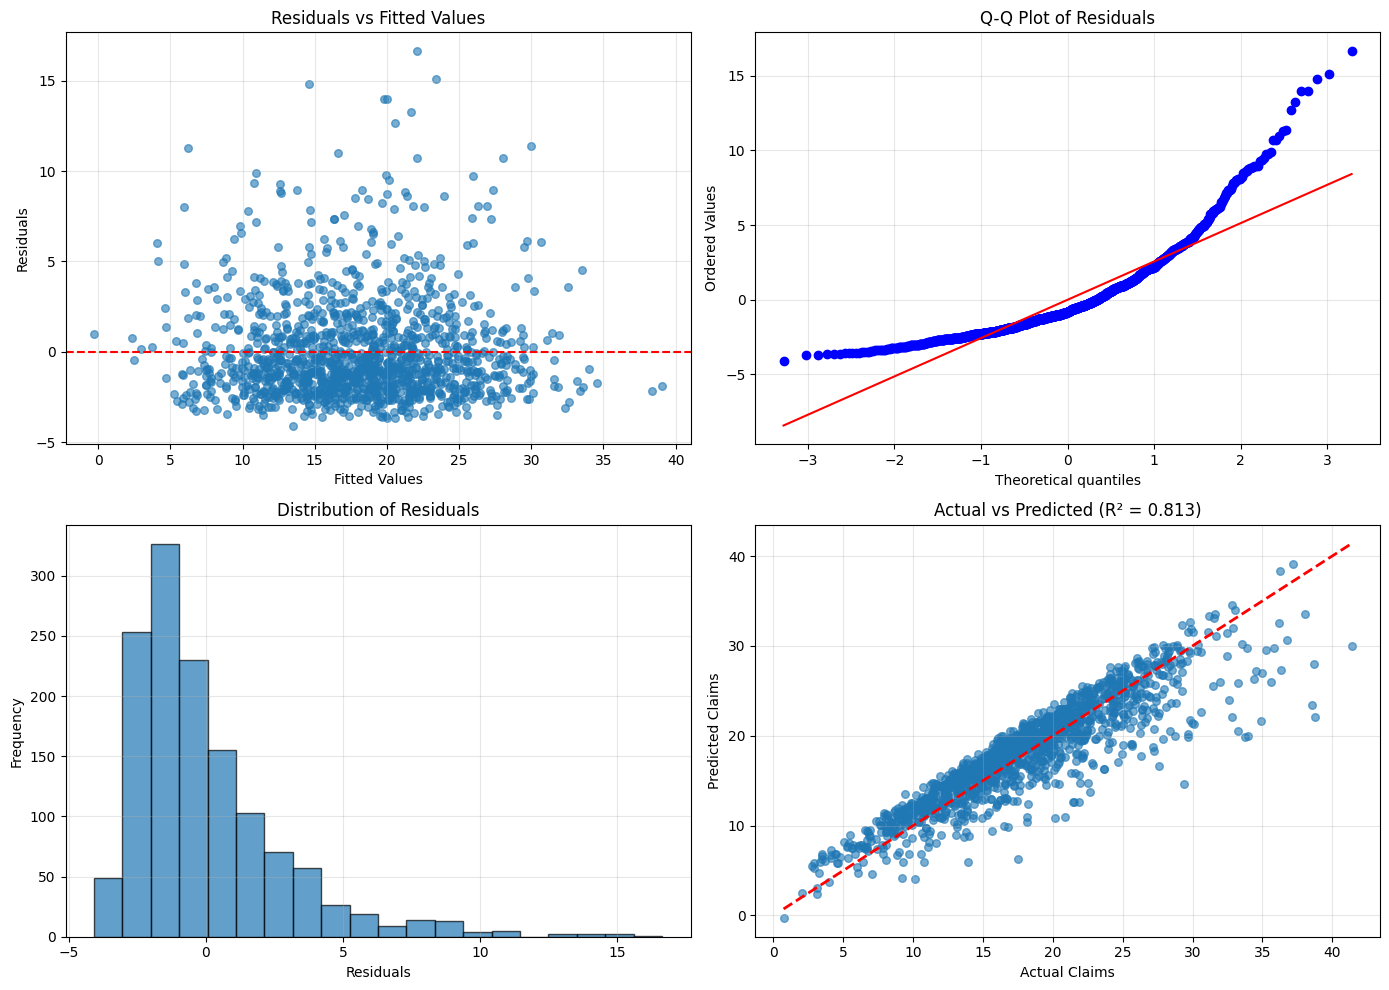

In [91]:

# (c) Model Performance Statistics
print(f"\n(c) Model Performance Statistics")
print("-" * 50)

print(f"R² (Coefficient of Determination): {r_squared:.4f}")
print(f"Adjusted R²: {adj_r_squared:.4f}")
print(f"Residual Standard Deviation: {residual_std:.4f}")

print(f"\nAdditional Model Statistics:")
print(f"Multiple R (Correlation): {np.sqrt(r_squared):.4f}")
print(f"Residual Sum of Squares (RSS): {rss:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"F-statistic: {(tss - rss) / df_model / (rss / df_residual):.4f}")

# F-test for overall model significance
f_statistic = ((tss - rss) / df_model) / (rss / df_residual)
f_p_value = 1 - f_dist.cdf(f_statistic, df_model, df_residual)
print(f"F-statistic p-value: {f_p_value:.6f}")
print(f"Overall model significance: {'Yes' if f_p_value < 0.05 else 'No'} (α = 0.05)")

print(f"\nDegrees of Freedom:")
print(f"Model: {df_model}")
print(f"Residual: {df_residual}")
print(f"Total: {n - 1}")

# Create comprehensive results table
results_table = pd.DataFrame({
    'Variable': ['Intercept'] + explanatory_vars,
    'Coefficient': [intercept] + list(coefficients),
    'Std_Error': [intercept_se] + list(coef_se),
    'Coefficient_Rounded': [round(intercept, 3)] + [round(coef, 3) for coef in coefficients]
})

print(f"\nSummary Results Table:")
print(results_table.round(4))

# LaTeX table for coefficients
# print(f"\nLaTeX Coefficient Table:")
# latex_table = results_table[['Variable', 'Coefficient_Rounded', 'Std_Error']].copy()
# latex_table.columns = ['Variable', 'Coefficient', 'Standard Error']
# print(latex_table.to_latex(index=False, float_format="%.4f", 
#                           caption="Multiple Linear Regression Coefficient Estimates", 
#                           label="tab:multiple_regression"))

# Model performance summary table
performance_table = pd.DataFrame({
    'Statistic': ['R²', 'Adjusted R²', 'Residual Std Deviation', 'F-statistic', 'p-value (F-test)', 'Observations', 'Variables'],
    'Value': [f"{r_squared:.4f}", f"{adj_r_squared:.4f}", f"{residual_std:.4f}", 
              f"{f_statistic:.4f}", f"{f_p_value:.6f}", f"{n}", f"{k}"]
})

print(f"\nModel Performance Table:")
print(performance_table.to_string(index=False))

# print(f"\nLaTeX Performance Table:")
# print(performance_table.to_latex(index=False, caption="Multiple Linear Regression Model Performance", 
#                                 label="tab:model_performance"))

# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.6, s=30)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Histogram of residuals
axes[1, 0].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1, 1].scatter(y_clean, y_pred, alpha=0.6, s=30)
axes[1, 1].plot([y_clean.min(), y_clean.max()], [y_clean.min(), y_clean.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Claims')
axes[1, 1].set_ylabel('Predicted Claims')
axes[1, 1].set_title(f'Actual vs Predicted (R² = {r_squared:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [92]:
print(f"\nKey Results Summary:")
print(f"✓ Multiple regression equation fitted with 5 explanatory variables")
print(f"✓ Model explains {r_squared * 100:.1f}% of variance in claims (R² = {r_squared:.4f})")
print(f"✓ Adjusted R² = {adj_r_squared:.4f} (accounts for number of variables)")
print(f"✓ Residual standard deviation = {residual_std:.4f}")
print(f"✓ Overall model is {'significant' if f_p_value < 0.05 else 'not significant'} (F-test p-value = {f_p_value:.6f})")
print(f"✓ Standard errors calculated for all {len(explanatory_vars) + 1} coefficients")


Key Results Summary:
✓ Multiple regression equation fitted with 5 explanatory variables
✓ Model explains 81.3% of variance in claims (R² = 0.8130)
✓ Adjusted R² = 0.8123 (accounts for number of variables)
✓ Residual standard deviation = 2.7938
✓ Overall model is significant (F-test p-value = 0.000000)
✓ Standard errors calculated for all 6 coefficients


<h2>4 Statistical Inference</h2>
<h3>Using the multiple regression model from Question 3:</h3>

<h4>(a) Test whether the coefficient for age is statistically significant at the 5% level. State your null and alternative hypotheses, calculate the t-statistic, and state your conclusion.</h4>

In [93]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Statistical Inference and Hypothesis Testing")
print("Multiple Linear Regression Model: Claims vs (Deductible, Coverage, Age, Prior_Claims, Premium)")

# Prepare the data
explanatory_vars = ['deductible', 'coverage', 'age', 'prior_claims', 'premium']
X = df[explanatory_vars].values
y = df['claims'].values

# Remove any rows with missing values
complete_cases = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X_clean = X[complete_cases]
y_clean = y[complete_cases]

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_clean, y_clean)
y_pred = model.predict(X_clean)

# Extract model parameters
intercept = model.intercept_
coefficients = model.coef_
n = len(X_clean)  # number of observations
k = X_clean.shape[1]  # number of explanatory variables
df_residual = n - k - 1  # degrees of freedom for residuals
df_model = k  # degrees of freedom for model

# Calculate residuals and statistics
residuals = y_clean - y_pred
rss = np.sum(residuals**2)  # Residual Sum of Squares
tss = np.sum((y_clean - np.mean(y_clean))**2)  # Total Sum of Squares
mse = rss / df_residual  # Mean squared error
r_squared = r2_score(y_clean, y_pred)

# Calculate standard errors
X_with_intercept = np.column_stack([np.ones(n), X_clean])
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
var_coef = mse * np.diag(XtX_inv)
std_errors = np.sqrt(var_coef)
intercept_se = std_errors[0]
coef_se = std_errors[1:]

print(f"Model Summary:")
print(f"Observations: {n}")
print(f"Variables: {k}")
print(f"Degrees of freedom (residual): {df_residual}")
print(f"R²: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")

# Display coefficient estimates
print(f"\nCoefficient Estimates:")
print(f"{'Variable':<15} {'Coefficient':<12} {'Std Error':<12} {'t-statistic':<12} {'p-value':<12}")
print("-" * 50)

# Calculate t-statistics and p-values for all coefficients
t_stats = coefficients / coef_se
p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), df_residual))

for i, var in enumerate(explanatory_vars):
    print(f"{var:<15} {coefficients[i]:<12.4f} {coef_se[i]:<12.4f} {t_stats[i]:<12.4f} {p_values[i]:<12.4f}")

# (a) Test significance of age coefficient
print(f"\n(a) Testing Significance of Age Coefficient")

# Find the index of 'age' in explanatory_vars
age_index = explanatory_vars.index('age')
age_coef = coefficients[age_index]
age_se = coef_se[age_index]
age_t_stat = t_stats[age_index]
age_p_value = p_values[age_index]

print(f"Hypothesis Test for Age Coefficient:")
print(f"\nNull Hypothesis (H₀): β_age = 0")
print(f"Alternative Hypothesis (H₁): β_age ≠ 0")
print(f"Significance level (α): 0.05")
print(f"Test type: Two-tailed t-test")

print(f"\nTest Statistics:")
print(f"Age coefficient (β_age): {age_coef:.4f}")
print(f"Standard error (SE): {age_se:.4f}")
print(f"t-statistic: {age_t_stat:.4f}")
print(f"Degrees of freedom: {df_residual}")
print(f"p-value: {age_p_value:.4f}")

# Critical value for two-tailed test at α = 0.05
t_critical = t_dist.ppf(0.975, df_residual)  # 97.5th percentile for two-tailed test
print(f"Critical value (±): {t_critical:.4f}")

print(f"\nDecision Rule:")
print(f"Reject H₀ if |t-statistic| > {t_critical:.4f} OR if p-value < 0.05")

print(f"\nConclusion:")
if age_p_value < 0.05:
    print(f"✓ REJECT H₀: The coefficient for age IS statistically significant at the 5% level.")
    print(f"  |t-statistic| = {abs(age_t_stat):.4f} > {t_critical:.4f}")
    print(f"  p-value = {age_p_value:.4f} < 0.05")
    print(f"  Age has a statistically significant effect on claims.")
else:
    print(f"FAIL TO REJECT H₀: The coefficient for age is NOT statistically significant at the 5% level.")
    print(f"  |t-statistic| = {abs(age_t_stat):.4f} ≤ {t_critical:.4f}")
    print(f"  p-value = {age_p_value:.4f} ≥ 0.05")
    print(f"  Age does not have a statistically significant effect on claims.")


Statistical Inference and Hypothesis Testing
Multiple Linear Regression Model: Claims vs (Deductible, Coverage, Age, Prior_Claims, Premium)
Model Summary:
Observations: 1340
Variables: 5
Degrees of freedom (residual): 1334
R²: 0.8130
MSE: 7.8052

Coefficient Estimates:
Variable        Coefficient  Std Error    t-statistic  p-value     
--------------------------------------------------
deductible      -0.7278      0.0394       -18.4591     0.0000      
coverage        0.0621       0.0020       30.6239      0.0000      
age             0.0906       0.0068       13.4010      0.0000      
prior_claims    2.5797       0.1210       21.3156      0.0000      
premium         0.4953       0.2118       2.3382       0.0195      

(a) Testing Significance of Age Coefficient
Hypothesis Test for Age Coefficient:

Null Hypothesis (H₀): β_age = 0
Alternative Hypothesis (H₁): β_age ≠ 0
Significance level (α): 0.05
Test type: Two-tailed t-test

Test Statistics:
Age coefficient (β_age): 0.0906
Standard 

<h4>(b) Construct a 95% confidence interval for the coefficient of prior claims. Interpret this interval in practical terms.</h4>

In [94]:
# (b) 95% Confidence Interval for prior_claims coefficient
print(f"\n\n(b) 95% Confidence Interval for Prior Claims Coefficient")

# Find the index of 'prior_claims'
prior_claims_index = explanatory_vars.index('prior_claims')
prior_claims_coef = coefficients[prior_claims_index]
prior_claims_se = coef_se[prior_claims_index]

print(f"Confidence Interval Calculation:")
print(f"Coefficient (β_prior_claims): {prior_claims_coef:.4f}")
print(f"Standard error: {prior_claims_se:.4f}")
print(f"Degrees of freedom: {df_residual}")
print(f"Confidence level: 95%")

# Calculate margin of error
margin_of_error = t_critical * prior_claims_se
ci_lower = prior_claims_coef - margin_of_error
ci_upper = prior_claims_coef + margin_of_error

print(f"\nConfidence Interval Formula:")
print(f"CI = β̂ ± t_(α/2,df) × SE(β̂)")
print(f"CI = {prior_claims_coef:.4f} ± {t_critical:.4f} × {prior_claims_se:.4f}")
print(f"CI = {prior_claims_coef:.4f} ± {margin_of_error:.4f}")

print(f"\n95% Confidence Interval for Prior Claims Coefficient:")
print(f"[{ci_lower:.4f}, {ci_upper:.4f}]")

print(f"\nPractical Interpretation:")
print(f"• We are 95% confident that the true effect of having prior claims on current claims")
print(f"  is between {ci_lower:.4f} and {ci_upper:.4f} units.")

if ci_lower > 0:
    print(f"• Since the entire interval is positive, prior claims consistently INCREASE current claims.")
    print(f"• Properties with prior claims have significantly higher current claims than those without.")
elif ci_upper < 0:
    print(f"• Since the entire interval is negative, prior claims consistently DECREASE current claims.")
    print(f"• Properties with prior claims have significantly lower current claims than those without.")
else:
    print(f"• Since the interval contains zero, the effect could be positive or negative.")
    print(f"• We cannot conclusively say whether prior claims increase or decrease current claims.")

print(f"• The width of the interval ({ci_upper - ci_lower:.4f}) indicates the precision of our estimate.")




(b) 95% Confidence Interval for Prior Claims Coefficient
Confidence Interval Calculation:
Coefficient (β_prior_claims): 2.5797
Standard error: 0.1210
Degrees of freedom: 1334
Confidence level: 95%

Confidence Interval Formula:
CI = β̂ ± t_(α/2,df) × SE(β̂)
CI = 2.5797 ± 1.9617 × 0.1210
CI = 2.5797 ± 0.2374

95% Confidence Interval for Prior Claims Coefficient:
[2.3423, 2.8171]

Practical Interpretation:
• We are 95% confident that the true effect of having prior claims on current claims
  is between 2.3423 and 2.8171 units.
• Since the entire interval is positive, prior claims consistently INCREASE current claims.
• Properties with prior claims have significantly higher current claims than those without.
• The width of the interval (0.4748) indicates the precision of our estimate.


<h4>(c) Perform an overall F-test for the significance of the regression model. State your hypotheses, report the F-statistic and p-value, and draw your conclusion.</h4>



(c) Overall F-test for Model Significance
Overall F-test for Regression Model:

Null Hypothesis (H₀): β₁ = β₂ = β₃ = β₄ = β₅ = 0
  (All explanatory variables have no effect on claims)
Alternative Hypothesis (H₁): At least one βᵢ ≠ 0
  (At least one explanatory variable has a significant effect)
Significance level (α): 0.05

Test Statistics:
Total Sum of Squares (TSS): 55667.4953
Explained Sum of Squares (ESS): 45255.3543
Residual Sum of Squares (RSS): 10412.1409
Mean Square Regression (MSR): 9051.0709
Mean Square Error (MSE): 7.8052

F-statistic: 1159.6202
Degrees of freedom: (5, 1334)
p-value: 0.000000
Critical F-value (α = 0.05): 2.2208

Decision Rule:
Reject H₀ if F-statistic > 2.2208 OR if p-value < 0.05

Conclusion:
✓ REJECT H₀: The regression model IS statistically significant at the 5% level.
  F-statistic = 1159.6202 > 2.2208
  p-value = 0.000000 < 0.05
  At least one explanatory variable has a significant effect on claims.
  The model explains a significant portion of the va

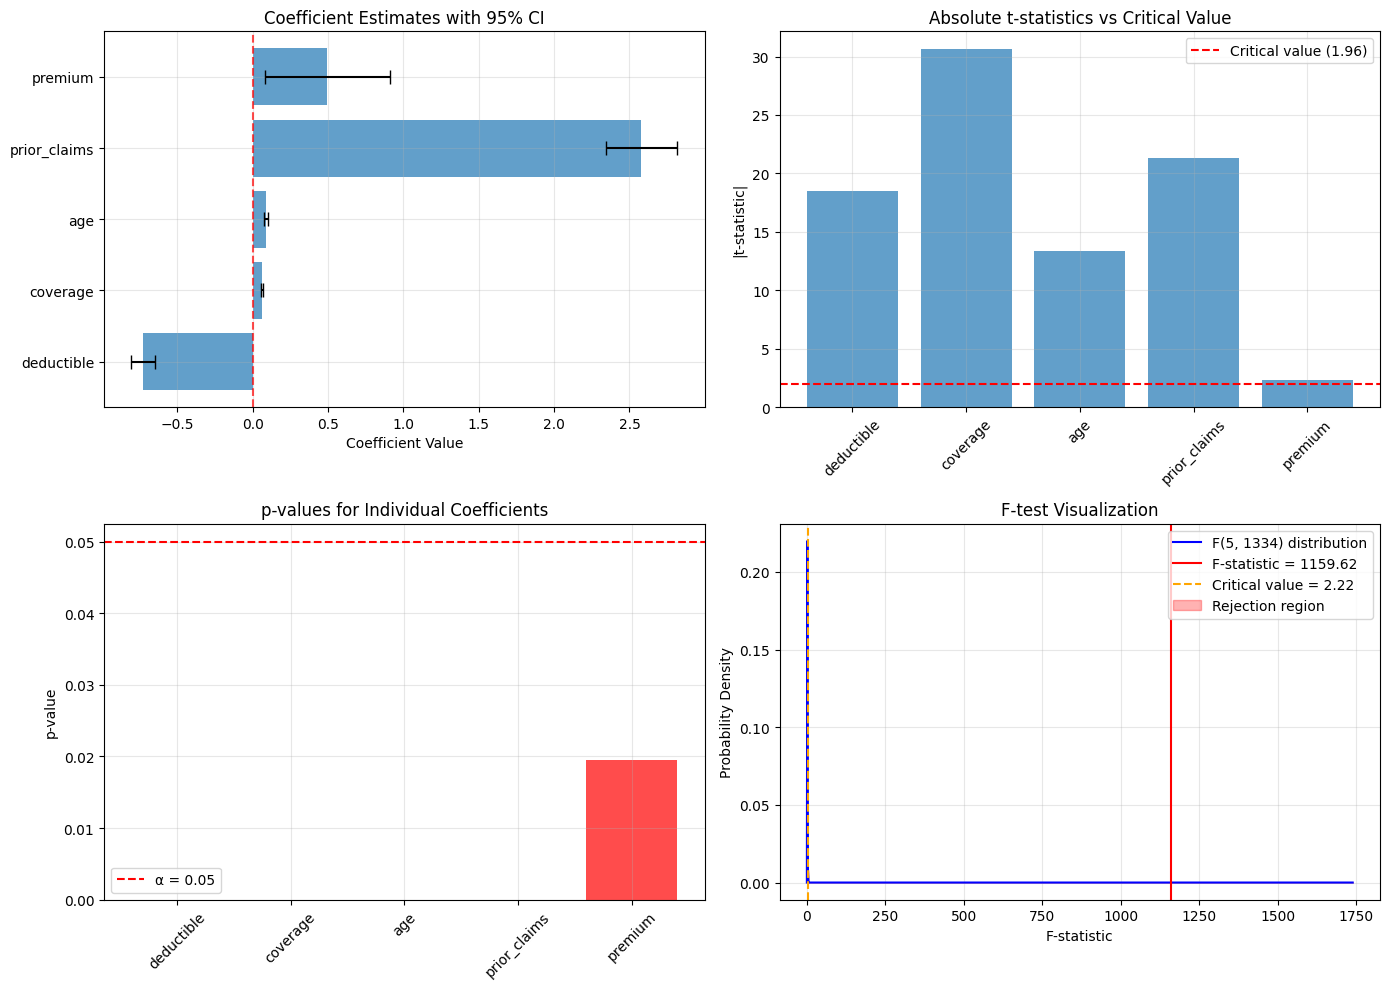

In [95]:

# (c) Overall F-test for model significance
print(f"\n\n(c) Overall F-test for Model Significance")

# Calculate F-statistic
ess = tss - rss  # Explained Sum of Squares
f_statistic = (ess / df_model) / (rss / df_residual)
f_p_value = 1 - f_dist.cdf(f_statistic, df_model, df_residual)

print(f"Overall F-test for Regression Model:")
print(f"\nNull Hypothesis (H₀): β₁ = β₂ = β₃ = β₄ = β₅ = 0")
print(f"  (All explanatory variables have no effect on claims)")
print(f"Alternative Hypothesis (H₁): At least one βᵢ ≠ 0")
print(f"  (At least one explanatory variable has a significant effect)")
print(f"Significance level (α): 0.05")

print(f"\nTest Statistics:")
print(f"Total Sum of Squares (TSS): {tss:.4f}")
print(f"Explained Sum of Squares (ESS): {ess:.4f}")
print(f"Residual Sum of Squares (RSS): {rss:.4f}")
print(f"Mean Square Regression (MSR): {ess/df_model:.4f}")
print(f"Mean Square Error (MSE): {mse:.4f}")

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"Degrees of freedom: ({df_model}, {df_residual})")
print(f"p-value: {f_p_value:.6f}")

# Critical F-value
f_critical = f_dist.ppf(0.95, df_model, df_residual)
print(f"Critical F-value (α = 0.05): {f_critical:.4f}")

print(f"\nDecision Rule:")
print(f"Reject H₀ if F-statistic > {f_critical:.4f} OR if p-value < 0.05")

print(f"\nConclusion:")
if f_p_value < 0.05:
    print(f"✓ REJECT H₀: The regression model IS statistically significant at the 5% level.")
    print(f"  F-statistic = {f_statistic:.4f} > {f_critical:.4f}")
    print(f"  p-value = {f_p_value:.6f} < 0.05")
    print(f"  At least one explanatory variable has a significant effect on claims.")
    print(f"  The model explains a significant portion of the variation in claims.")
else:
    print(f"FAIL TO REJECT H₀: The regression model is NOT statistically significant at the 5% level.")
    print(f"  F-statistic = {f_statistic:.4f} ≤ {f_critical:.4f}")
    print(f"  p-value = {f_p_value:.6f} ≥ 0.05")
    print(f"  The explanatory variables do not significantly predict claims.")

# Additional model interpretation
print(f"\nModel Performance Context:")
print(f"R² = {r_squared:.4f} ({r_squared*100:.1f}% of variance explained)")
print(f"The model {'performs well' if r_squared > 0.3 else 'has limited explanatory power'} in predicting claims.")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Coefficient plot with confidence intervals
coef_names = explanatory_vars
coef_values = coefficients
coef_errors = coef_se

y_pos = np.arange(len(coef_names))
axes[0, 0].barh(y_pos, coef_values, xerr=1.96*coef_errors, alpha=0.7, capsize=5)
axes[0, 0].set_yticks(y_pos)
axes[0, 0].set_yticklabels(coef_names)
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_title('Coefficient Estimates with 95% CI')
axes[0, 0].grid(True, alpha=0.3)

# t-statistics
axes[0, 1].bar(coef_names, np.abs(t_stats), alpha=0.7)
axes[0, 1].axhline(y=t_critical, color='red', linestyle='--', label=f'Critical value ({t_critical:.2f})')
axes[0, 1].set_ylabel('|t-statistic|')
axes[0, 1].set_title('Absolute t-statistics vs Critical Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
plt.setp(axes[0, 1].get_xticklabels(), rotation=45)

# p-values
colors = ['red' if p < 0.05 else 'blue' for p in p_values]
axes[1, 0].bar(coef_names, p_values, color=colors, alpha=0.7)
axes[1, 0].axhline(y=0.05, color='red', linestyle='--', label='α = 0.05')
axes[1, 0].set_ylabel('p-value')
axes[1, 0].set_title('p-values for Individual Coefficients')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.setp(axes[1, 0].get_xticklabels(), rotation=45)

# F-distribution visualization
x_f = np.linspace(0, max(f_statistic * 1.5, f_critical * 1.5), 1000)
y_f = f_dist.pdf(x_f, df_model, df_residual)
axes[1, 1].plot(x_f, y_f, 'b-', label=f'F({df_model}, {df_residual}) distribution')
axes[1, 1].axvline(x=f_statistic, color='red', linestyle='-', label=f'F-statistic = {f_statistic:.2f}')
axes[1, 1].axvline(x=f_critical, color='orange', linestyle='--', label=f'Critical value = {f_critical:.2f}')
axes[1, 1].fill_between(x_f[x_f >= f_critical], y_f[x_f >= f_critical], alpha=0.3, color='red', label='Rejection region')
axes[1, 1].set_xlabel('F-statistic')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].set_title('F-test Visualization')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [96]:
# Summary table for all tests
summary_data = {
    'Test': [
        'Age Coefficient (t-test)',
        'Prior Claims CI',
        'Overall Model (F-test)'
    ],
    'Statistic': [
        f't = {age_t_stat:.4f}',
        f'CI = [{ci_lower:.4f}, {ci_upper:.4f}]',
        f'F = {f_statistic:.4f}'
    ],
    'p-value': [
        f'{age_p_value:.4f}',
        'N/A',
        f'{f_p_value:.6f}'
    ],
    'Conclusion': [
        'Significant' if age_p_value < 0.05 else 'Not Significant',
        'Contains 0' if ci_lower <= 0 <= ci_upper else 'Does not contain 0',
        'Model Significant' if f_p_value < 0.05 else 'Model Not Significant'
    ]
}

summary_table = pd.DataFrame(summary_data)
print(f"\n\nSummary of All Statistical Tests:")
print(summary_table.to_string(index=False))

print(f"\nLaTeX Summary Table:")
print(summary_table.to_latex(index=False, caption="Summary of Statistical Tests", 
                            label="tab:hypothesis_tests"))



Summary of All Statistical Tests:
                    Test             Statistic  p-value         Conclusion
Age Coefficient (t-test)           t = 13.4010   0.0000        Significant
         Prior Claims CI CI = [2.3423, 2.8171]      N/A Does not contain 0
  Overall Model (F-test)         F = 1159.6202 0.000000  Model Significant

LaTeX Summary Table:
\begin{table}
\caption{Summary of Statistical Tests}
\label{tab:hypothesis_tests}
\begin{tabular}{llll}
\toprule
Test & Statistic & p-value & Conclusion \\
\midrule
Age Coefficient (t-test) & t = 13.4010 & 0.0000 & Significant \\
Prior Claims CI & CI = [2.3423, 2.8171] & N/A & Does not contain 0 \\
Overall Model (F-test) & F = 1159.6202 & 0.000000 & Model Significant \\
\bottomrule
\end{tabular}
\end{table}



<h2>5 Binary Variables and Model Interpretation</h2>
<h3>Add the binary variables type and location to your model from Question 3.</h3>

<h4>(a) Write the new fitted regression equation.</h4>

In [97]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Extended Multiple Linear Regression Analysis with Binary Variables")
print("Adding 'type' and 'location' to the original model")
print("Dependent Variable: claims")
print("Original Variables: deductible, coverage, age, prior_claims, premium")
print("New Variables: type, location")

# First, fit the original model (without type and location)
original_vars = ['deductible', 'coverage', 'age', 'prior_claims', 'premium']
X_original = df[original_vars].values
y = df['claims'].values

# Remove missing values for original model
complete_cases_orig = ~(np.isnan(X_original).any(axis=1) | np.isnan(y))
X_orig_clean = X_original[complete_cases_orig]
y_orig_clean = y[complete_cases_orig]

# Fit original model
model_original = LinearRegression()
model_original.fit(X_orig_clean, y_orig_clean)
y_pred_orig = model_original.predict(X_orig_clean)
r2_original = r2_score(y_orig_clean, y_pred_orig)

# Now fit the extended model (with type and location)
extended_vars = ['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location']
X_extended = df[extended_vars].values

# Remove missing values for extended model
complete_cases_ext = ~(np.isnan(X_extended).any(axis=1) | np.isnan(y))
X_ext_clean = X_extended[complete_cases_ext]
y_ext_clean = y[complete_cases_ext]

print(f"\nData Summary:")
print(f"Original model observations: {len(X_orig_clean):,}")
print(f"Extended model observations: {len(X_ext_clean):,}")

# Fit extended model
model_extended = LinearRegression()
model_extended.fit(X_ext_clean, y_ext_clean)
y_pred_ext = model_extended.predict(X_ext_clean)

# Extract coefficients and calculate statistics
intercept_ext = model_extended.intercept_
coefficients_ext = model_extended.coef_
n_ext = len(X_ext_clean)
k_ext = X_ext_clean.shape[1]
df_residual_ext = n_ext - k_ext - 1
df_model_ext = k_ext

# Calculate extended model statistics
residuals_ext = y_ext_clean - y_pred_ext
rss_ext = np.sum(residuals_ext**2)
tss_ext = np.sum((y_ext_clean - np.mean(y_ext_clean))**2)
mse_ext = rss_ext / df_residual_ext
r2_extended = r2_score(y_ext_clean, y_pred_ext)
adj_r2_extended = 1 - ((1 - r2_extended) * (n_ext - 1) / df_residual_ext)

# Calculate standard errors for extended model
X_ext_with_intercept = np.column_stack([np.ones(n_ext), X_ext_clean])
XtX_inv_ext = np.linalg.inv(X_ext_with_intercept.T @ X_ext_with_intercept)
var_coef_ext = mse_ext * np.diag(XtX_inv_ext)
std_errors_ext = np.sqrt(var_coef_ext)
intercept_se_ext = std_errors_ext[0]
coef_se_ext = std_errors_ext[1:]

# Calculate t-statistics and p-values for extended model
t_stats_ext = coefficients_ext / coef_se_ext
p_values_ext = 2 * (1 - t_dist.cdf(np.abs(t_stats_ext), df_residual_ext))

print(f"\nExtended Model Summary:")
print(f"Observations: {n_ext}")
print(f"Variables: {k_ext}")
print(f"R²: {r2_extended:.4f}")
print(f"Adjusted R²: {adj_r2_extended:.4f}")
print(f"Residual Standard Error: {np.sqrt(mse_ext):.4f}")

# (a) New fitted regression equation
print(f"\n(a) Extended Regression Model Equation")

print(f"Coefficient Estimates:")
print(f"{'Variable':<15} {'Coefficient':<12} {'Std Error':<12} {'t-stat':<10} {'p-value':<10}")
print("-" * 50)
print(f"{'Intercept':<15} {intercept_ext:<12.3f} {intercept_se_ext:<12.4f}")

for i, var in enumerate(extended_vars):
    print(f"{var:<15} {coefficients_ext[i]:<12.3f} {coef_se_ext[i]:<12.4f} {t_stats_ext[i]:<10.3f} {p_values_ext[i]:<10.4f}")

print(f"\nFitted Regression Equation:")
equation_parts = [f"{intercept_ext:.3f}"]
for i, var in enumerate(extended_vars):
    coef = coefficients_ext[i]
    if coef >= 0:
        equation_parts.append(f"+ {coef:.3f} × {var}")
    else:
        equation_parts.append(f"- {abs(coef):.3f} × {var}")

equation = "Claims = " + " ".join(equation_parts)
print(equation)

print(f"\nDetailed Mathematical Form:")
print(f"Claims = {intercept_ext:.3f} + {coefficients_ext[0]:.3f}×deductible + {coefficients_ext[1]:.3f}×coverage")
print(f"         + {coefficients_ext[2]:.3f}×age + {coefficients_ext[3]:.3f}×prior_claims + {coefficients_ext[4]:.3f}×premium")
print(f"         + {coefficients_ext[5]:.3f}×type + {coefficients_ext[6]:.3f}×location")

# # LaTeX format
# latex_equation = f"\\hat{{Claims}} = {intercept_ext:.3f}"
# for i, var in enumerate(extended_vars):
#     coef = coefficients_ext[i]
#     if coef >= 0:
#         latex_equation += f" + {coef:.3f} \\times {var}"
#     else:
#         latex_equation += f" - {abs(coef):.3f} \\times {var}"

# print(f"\nLaTeX format:")
# print(latex_equation)


Extended Multiple Linear Regression Analysis with Binary Variables
Adding 'type' and 'location' to the original model
Dependent Variable: claims
Original Variables: deductible, coverage, age, prior_claims, premium
New Variables: type, location

Data Summary:
Original model observations: 1,340
Extended model observations: 1,340

Extended Model Summary:
Observations: 1340
Variables: 7
R²: 0.8263
Adjusted R²: 0.8254
Residual Standard Error: 2.6939

(a) Extended Regression Model Equation
Coefficient Estimates:
Variable        Coefficient  Std Error    t-stat     p-value   
--------------------------------------------------
Intercept       3.027        0.3171      
deductible      -0.713       0.0381       -18.706    0.0000    
coverage        0.058        0.0022       26.539     0.0000    
age             0.077        0.0070       10.935     0.0000    
prior_claims    2.392        0.1254       19.077     0.0000    
premium         1.019        0.2378       4.284      0.0000    
type       

<h4>(b) Interpret the coefficient for type in practical terms. How much higher or lower are claims for residential properties compared to commercial properties, holding all other variables constant?</h4>

In [98]:

# (b) Interpretation of type coefficient
print(f"\n(b) Interpretation of Type Coefficient")

# Assuming type is coded as 0/1 (need to check the actual coding)
type_coef = coefficients_ext[5]
type_se = coef_se_ext[5]
type_t_stat = t_stats_ext[5]
type_p_value = p_values_ext[5]

print(f"Type Coefficient Analysis:")
print(f"Coefficient (β_type): {type_coef:.3f}")
print(f"Standard Error: {type_se:.4f}")
print(f"t-statistic: {type_t_stat:.3f}")
print(f"p-value: {type_p_value:.4f}")

# Check unique values of type to understand coding
type_values = sorted(df['type'].dropna().unique())
print(f"\nType variable coding: {type_values}")

print(f"\nPractical Interpretation:")
if type_coef > 0:
    print(f"• Properties with type = 1 have claims that are {type_coef:.3f} units HIGHER than properties with type = 0,")
    print(f"  holding all other variables constant.")
    interpretation = "higher"
else:
    print(f"• Properties with type = 1 have claims that are {abs(type_coef):.3f} units LOWER than properties with type = 0,")
    print(f"  holding all other variables constant.")
    interpretation = "lower"

print(f"\nAssuming standard coding (0 = Commercial, 1 = Residential):")
if type_coef > 0:
    print(f"• Residential properties have claims that are {type_coef:.3f} units higher than commercial properties.")
    print(f"• This suggests residential properties are associated with higher insurance claims.")
else:
    print(f"• Residential properties have claims that are {abs(type_coef):.3f} units lower than commercial properties.")
    print(f"• This suggests commercial properties are associated with higher insurance claims.")

print(f"\nStatistical Significance:")
if type_p_value < 0.05:
    print(f"• The type coefficient IS statistically significant (p = {type_p_value:.4f} < 0.05)")
    print(f"• We can be confident that property type has a real effect on claims.")
else:
    print(f"• The type coefficient is NOT statistically significant (p = {type_p_value:.4f} ≥ 0.05)")
    print(f"• We cannot conclude that property type has a significant effect on claims.")



(b) Interpretation of Type Coefficient
Type Coefficient Analysis:
Coefficient (β_type): -1.419
Standard Error: 0.1699
t-statistic: -8.355
p-value: 0.0000

Type variable coding: [np.int64(0), np.int64(1)]

Practical Interpretation:
• Properties with type = 1 have claims that are 1.419 units LOWER than properties with type = 0,
  holding all other variables constant.

Assuming standard coding (0 = Commercial, 1 = Residential):
• Residential properties have claims that are 1.419 units lower than commercial properties.
• This suggests commercial properties are associated with higher insurance claims.

Statistical Significance:
• The type coefficient IS statistically significant (p = 0.0000 < 0.05)
• We can be confident that property type has a real effect on claims.


<h4>(c) Test whether the addition of type and location significantly improves the model using a partial F-test. Compare the R2 values and comment on the improvement.</h4>


(c) Partial F-test for Model Improvement
Model Comparison (same sample size: 1340):
Model                R²           Adj R²       Variables  RSS            
--------------------------------------------------
Original             0.8130       0.8123       5          10412.1409     
Extended             0.8263       0.8254       7          9666.7444      

R² Improvement: 0.0134 (1.34 percentage points)

Partial F-test:
H₀: β_type = β_location = 0 (binary variables add no explanatory power)
H₁: At least one of β_type or β_location ≠ 0 (binary variables improve the model)

Partial F-test Calculations:
RSS(original): 10412.1409
RSS(extended): 9666.7444
Reduction in RSS: 745.3965
Additional variables (q): 2
DF residual (extended): 1332

F-statistic: 51.3548
Degrees of freedom: (2, 1332)
p-value: 0.0000
Critical F-value (α = 0.05): 3.0025

Conclusion:
✓ REJECT H₀: Adding type and location SIGNIFICANTLY improves the model
  F = 51.3548 > 3.0025
  p-value = 0.0000 < 0.05
  The binary variabl

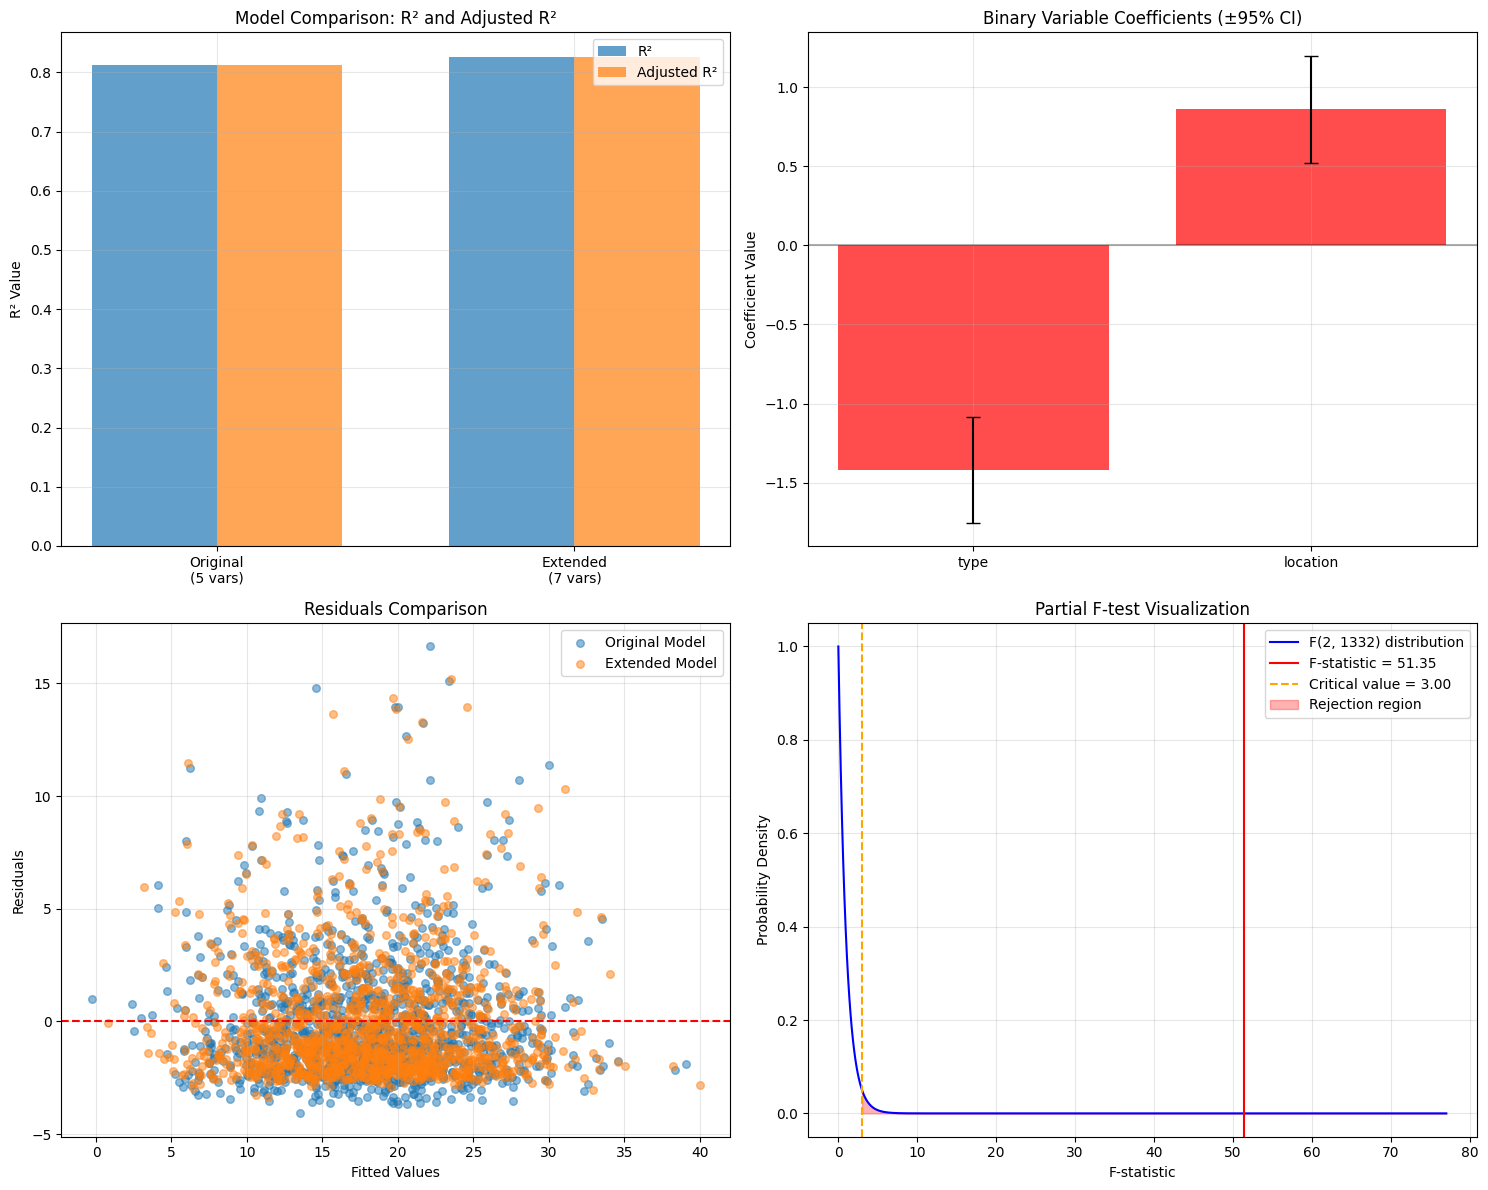

In [99]:

# (c) Partial F-test for model improvement
print(f"\n(c) Partial F-test for Model Improvement")

# For fair comparison, use same observations for both models
# Fit original model on the same subset of data as extended model
X_orig_subset = X_ext_clean[:, :5]  # First 5 columns (original variables)
model_orig_subset = LinearRegression()
model_orig_subset.fit(X_orig_subset, y_ext_clean)
y_pred_orig_subset = model_orig_subset.predict(X_orig_subset)

# Calculate statistics for original model on subset
residuals_orig_subset = y_ext_clean - y_pred_orig_subset
rss_orig_subset = np.sum(residuals_orig_subset**2)
r2_orig_subset = r2_score(y_ext_clean, y_pred_orig_subset)
k_orig = 5  # number of variables in original model
df_residual_orig_subset = n_ext - k_orig - 1

print(f"Model Comparison (same sample size: {n_ext}):")
print(f"{'Model':<20} {'R²':<12} {'Adj R²':<12} {'Variables':<10} {'RSS':<15}")
print("-" * 50)

adj_r2_orig_subset = 1 - ((1 - r2_orig_subset) * (n_ext - 1) / df_residual_orig_subset)
print(f"{'Original':<20} {r2_orig_subset:<12.4f} {adj_r2_orig_subset:<12.4f} {k_orig:<10} {rss_orig_subset:<15.4f}")
print(f"{'Extended':<20} {r2_extended:<12.4f} {adj_r2_extended:<12.4f} {k_ext:<10} {rss_ext:<15.4f}")

# Calculate R² improvement
r2_improvement = r2_extended - r2_orig_subset
print(f"\nR² Improvement: {r2_improvement:.4f} ({r2_improvement*100:.2f} percentage points)")

# Partial F-test
print(f"\nPartial F-test:")
print(f"H₀: β_type = β_location = 0 (binary variables add no explanatory power)")
print(f"H₁: At least one of β_type or β_location ≠ 0 (binary variables improve the model)")

# Calculate partial F-statistic
q = 2  # number of additional variables (type and location)
partial_f_num = (rss_orig_subset - rss_ext) / q
partial_f_den = rss_ext / df_residual_ext
partial_f_stat = partial_f_num / partial_f_den
partial_f_p_value = 1 - f_dist.cdf(partial_f_stat, q, df_residual_ext)

print(f"\nPartial F-test Calculations:")
print(f"RSS(original): {rss_orig_subset:.4f}")
print(f"RSS(extended): {rss_ext:.4f}")
print(f"Reduction in RSS: {rss_orig_subset - rss_ext:.4f}")
print(f"Additional variables (q): {q}")
print(f"DF residual (extended): {df_residual_ext}")

print(f"\nF-statistic: {partial_f_stat:.4f}")
print(f"Degrees of freedom: ({q}, {df_residual_ext})")
print(f"p-value: {partial_f_p_value:.4f}")

# Critical F-value
f_critical_partial = f_dist.ppf(0.95, q, df_residual_ext)
print(f"Critical F-value (α = 0.05): {f_critical_partial:.4f}")

print(f"\nConclusion:")
if partial_f_p_value < 0.05:
    print(f"✓ REJECT H₀: Adding type and location SIGNIFICANTLY improves the model")
    print(f"  F = {partial_f_stat:.4f} > {f_critical_partial:.4f}")
    print(f"  p-value = {partial_f_p_value:.4f} < 0.05")
    print(f"  The binary variables provide significant additional explanatory power.")
else:
    print(f"FAIL TO REJECT H₀: Adding type and location does NOT significantly improve the model")
    print(f"  F = {partial_f_stat:.4f} ≤ {f_critical_partial:.4f}")
    print(f"  p-value = {partial_f_p_value:.4f} ≥ 0.05")
    print(f"  The binary variables do not provide significant additional explanatory power.")

# Comments on improvement
print(f"\nModel Improvement Assessment:")
if r2_improvement > 0.02:
    improvement_desc = "meaningful"
elif r2_improvement > 0.01:
    improvement_desc = "modest"
else:
    improvement_desc = "minimal"

print(f"• R² improved by {r2_improvement:.4f} ({r2_improvement*100:.2f} percentage points) - this is {improvement_desc}")
print(f"• Extended model explains {r2_extended*100:.1f}% vs {r2_orig_subset*100:.1f}% of variance")
print(f"• Adjusted R² {'increased' if adj_r2_extended > adj_r2_orig_subset else 'decreased'} from {adj_r2_orig_subset:.4f} to {adj_r2_extended:.4f}")

if adj_r2_extended > adj_r2_orig_subset:
    print(f"• The improvement in adjusted R² suggests the added variables are worthwhile")
else:
    print(f"• The decrease in adjusted R² suggests the added variables may not be worthwhile")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Model comparison
models = ['Original\n(5 vars)', 'Extended\n(7 vars)']
r2_values = [r2_orig_subset, r2_extended]
adj_r2_values = [adj_r2_orig_subset, adj_r2_extended]

x_pos = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x_pos - width/2, r2_values, width, label='R²', alpha=0.7)
axes[0, 0].bar(x_pos + width/2, adj_r2_values, width, label='Adjusted R²', alpha=0.7)
axes[0, 0].set_ylabel('R² Value')
axes[0, 0].set_title('Model Comparison: R² and Adjusted R²')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Coefficients for binary variables
binary_vars = ['type', 'location']
binary_coefs = coefficients_ext[5:7]
binary_ses = coef_se_ext[5:7]
binary_colors = ['red' if p < 0.05 else 'blue' for p in p_values_ext[5:7]]

axes[0, 1].bar(binary_vars, binary_coefs, yerr=1.96*binary_ses, 
               color=binary_colors, alpha=0.7, capsize=5)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0, 1].set_ylabel('Coefficient Value')
axes[0, 1].set_title('Binary Variable Coefficients (±95% CI)')
axes[0, 1].grid(True, alpha=0.3)

# Residuals comparison
axes[1, 0].scatter(y_pred_orig_subset, residuals_orig_subset, alpha=0.5, s=30, label='Original Model')
axes[1, 0].scatter(y_pred_ext, residuals_ext, alpha=0.5, s=30, label='Extended Model')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# F-test visualization
x_f = np.linspace(0, max(partial_f_stat * 1.5, f_critical_partial * 1.5), 1000)
y_f = f_dist.pdf(x_f, q, df_residual_ext)
axes[1, 1].plot(x_f, y_f, 'b-', label=f'F({q}, {df_residual_ext}) distribution')
axes[1, 1].axvline(x=partial_f_stat, color='red', linestyle='-', 
                  label=f'F-statistic = {partial_f_stat:.2f}')
axes[1, 1].axvline(x=f_critical_partial, color='orange', linestyle='--', 
                  label=f'Critical value = {f_critical_partial:.2f}')
axes[1, 1].fill_between(x_f[x_f >= f_critical_partial], y_f[x_f >= f_critical_partial], 
                       alpha=0.3, color='red', label='Rejection region')
axes[1, 1].set_xlabel('F-statistic')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].set_title('Partial F-test Visualization')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [100]:

# Summary table
summary_data = {
    'Aspect': [
        'Extended Model Equation',
        'Type Coefficient',
        'Type Effect',
        'Statistical Significance',
        'R² Improvement',
        'Partial F-test Result'
    ],
    'Finding': [
        f'Claims = {intercept_ext:.3f} + ... + {coefficients_ext[5]:.3f}×type + {coefficients_ext[6]:.3f}×location',
        f'{coefficients_ext[5]:.3f}',
        f'Type=1 has {abs(coefficients_ext[5]):.3f} {"higher" if coefficients_ext[5] > 0 else "lower"} claims',
        f'{"Significant" if p_values_ext[5] < 0.05 else "Not significant"} (p = {p_values_ext[5]:.4f})',
        f'{r2_improvement:.4f} ({r2_improvement*100:.2f} percentage points)',
        f'{"Significant improvement" if partial_f_p_value < 0.05 else "No significant improvement"} (p = {partial_f_p_value:.4f})'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(f"\n\nExecutive Summary:")
print(summary_df.to_string(index=False))

# print(f"\nLaTeX Summary Table:")
# print(summary_df.to_latex(index=False, caption="Extended Regression Model Summary", 
#                          label="tab:extended_model_summary"))



Executive Summary:
                  Aspect                                             Finding
 Extended Model Equation Claims = 3.027 + ... + -1.419×type + 0.859×location
        Type Coefficient                                              -1.419
             Type Effect                       Type=1 has 1.419 lower claims
Statistical Significance                            Significant (p = 0.0000)
          R² Improvement                     0.0134 (1.34 percentage points)
   Partial F-test Result                Significant improvement (p = 0.0000)


<h2>6 Interaction Effects</h2>
<h3>Create a new model that includes an interaction term between deductible and type.</h3>

<h4>(a) Write the regression function that includes this interaction term.</h4>

In [101]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Regression Model with Interaction Term: Deductible × Type")
print("Model Features: deductible, type, coverage, age, prior_claims, premium")
print("Interaction Term: deductible × type")

# Prepare the data
base_vars = ['deductible', 'type', 'coverage', 'age', 'prior_claims', 'premium']
X_base = df[base_vars].values
y = df['claims'].values

# Remove missing values
complete_cases = ~(np.isnan(X_base).any(axis=1) | np.isnan(y))
X_base_clean = X_base[complete_cases]
y_clean = y[complete_cases]

# Create interaction term: deductible × type
deductible_col = 0  # deductible is first column
type_col = 1        # type is second column

interaction_term = X_base_clean[:, deductible_col] * X_base_clean[:, type_col]

# Create the full feature matrix including interaction
X_with_interaction = np.column_stack([X_base_clean, interaction_term])
feature_names = base_vars + ['deductible_x_type']

print(f"\nData Summary:")
print(f"Total observations: {len(df):,}")
print(f"Complete cases used: {len(X_with_interaction):,}")
print(f"Missing values removed: {len(df) - len(X_with_interaction):,}")

# Check coding of type variable
type_values = sorted(df['type'].dropna().unique())
print(f"Type variable coding: {type_values}")

# Sample statistics for interaction term
print(f"\nInteraction Term (deductible × type) Statistics:")
print(f"Mean: {np.mean(interaction_term):.4f}")
print(f"Std Dev: {np.std(interaction_term):.4f}")
print(f"Range: [{np.min(interaction_term):.4f}, {np.max(interaction_term):.4f}]")

# Fit the model with interaction
model = LinearRegression()
model.fit(X_with_interaction, y_clean)
y_pred = model.predict(X_with_interaction)

# Extract model parameters
intercept = model.intercept_
coefficients = model.coef_
n = len(X_with_interaction)
k = X_with_interaction.shape[1]  # number of features including interaction
df_residual = n - k - 1

# Calculate model statistics
residuals = y_clean - y_pred
rss = np.sum(residuals**2)
tss = np.sum((y_clean - np.mean(y_clean))**2)
mse = rss / df_residual
r_squared = r2_score(y_clean, y_pred)
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / df_residual)

# Calculate standard errors
X_with_intercept = np.column_stack([np.ones(n), X_with_interaction])
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
var_coef = mse * np.diag(XtX_inv)
std_errors = np.sqrt(var_coef)
intercept_se = std_errors[0]
coef_se = std_errors[1:]

# Calculate t-statistics and p-values
t_stats = coefficients / coef_se
p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), df_residual))

print(f"\nModel Summary:")
print(f"R²: {r_squared:.4f}")
print(f"Adjusted R²: {adj_r_squared:.4f}")
print(f"Residual Standard Error: {np.sqrt(mse):.4f}")
print(f"F-statistic: {((tss - rss) / k) / (rss / df_residual):.4f}")

# Display coefficient table
print(f"\nCoefficient Estimates:")
print(f"{'Variable':<18} {'Coefficient':<12} {'Std Error':<12} {'t-stat':<10} {'p-value':<10} {'Sig'}")
print("-" * 50)

print(f"{'Intercept':<18} {intercept:<12.4f} {intercept_se:<12.4f}")

for i, var in enumerate(feature_names):
    sig_code = "***" if p_values[i] < 0.001 else "**" if p_values[i] < 0.01 else "*" if p_values[i] < 0.05 else ""
    print(f"{var:<18} {coefficients[i]:<12.4f} {coef_se[i]:<12.4f} {t_stats[i]:<10.4f} {p_values[i]:<10.4f} {sig_code}")

print("Significance codes: *** p<0.001, ** p<0.01, * p<0.05")

# (a) Write the regression function with interaction term
print(f"\n(a) Regression Function with Interaction Term")

print(f"General Form:")
print(f"Claims = β₀ + β₁×deductible + β₂×type + β₃×coverage + β₄×age + β₅×prior_claims + β₆×premium + β₇×(deductible×type) + ε")

print(f"\nFitted Regression Equation:")
equation_parts = [f"{intercept:.4f}"]

coef_labels = ['deductible', 'type', 'coverage', 'age', 'prior_claims', 'premium', '(deductible×type)']
for i, label in enumerate(coef_labels):
    coef = coefficients[i]
    if coef >= 0:
        equation_parts.append(f"+ {coef:.4f}×{label}")
    else:
        equation_parts.append(f"- {abs(coef):.4f}×{label}")

equation = "Claims = " + " ".join(equation_parts)
print(equation)

print(f"\nWith Coefficient Values:")
print(f"Claims = {intercept:.4f} + {coefficients[0]:.4f}×deductible + {coefficients[1]:.4f}×type")
print(f"         + {coefficients[2]:.4f}×coverage + {coefficients[3]:.4f}×age + {coefficients[4]:.4f}×prior_claims")
print(f"         + {coefficients[5]:.4f}×premium + {coefficients[6]:.4f}×(deductible×type)")

# # LaTeX format
# latex_eq = f"\\hat{{Claims}} = {intercept:.4f}"
# for i, var in enumerate(feature_names):
#     coef = coefficients[i]
#     var_latex = var.replace('_x_', ' \\times ').replace('_', '\\_')
#     if coef >= 0:
#         latex_eq += f" + {coef:.4f} \\times {var_latex}"
#     else:
#         latex_eq += f" - {abs(coef):.4f} \\times {var_latex}"

# print(f"\nLaTeX Format:")
# print(latex_eq)

Regression Model with Interaction Term: Deductible × Type
Model Features: deductible, type, coverage, age, prior_claims, premium
Interaction Term: deductible × type

Data Summary:
Total observations: 1,340
Complete cases used: 1,340
Missing values removed: 0
Type variable coding: [np.int64(0), np.int64(1)]

Interaction Term (deductible × type) Statistics:
Mean: 1.5335
Std Dev: 1.9042
Range: [0.0000, 10.0000]

Model Summary:
R²: 0.8233
Adjusted R²: 0.8224
Residual Standard Error: 2.7172
F-statistic: 886.8341

Coefficient Estimates:
Variable           Coefficient  Std Error    t-stat     p-value    Sig
--------------------------------------------------
Intercept          3.2856       0.3300      
deductible         -0.6729      0.0596       -11.2894   0.0000     ***
type               -1.2573      0.2598       -4.8392    0.0000     ***
coverage           0.0553       0.0021       25.9580    0.0000     ***
age                0.0703       0.0070       10.1034    0.0000     ***
prior_claims

<h4>(b) Interpret how the effect of deductible on claims differs between residential and commercial
properties.
</h4>

In [102]:

# (b) Interpret the interaction effect
print(f"\n(b) Interpretation of Deductible Effect by Property Type")

deductible_coef = coefficients[0]  # β₁
type_coef = coefficients[1]        # β₂
interaction_coef = coefficients[6] # β₇

print(f"Key Coefficients:")
print(f"β₁ (deductible): {deductible_coef:.4f}")
print(f"β₂ (type): {type_coef:.4f}")
print(f"β₇ (deductible×type): {interaction_coef:.4f}")

print(f"\nInterpretation of Interaction Effect:")
print(f"The interaction model allows the effect of deductible to differ by property type.")

print(f"\nFor Commercial Properties (type = 0):")
print(f"∂Claims/∂deductible = β₁ + β₇×0 = β₁ = {deductible_coef:.4f}")
print(f"• A 1-unit increase in deductible changes claims by {deductible_coef:.4f} units for commercial properties.")

print(f"\nFor Residential Properties (type = 1):")
total_deductible_effect = deductible_coef + interaction_coef
print(f"∂Claims/∂deductible = β₁ + β₇×1 = β₁ + β₇ = {deductible_coef:.4f} + {interaction_coef:.4f} = {total_deductible_effect:.4f}")
print(f"• A 1-unit increase in deductible changes claims by {total_deductible_effect:.4f} units for residential properties.")

print(f"\nComparison:")
difference = total_deductible_effect - deductible_coef
print(f"Difference in deductible effect: {difference:.4f}")

if interaction_coef > 0:
    print(f"• The deductible effect is {abs(difference):.4f} units MORE POSITIVE for residential properties.")
    print(f"• Deductible increases have a stronger positive effect on residential claims than commercial claims.")
elif interaction_coef < 0:
    print(f"• The deductible effect is {abs(difference):.4f} units MORE NEGATIVE for residential properties.")
    print(f"• Deductible increases have a stronger negative effect on residential claims than commercial claims.")
else:
    print(f"• The deductible effect is the same for both property types (no interaction).")

# Practical interpretation
print(f"\nPractical Business Interpretation:")
if deductible_coef > 0 and total_deductible_effect > 0:
    if total_deductible_effect > deductible_coef:
        print(f"• Higher deductibles are associated with higher claims for both property types")
        print(f"• This association is STRONGER for residential properties")
        print(f"• Residential properties may be more sensitive to deductible amounts")
    else:
        print(f"• Higher deductibles are associated with higher claims for both property types")
        print(f"• This association is WEAKER for residential properties")
elif deductible_coef < 0 and total_deductible_effect < 0:
    if abs(total_deductible_effect) > abs(deductible_coef):
        print(f"• Higher deductibles are associated with lower claims for both property types")
        print(f"• This association is STRONGER for residential properties")
    else:
        print(f"• Higher deductibles are associated with lower claims for both property types")
        print(f"• This association is WEAKER for residential properties")
else:
    print(f"• The relationship between deductibles and claims differs in direction between property types")



(b) Interpretation of Deductible Effect by Property Type
Key Coefficients:
β₁ (deductible): -0.6729
β₂ (type): -1.2573
β₇ (deductible×type): -0.0946

Interpretation of Interaction Effect:
The interaction model allows the effect of deductible to differ by property type.

For Commercial Properties (type = 0):
∂Claims/∂deductible = β₁ + β₇×0 = β₁ = -0.6729
• A 1-unit increase in deductible changes claims by -0.6729 units for commercial properties.

For Residential Properties (type = 1):
∂Claims/∂deductible = β₁ + β₇×1 = β₁ + β₇ = -0.6729 + -0.0946 = -0.7675
• A 1-unit increase in deductible changes claims by -0.7675 units for residential properties.

Comparison:
Difference in deductible effect: -0.0946
• The deductible effect is 0.0946 units MORE NEGATIVE for residential properties.
• Deductible increases have a stronger negative effect on residential claims than commercial claims.

Practical Business Interpretation:
• Higher deductibles are associated with lower claims for both property

<h4>(c) Test whether the interaction term is statistically significant at the 5% level.</h4>


(c) Statistical Significance Test for Interaction Term
Hypothesis Test for Interaction Term:
H₀: β₇ = 0 (no interaction between deductible and type)
H₁: β₇ ≠ 0 (significant interaction exists)
Significance level: α = 0.05

Test Statistics:
Interaction coefficient (β₇): -0.0946
Standard error: 0.0779
t-statistic: -1.2151
Degrees of freedom: 1332
p-value: 0.2245
Critical value (±): 1.9617

Decision Rule:
Reject H₀ if |t-statistic| > 1.9617 OR if p-value < 0.05

Conclusion:
FAIL TO REJECT H₀: The interaction term is NOT statistically significant at the 5% level.
  |t-statistic| = 1.2151 ≤ 1.9617
  p-value = 0.2245 ≥ 0.05
  The effect of deductible on claims does NOT differ significantly between property types.
  The interaction term may not be necessary.

95% Confidence Interval for Interaction Coefficient:
[-0.2473, 0.0581]
• The interval contains zero - the direction of the interaction effect is uncertain


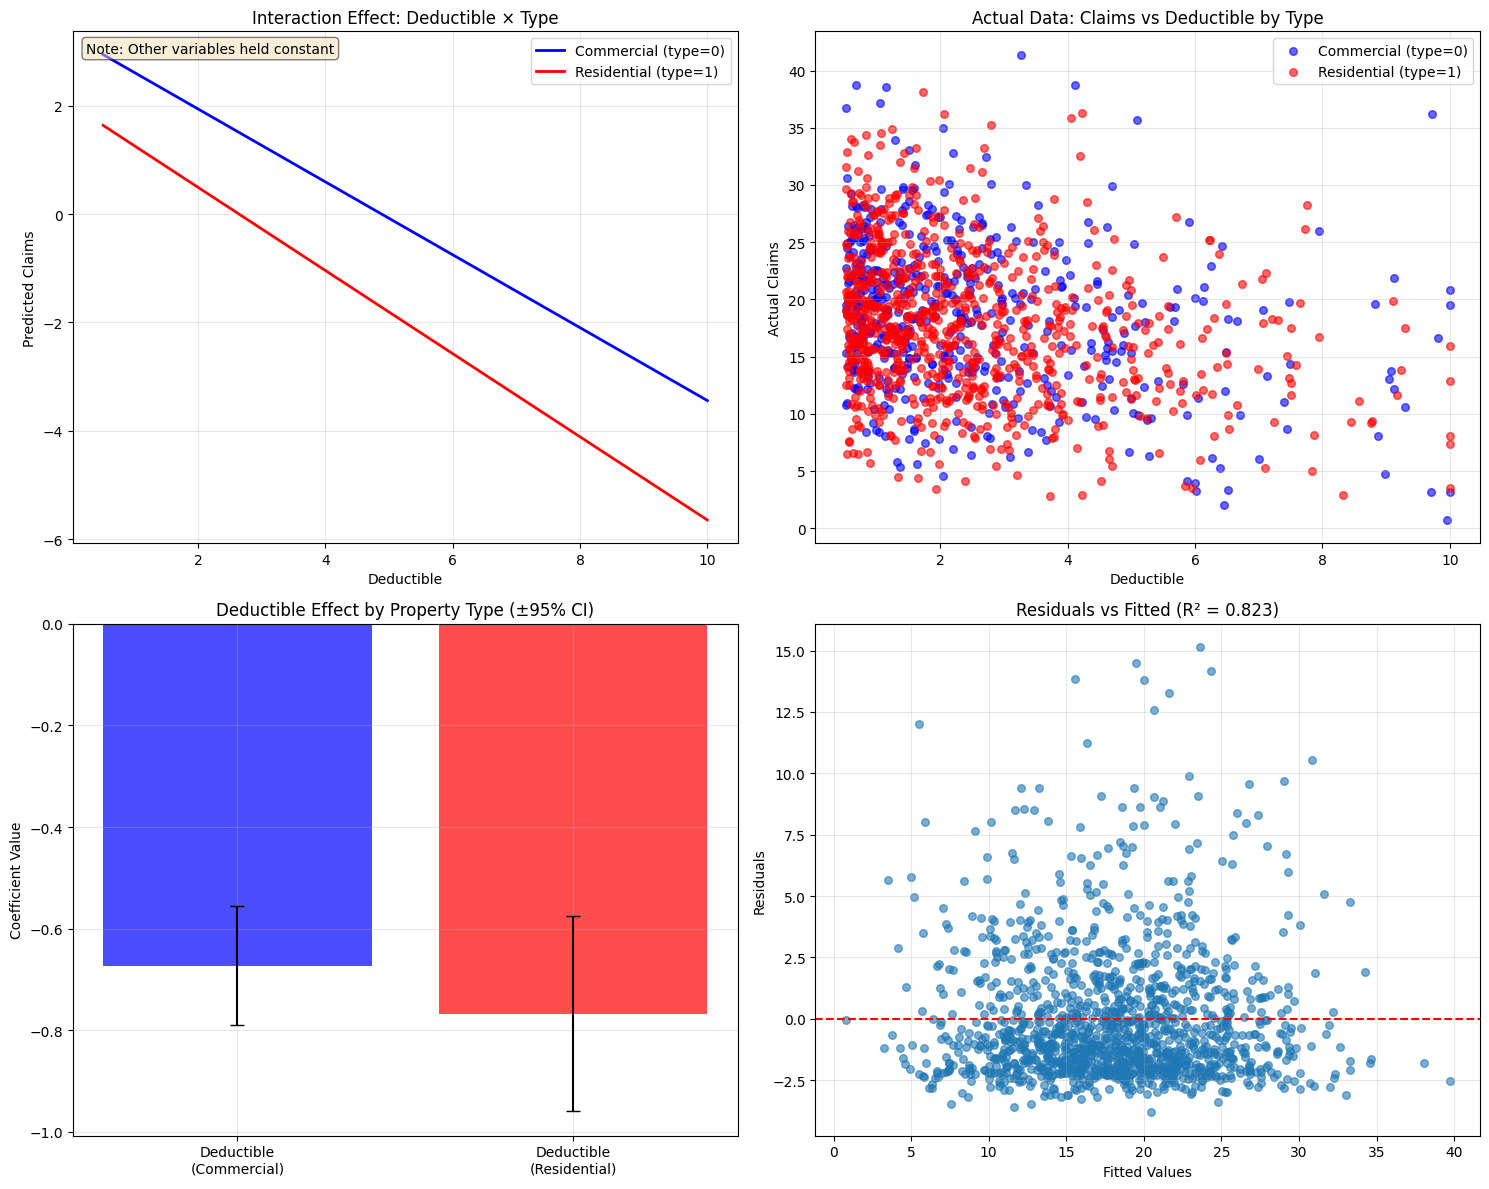

In [103]:

# (c) Test significance of interaction term
print(f"\n(c) Statistical Significance Test for Interaction Term")

interaction_t_stat = t_stats[6]
interaction_p_value = p_values[6]
interaction_se = coef_se[6]

print(f"Hypothesis Test for Interaction Term:")
print(f"H₀: β₇ = 0 (no interaction between deductible and type)")
print(f"H₁: β₇ ≠ 0 (significant interaction exists)")
print(f"Significance level: α = 0.05")

print(f"\nTest Statistics:")
print(f"Interaction coefficient (β₇): {interaction_coef:.4f}")
print(f"Standard error: {interaction_se:.4f}")
print(f"t-statistic: {interaction_t_stat:.4f}")
print(f"Degrees of freedom: {df_residual}")
print(f"p-value: {interaction_p_value:.4f}")

# Critical value
t_critical = t_dist.ppf(0.975, df_residual)
print(f"Critical value (±): {t_critical:.4f}")

print(f"\nDecision Rule:")
print(f"Reject H₀ if |t-statistic| > {t_critical:.4f} OR if p-value < 0.05")

print(f"\nConclusion:")
if interaction_p_value < 0.05:
    print(f"✓ REJECT H₀: The interaction term IS statistically significant at the 5% level.")
    print(f"  |t-statistic| = {abs(interaction_t_stat):.4f} {'>' if abs(interaction_t_stat) > t_critical else '≤'} {t_critical:.4f}")
    print(f"  p-value = {interaction_p_value:.4f} < 0.05")
    print(f"  The effect of deductible on claims DOES differ significantly between property types.")
    print(f"  Including this interaction term improves the model.")
else:
    print(f"FAIL TO REJECT H₀: The interaction term is NOT statistically significant at the 5% level.")
    print(f"  |t-statistic| = {abs(interaction_t_stat):.4f} ≤ {t_critical:.4f}")
    print(f"  p-value = {interaction_p_value:.4f} ≥ 0.05")
    print(f"  The effect of deductible on claims does NOT differ significantly between property types.")
    print(f"  The interaction term may not be necessary.")

# 95% Confidence Interval for interaction
margin_error = t_critical * interaction_se
ci_lower = interaction_coef - margin_error
ci_upper = interaction_coef + margin_error

print(f"\n95% Confidence Interval for Interaction Coefficient:")
print(f"[{ci_lower:.4f}, {ci_upper:.4f}]")

if ci_lower > 0:
    print(f"• The interval is entirely positive - interaction definitely strengthens the deductible effect for residential properties")
elif ci_upper < 0:
    print(f"• The interval is entirely negative - interaction definitely weakens the deductible effect for residential properties")
else:
    print(f"• The interval contains zero - the direction of the interaction effect is uncertain")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Interaction effect visualization
deductible_range = np.linspace(df['deductible'].min(), df['deductible'].max(), 100)
commercial_predictions = intercept + deductible_coef * deductible_range  # Simplified, holding other vars at mean
residential_predictions = intercept + deductible_coef * deductible_range + type_coef + interaction_coef * deductible_range

axes[0, 0].plot(deductible_range, commercial_predictions, 'b-', linewidth=2, label='Commercial (type=0)')
axes[0, 0].plot(deductible_range, residential_predictions, 'r-', linewidth=2, label='Residential (type=1)')
axes[0, 0].set_xlabel('Deductible')
axes[0, 0].set_ylabel('Predicted Claims')
axes[0, 0].set_title('Interaction Effect: Deductible × Type')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add note about other variables
axes[0, 0].text(0.02, 0.98, 'Note: Other variables held constant', 
                transform=axes[0, 0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Actual data points by type
type_0_mask = X_base_clean[:, type_col] == 0
type_1_mask = X_base_clean[:, type_col] == 1

axes[0, 1].scatter(X_base_clean[type_0_mask, deductible_col], y_clean[type_0_mask], 
                  alpha=0.6, s=30, label='Commercial (type=0)', color='blue')
axes[0, 1].scatter(X_base_clean[type_1_mask, deductible_col], y_clean[type_1_mask], 
                  alpha=0.6, s=30, label='Residential (type=1)', color='red')
axes[0, 1].set_xlabel('Deductible')
axes[0, 1].set_ylabel('Actual Claims')
axes[0, 1].set_title('Actual Data: Claims vs Deductible by Type')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Coefficients comparison
coef_names = ['Deductible\n(Commercial)', 'Deductible\n(Residential)']
coef_values = [deductible_coef, total_deductible_effect]
coef_errors = [coef_se[0], np.sqrt(coef_se[0]**2 + coef_se[6]**2 + 2*0)]  # Approximate SE for sum

axes[1, 0].bar(coef_names, coef_values, yerr=1.96*np.array(coef_errors), 
               color=['blue', 'red'], alpha=0.7, capsize=5)
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].set_ylabel('Coefficient Value')
axes[1, 0].set_title('Deductible Effect by Property Type (±95% CI)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Model residuals vs fitted
axes[1, 1].scatter(y_pred, residuals, alpha=0.6, s=30)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals vs Fitted (R² = {r_squared:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [104]:

# Summary table
summary_data = {
    'Aspect': [
        'Model Specification',
        'Interaction Coefficient',
        'Commercial Effect',
        'Residential Effect',
        'Difference',
        'Statistical Significance',
        'Model R²'
    ],
    'Result': [
        'Claims ~ deductible + type + coverage + age + prior_claims + premium + deductible×type',
        f'{interaction_coef:.4f} (SE = {interaction_se:.4f})',
        f'{deductible_coef:.4f} per unit deductible',
        f'{total_deductible_effect:.4f} per unit deductible',
        f'{difference:.4f}',
        f'{"Significant" if interaction_p_value < 0.05 else "Not significant"} (p = {interaction_p_value:.4f})',
        f'{r_squared:.4f}'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(f"\n\nExecutive Summary:")
print(summary_df.to_string(index=False))

print(f"\nModel Interpretation:")
if interaction_p_value < 0.05:
    print(f"• The significant interaction suggests that deductible policies should be")
    print(f"  differentiated between commercial and residential properties")
    print(f"• The differential effect of {abs(difference):.4f} is statistically meaningful")
else:
    print(f"• The non-significant interaction suggests that deductible effects are")
    print(f"  similar across commercial and residential properties")
    print(f"• A simpler model without interaction may be adequate")

# print(f"\nLaTeX Summary Table:")
# print(summary_df.to_latex(index=False, caption="Interaction Model Analysis Summary", 
#                          label="tab:interaction_summary"))



Executive Summary:
                  Aspect                                                                                 Result
     Model Specification Claims ~ deductible + type + coverage + age + prior_claims + premium + deductible×type
 Interaction Coefficient                                                                  -0.0946 (SE = 0.0779)
       Commercial Effect                                                            -0.6729 per unit deductible
      Residential Effect                                                            -0.7675 per unit deductible
              Difference                                                                                -0.0946
Statistical Significance                                                           Not significant (p = 0.2245)
                Model R²                                                                                 0.8233

Model Interpretation:
• The non-significant interaction suggests that deductible e

<h2>7 Residual Analysis</h2>
<h3>Using your model from Question 5:</h3>

<h4>(a) Create a plot of residuals versus fitted values. Comment on any patterns you observe.</h4>

Residual Analysis and Model Diagnostics
Extended Multiple Linear Regression Model
Variables: deductible, coverage, age, prior_claims, premium, type, location
Model Summary:
Observations: 1,340
Variables: 7
R²: 0.8263
Residual Standard Error: 2.6939

(a) Residuals vs Fitted Values Analysis
Residuals vs Fitted Values Analysis:
Residual range: [-3.376, 15.203]
Fitted values range: [0.792, 39.985]

Pattern Analysis:
Correlation between fitted values and squared residuals: 0.0310
• Variance appears roughly constant
• Correlation magnitude suggests homoscedasticity (constant variance)

Linearity Assessment:
Mean residuals by fitted value terciles:
• Low tercile: -0.0800
• Middle tercile: 0.0229
• High tercile: 0.0572
• Maximum deviation from zero: 0.0800 (suggests linear relationship is appropriate)


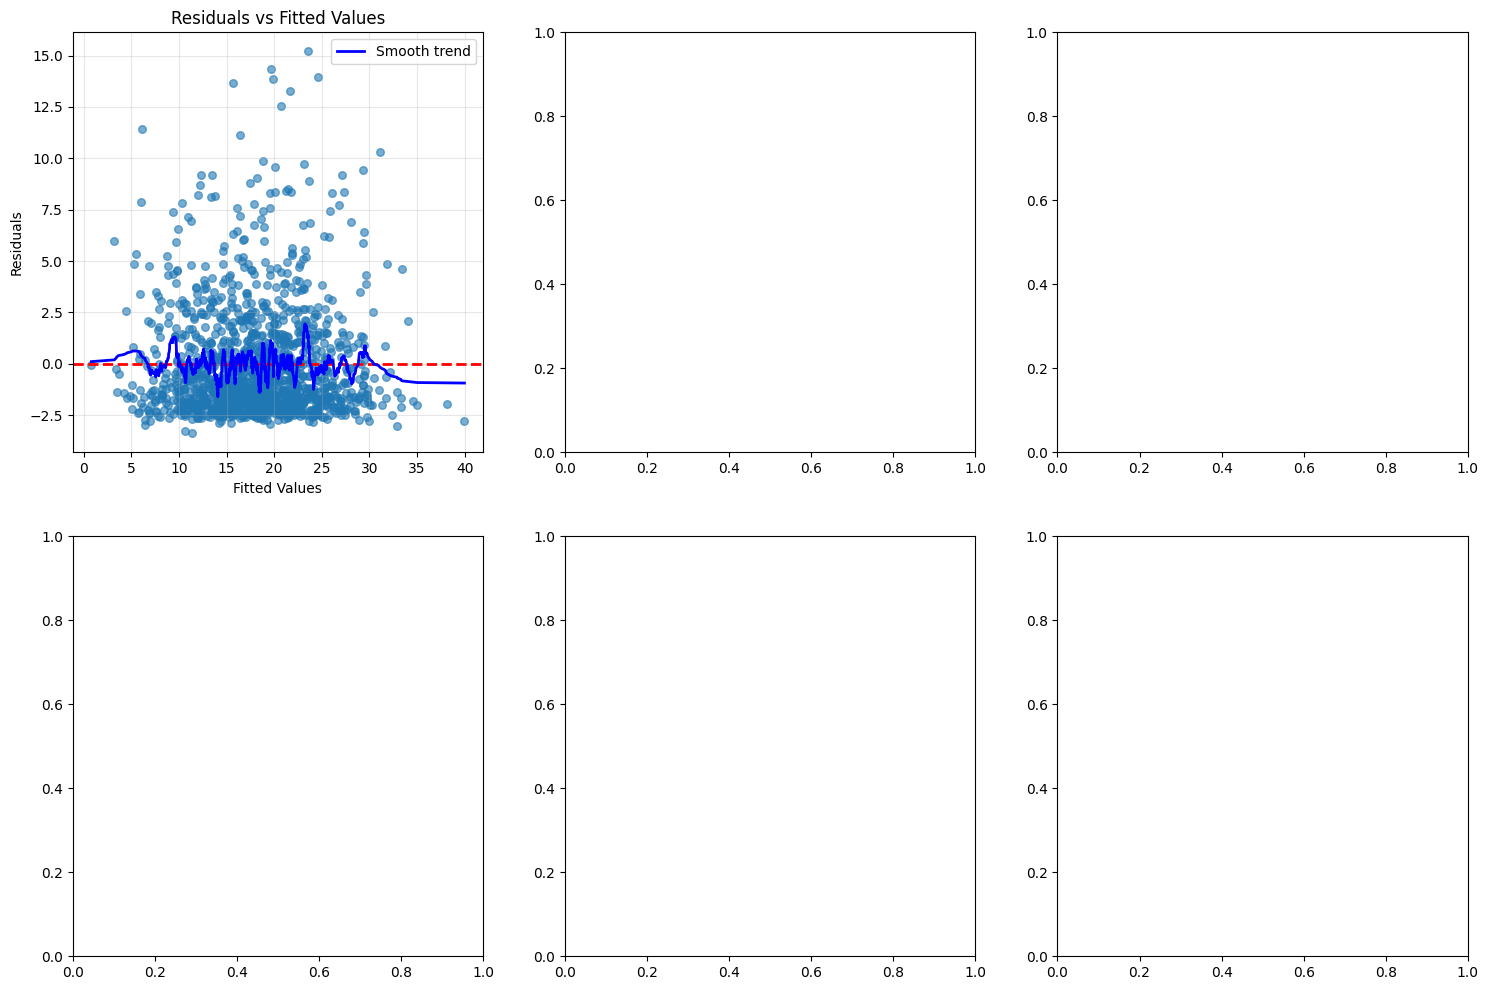

In [105]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Residual Analysis and Model Diagnostics")
print("Extended Multiple Linear Regression Model")
print("Variables: deductible, coverage, age, prior_claims, premium, type, location")

# Prepare the data for extended model
extended_vars = ['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location']
X = df[extended_vars].values
y = df['claims'].values

# Remove missing values
complete_cases = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X_clean = X[complete_cases]
y_clean = y[complete_cases]

# Fit the extended model
model = LinearRegression()
model.fit(X_clean, y_clean)
y_pred = model.predict(X_clean)

# Calculate model statistics
n = len(X_clean)
k = X_clean.shape[1]
df_residual = n - k - 1

# Calculate residuals and standardized residuals
residuals = y_clean - y_pred
rss = np.sum(residuals**2)
mse = rss / df_residual
residual_std_error = np.sqrt(mse)

# Calculate standardized residuals
standardized_residuals = residuals / residual_std_error

# Calculate studentized residuals
# Need leverage values for this
X_with_intercept = np.column_stack([np.ones(n), X_clean])
H = X_with_intercept @ np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
leverage = np.diag(H)
studentized_residuals = residuals / (residual_std_error * np.sqrt(1 - leverage))

# Calculate Cook's Distance
cooks_distance = (standardized_residuals**2 / k) * (leverage / (1 - leverage))

print(f"Model Summary:")
print(f"Observations: {n:,}")
print(f"Variables: {k}")
print(f"R²: {r2_score(y_clean, y_pred):.4f}")
print(f"Residual Standard Error: {residual_std_error:.4f}")

# (a) Residuals vs Fitted Values Plot
print(f"\n(a) Residuals vs Fitted Values Analysis")

# Create comprehensive residual plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Residuals vs Fitted Values
axes[0, 0].scatter(y_pred, residuals, alpha=0.6, s=30)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True, alpha=0.3)

# Add LOWESS smooth line to help identify patterns
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

# Sort data for smooth line
sorted_indices = np.argsort(y_pred)
sorted_fitted = y_pred[sorted_indices]
sorted_residuals = residuals[sorted_indices]

# Apply smoothing
if len(sorted_fitted) > 10:
    window_length = min(51, len(sorted_fitted) // 3)
    if window_length % 2 == 0:
        window_length += 1
    if window_length >= 3:
        try:
            smooth_residuals = savgol_filter(sorted_residuals, window_length, 3)
            axes[0, 0].plot(sorted_fitted, smooth_residuals, color='blue', linewidth=2, 
                           label='Smooth trend')
            axes[0, 0].legend()
        except:
            pass

# Calculate statistics for pattern analysis
residual_range = np.max(residuals) - np.min(residuals)
fitted_range = np.max(y_pred) - np.min(y_pred)

# Analyze patterns
print(f"Residuals vs Fitted Values Analysis:")
print(f"Residual range: [{np.min(residuals):.3f}, {np.max(residuals):.3f}]")
print(f"Fitted values range: [{np.min(y_pred):.3f}, {np.max(y_pred):.3f}]")

# Test for heteroscedasticity using Breusch-Pagan test approximation
# Regress squared residuals on fitted values
squared_residuals = residuals**2
correlation_het = np.corrcoef(y_pred, squared_residuals)[0, 1]

print(f"\nPattern Analysis:")
print(f"Correlation between fitted values and squared residuals: {correlation_het:.4f}")

if abs(correlation_het) > 0.1:
    het_interpretation = "suggests possible heteroscedasticity"
    if correlation_het > 0:
        het_direction = "Variance increases with fitted values (heteroscedasticity)"
    else:
        het_direction = "Variance decreases with fitted values (heteroscedasticity)"
else:
    het_interpretation = "suggests homoscedasticity (constant variance)"
    het_direction = "Variance appears roughly constant"

print(f"• {het_direction}")
print(f"• Correlation magnitude {het_interpretation}")

# Check for non-linearity
# Calculate residuals in different ranges of fitted values
fitted_terciles = np.percentile(y_pred, [33.33, 66.67])
low_residuals = residuals[y_pred <= fitted_terciles[0]]
mid_residuals = residuals[(y_pred > fitted_terciles[0]) & (y_pred <= fitted_terciles[1])]
high_residuals = residuals[y_pred > fitted_terciles[1]]

low_mean = np.mean(low_residuals) if len(low_residuals) > 0 else 0
mid_mean = np.mean(mid_residuals) if len(mid_residuals) > 0 else 0
high_mean = np.mean(high_residuals) if len(high_residuals) > 0 else 0

print(f"\nLinearity Assessment:")
print(f"Mean residuals by fitted value terciles:")
print(f"• Low tercile: {low_mean:.4f}")
print(f"• Middle tercile: {mid_mean:.4f}")
print(f"• High tercile: {high_mean:.4f}")

max_tercile_diff = max(abs(low_mean), abs(mid_mean), abs(high_mean))
if max_tercile_diff > residual_std_error * 0.1:
    linearity_assessment = "may indicate non-linearity"
else:
    linearity_assessment = "suggests linear relationship is appropriate"

print(f"• Maximum deviation from zero: {max_tercile_diff:.4f} ({linearity_assessment})")


<h4>(b) Create a Q-Q plot of the residuals. Does the normality assumption appear to be satisfied?</h4>

In [106]:

# (b) Q-Q Plot Analysis
print(f"\n(b) Q-Q Plot and Normality Analysis")

# Create Q-Q plot
axes[0, 1].set_title('Q-Q Plot of Residuals')
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].grid(True, alpha=0.3)

# Normality tests
shapiro_stat, shapiro_p = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
jarque_stat, jarque_p = stats.jarque_bera(residuals)
ks_stat, ks_p = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

print(f"Normality Test Results:")
print(f"Shapiro-Wilk Test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
print(f"  {'REJECT normality' if shapiro_p < 0.05 else 'ACCEPT normality'} at α=0.05")

print(f"\nJarque-Bera Test:")
print(f"  Statistic: {jarque_stat:.4f}")
print(f"  p-value: {jarque_p:.4f}")
print(f"  {'REJECT normality' if jarque_p < 0.05 else 'ACCEPT normality'} at α=0.05")

print(f"\nKolmogorov-Smirnov Test:")
print(f"  Statistic: {ks_stat:.4f}")
print(f"  p-value: {ks_p:.4f}")
print(f"  {'REJECT normality' if ks_p < 0.05 else 'ACCEPT normality'} at α=0.05")

# Additional normality diagnostics
skewness = stats.skew(residuals)
kurtosis_val = stats.kurtosis(residuals)

print(f"\nDescriptive Statistics for Normality:")
print(f"Skewness: {skewness:.4f} (Normal ≈ 0)")
print(f"Kurtosis: {kurtosis_val:.4f} (Normal ≈ 0)")

skewness_interpretation = "approximately symmetric" if abs(skewness) < 0.5 else \
                         "moderately skewed" if abs(skewness) < 1 else "highly skewed"
kurtosis_interpretation = "approximately normal" if abs(kurtosis_val) < 0.5 else \
                         "heavy-tailed" if kurtosis_val > 0.5 else "light-tailed"

print(f"Skewness interpretation: {skewness_interpretation}")
print(f"Kurtosis interpretation: {kurtosis_interpretation}")

normality_conclusion = "satisfied" if (shapiro_p > 0.05 and abs(skewness) < 1 and abs(kurtosis_val) < 2) else "violated"
print(f"\nOverall Normality Assessment: Assumption appears to be {normality_conclusion}")

# Plot 2: Histogram of residuals with normal overlay
axes[0, 2].hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, np.mean(residuals), np.std(residuals))
axes[0, 2].plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution')
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Histogram of Residuals')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)



(b) Q-Q Plot and Normality Analysis
Normality Test Results:
Shapiro-Wilk Test:
  Statistic: 0.8106
  p-value: 0.0000
  REJECT normality at α=0.05

Jarque-Bera Test:
  Statistic: 2188.1490
  p-value: 0.0000
  REJECT normality at α=0.05

Kolmogorov-Smirnov Test:
  Statistic: 0.1468
  p-value: 0.0000
  REJECT normality at α=0.05

Descriptive Statistics for Normality:
Skewness: 1.9531 (Normal ≈ 0)
Kurtosis: 4.8921 (Normal ≈ 0)
Skewness interpretation: highly skewed
Kurtosis interpretation: heavy-tailed

Overall Normality Assessment: Assumption appears to be violated


<h4>(c) Identify any observations that might be outliers or influential points based on your residual analysis.</h4>

In [107]:

# (c) Outliers and Influential Points
print(f"\n(c) Outliers and Influential Points Analysis")

# Define thresholds
outlier_threshold = 3  # for standardized residuals
high_leverage_threshold = 2 * (k + 1) / n  # common rule: 2(k+1)/n
high_cooks_threshold = 4 / n  # common rule: 4/n

# Identify outliers and influential points
outliers_std = np.abs(standardized_residuals) > outlier_threshold
outliers_studentized = np.abs(studentized_residuals) > outlier_threshold
high_leverage_points = leverage > high_leverage_threshold
high_cooks_points = cooks_distance > high_cooks_threshold

print(f"Diagnostic Thresholds:")
print(f"Outlier threshold (standardized residuals): ±{outlier_threshold}")
print(f"High leverage threshold: {high_leverage_threshold:.4f}")
print(f"High Cook's distance threshold: {high_cooks_threshold:.4f}")

print(f"\nOutliers and Influential Points:")
print(f"Observations with |standardized residuals| > {outlier_threshold}: {np.sum(outliers_std)}")
print(f"Observations with |studentized residuals| > {outlier_threshold}: {np.sum(outliers_studentized)}")
print(f"High leverage points: {np.sum(high_leverage_points)}")
print(f"High Cook's distance points: {np.sum(high_cooks_points)}")

# Find extreme cases
most_extreme_indices = {
    'highest_residual': np.argmax(np.abs(standardized_residuals)),
    'highest_leverage': np.argmax(leverage),
    'highest_cooks': np.argmax(cooks_distance)
}

print(f"\nMost Extreme Observations:")
for desc, idx in most_extreme_indices.items():
    print(f"{desc.replace('_', ' ').title()}: Observation {idx + 1}")
    print(f"  Fitted value: {y_pred[idx]:.3f}")
    print(f"  Actual value: {y_clean[idx]:.3f}")
    print(f"  Standardized residual: {standardized_residuals[idx]:.3f}")
    print(f"  Leverage: {leverage[idx]:.4f}")
    print(f"  Cook's distance: {cooks_distance[idx]:.4f}")

# Create diagnostic plots for outliers
axes[1, 0].scatter(leverage, studentized_residuals, alpha=0.6, s=30)
axes[1, 0].axhline(y=outlier_threshold, color='red', linestyle='--', label=f'Outlier threshold (±{outlier_threshold})')
axes[1, 0].axhline(y=-outlier_threshold, color='red', linestyle='--')
axes[1, 0].axvline(x=high_leverage_threshold, color='orange', linestyle='--', label=f'High leverage ({high_leverage_threshold:.3f})')
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Studentized Residuals')
axes[1, 0].set_title('Leverage vs Studentized Residuals')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Highlight problematic points
problematic = high_leverage_points | outliers_studentized
if np.any(problematic):
    axes[1, 0].scatter(leverage[problematic], studentized_residuals[problematic], 
                      color='red', s=60, alpha=0.8, label='Potential problems')
    axes[1, 0].legend()

# Cook's Distance plot
axes[1, 1].scatter(range(len(cooks_distance)), cooks_distance, alpha=0.6, s=30)
axes[1, 1].axhline(y=high_cooks_threshold, color='red', linestyle='--', 
                  label=f'High Cook\'s D ({high_cooks_threshold:.4f})')
axes[1, 1].set_xlabel('Observation Index')
axes[1, 1].set_ylabel('Cook\'s Distance')
axes[1, 1].set_title('Cook\'s Distance')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Scale-Location plot (sqrt of standardized residuals vs fitted)
axes[1, 2].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, s=30)
axes[1, 2].set_xlabel('Fitted Values')
axes[1, 2].set_ylabel('√|Standardized Residuals|')
axes[1, 2].set_title('Scale-Location Plot')
axes[1, 2].grid(True, alpha=0.3)

# Add smooth line for Scale-Location plot
if len(y_pred) > 10:
    try:
        sorted_indices_scale = np.argsort(y_pred)
        sorted_fitted_scale = y_pred[sorted_indices_scale]
        sorted_scale_residuals = np.sqrt(np.abs(standardized_residuals[sorted_indices_scale]))
        
        window_length = min(51, len(sorted_fitted_scale) // 3)
        if window_length % 2 == 0:
            window_length += 1
        if window_length >= 3:
            smooth_scale = savgol_filter(sorted_scale_residuals, window_length, 3)
            axes[1, 2].plot(sorted_fitted_scale, smooth_scale, color='red', linewidth=2, 
                           label='Smooth trend')
            axes[1, 2].legend()
    except:
        pass

plt.tight_layout()
plt.show()

# Summary of problematic observations
problematic_obs = np.where(high_leverage_points | outliers_studentized | high_cooks_points)[0]

if len(problematic_obs) > 0:
    print(f"\nDetailed Analysis of Problematic Observations:")
    print("-" * 50)
    
    # Create summary table
    problem_data = []
    for idx in problematic_obs[:10]:  # Show first 10 problematic observations
        problems = []
        if outliers_studentized[idx]:
            problems.append("Outlier")
        if high_leverage_points[idx]:
            problems.append("High Leverage")
        if high_cooks_points[idx]:
            problems.append("High Cook's D")
        
        problem_data.append({
            'Obs': idx + 1,
            'Fitted': f"{y_pred[idx]:.3f}",
            'Actual': f"{y_clean[idx]:.3f}",
            'Std_Residual': f"{standardized_residuals[idx]:.3f}",
            'Leverage': f"{leverage[idx]:.4f}",
            'Cooks_D': f"{cooks_distance[idx]:.4f}",
            'Issues': ", ".join(problems)
        })
    
    problem_df = pd.DataFrame(problem_data)
    print(problem_df.to_string(index=False))
    
    if len(problematic_obs) > 10:
        print(f"\n... and {len(problematic_obs) - 10} more observations with issues.")

else:
    print(f"\nNo observations flagged as highly problematic based on standard thresholds.")

# Overall diagnostic summary
print(f"\n\nDiagnostic Summary:")
print(f"1. Linearity: {linearity_assessment}")
print(f"2. Homoscedasticity: {het_interpretation}")
print(f"3. Normality: Assumption appears to be {normality_conclusion}")
print(f"4. Outliers: {np.sum(outliers_studentized)} potential outliers identified")
print(f"5. Influential Points: {np.sum(high_cooks_points)} high Cook's distance observations")

# Recommendations
print(f"\nRecommendations:")
if het_interpretation == "suggests possible heteroscedasticity":
    print("• Consider robust standard errors or weighted least squares")
if normality_conclusion == "violated":
    print("• Consider transformation of variables or robust regression methods")
if np.sum(outliers_studentized) > 0.05 * n:  # More than 5% outliers
    print("• Investigate outliers - may indicate model misspecification or data quality issues")
if np.sum(high_cooks_points) > 0:
    print("• Examine influential points - consider their impact on coefficient estimates")



(c) Outliers and Influential Points Analysis
Diagnostic Thresholds:
Outlier threshold (standardized residuals): ±3
High leverage threshold: 0.0119
High Cook's distance threshold: 0.0030

Outliers and Influential Points:
Observations with |standardized residuals| > 3: 31
Observations with |studentized residuals| > 3: 31
High leverage points: 73
High Cook's distance points: 74

Most Extreme Observations:
Highest Residual: Observation 315
  Fitted value: 23.547
  Actual value: 38.750
  Standardized residual: 5.643
  Leverage: 0.0072
  Cook's distance: 0.0331
Highest Leverage: Observation 262
  Fitted value: 34.070
  Actual value: 36.160
  Standardized residual: 0.776
  Leverage: 0.0305
  Cook's distance: 0.0027
Highest Cooks: Observation 315
  Fitted value: 23.547
  Actual value: 38.750
  Standardized residual: 5.643
  Leverage: 0.0072
  Cook's distance: 0.0331


<Figure size 640x480 with 0 Axes>


Detailed Analysis of Problematic Observations:
--------------------------------------------------
 Obs Fitted Actual Std_Residual Leverage Cooks_D                 Issues
   1 13.477 22.670        3.412   0.0032  0.0054 Outlier, High Cook's D
   2  5.711  3.340       -0.880   0.0122  0.0014          High Leverage
  14 20.959 20.000       -0.356   0.0128  0.0002          High Leverage
  36 10.929  8.700       -0.827   0.0142  0.0014          High Leverage
  70 13.967 11.670       -0.852   0.0130  0.0014          High Leverage
  71 20.337 24.990        1.727   0.0074  0.0032          High Cook's D
  73 30.965 29.670       -0.481   0.0141  0.0005          High Leverage
 118 22.728 22.290       -0.163   0.0193  0.0001          High Leverage
 122  5.247 10.110        1.805   0.0072  0.0034          High Cook's D
 129 31.861 36.730        1.807   0.0092  0.0043          High Cook's D

... and 124 more observations with issues.


Diagnostic Summary:
1. Linearity: suggests linear relationship 

<h2>8 Model Comparison and Selection</h2>
<h3>Compare three models</h3>
<ul>
<li>Model A: claims ∼ deductible + coverage + age + prior claims + premium</li>
<li>Model B: claims ∼ deductible + coverage + age + prior claims + premium + type + location</li>
<li>Model C: claims ∼ deductible + coverage + prior claims + premium + type</li>
</ul>


<h4>(a) Create a table comparing the R2, adjusted R2, and residual standard deviation for all three models.</h4>

In [108]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Model Comparison and Selection Analysis")
print("Comparing three different model specifications:")
print("Model A: claims ~ deductible + coverage + age + prior_claims + premium")
print("Model B: claims ~ deductible + coverage + age + prior_claims + premium + type + location") 
print("Model C: claims ~ deductible + coverage + prior_claims + premium + type")

# Define model specifications
models = {
    'Model A': ['deductible', 'coverage', 'age', 'prior_claims', 'premium'],
    'Model B': ['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location'],
    'Model C': ['deductible', 'coverage', 'prior_claims', 'premium', 'type']
}

# Prepare data - use intersection of all variables to ensure fair comparison
all_vars = set()
for vars_list in models.values():
    all_vars.update(vars_list)
all_vars = list(all_vars) + ['claims']

# Get complete cases for all variables
df_complete = df[all_vars].dropna()
print(f"\nData Summary:")
print(f"Original dataset size: {len(df):,}")
print(f"Complete cases for all models: {len(df_complete):,}")
print(f"Cases removed due to missing data: {len(df) - len(df_complete):,}")

y = df_complete['claims'].values

# Storage for model results
model_results = {}
fitted_models = {}

# Fit each model
for model_name, variables in models.items():
    print(f"\n{'-'*20} {model_name} {'-'*20}")
    
    X = df_complete[variables].values
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate statistics
    n = len(X)
    k = X.shape[1]
    df_residual = n - k - 1
    
    residuals = y - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y - np.mean(y))**2)
    mse = rss / df_residual
    
    r_squared = r2_score(y, y_pred)
    adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / df_residual)
    residual_std_dev = np.sqrt(mse)
    
    # Calculate AIC and BIC
    log_likelihood = -n/2 * (np.log(2*np.pi) + np.log(mse) + 1)
    aic = 2*k - 2*log_likelihood
    bic = np.log(n)*k - 2*log_likelihood
    
    # F-statistic for overall model significance
    f_statistic = ((tss - rss) / k) / (rss / df_residual)
    f_p_value = 1 - f_dist.cdf(f_statistic, k, df_residual)
    
    # Calculate standard errors for coefficients
    X_with_intercept = np.column_stack([np.ones(n), X])
    try:
        XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
        var_coef = mse * np.diag(XtX_inv)
        std_errors = np.sqrt(var_coef)
        coef_se = std_errors[1:]  # Exclude intercept
        
        # Calculate t-statistics and p-values
        t_stats = model.coef_ / coef_se
        p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), df_residual))
        
        # Count significant coefficients
        significant_coefs = np.sum(p_values < 0.05)
        
    except np.linalg.LinAlgError:
        coef_se = [np.nan] * len(model.coef_)
        t_stats = [np.nan] * len(model.coef_)
        p_values = [np.nan] * len(model.coef_)
        significant_coefs = 0
    
    # Store results
    model_results[model_name] = {
        'variables': variables,
        'n_vars': k,
        'observations': n,
        'r_squared': r_squared,
        'adj_r_squared': adj_r_squared,
        'residual_std_dev': residual_std_dev,
        'rss': rss,
        'mse': mse,
        'aic': aic,
        'bic': bic,
        'f_statistic': f_statistic,
        'f_p_value': f_p_value,
        'coefficients': model.coef_,
        'intercept': model.intercept_,
        'std_errors': coef_se,
        'p_values': p_values,
        'significant_coefs': significant_coefs,
        'y_pred': y_pred,
        'residuals': residuals
    }
    
    fitted_models[model_name] = model
    
    print(f"Variables: {', '.join(variables)}")
    print(f"Number of variables: {k}")
    print(f"R²: {r_squared:.4f}")
    print(f"Adjusted R²: {adj_r_squared:.4f}")
    print(f"Residual Standard Deviation: {residual_std_dev:.4f}")
    print(f"AIC: {aic:.2f}")
    print(f"BIC: {bic:.2f}")
    print(f"Significant coefficients (p < 0.05): {significant_coefs}/{k}")

# (a) Create comparison table
print(f"\n\n(a) Model Comparison Table")

# Create comparison dataframe
comparison_data = {
    'Model': [],
    'Variables': [],
    'N_Vars': [],
    'R²': [],
    'Adj_R²': [],
    'Residual_SD': [],
    'AIC': [],
    'BIC': [],
    'F_statistic': [],
    'F_p_value': [],
    'Sig_Coefs': []
}

for model_name in ['Model A', 'Model B', 'Model C']:
    results = model_results[model_name]
    comparison_data['Model'].append(model_name)
    comparison_data['Variables'].append(f"{results['n_vars']} vars")
    comparison_data['N_Vars'].append(results['n_vars'])
    comparison_data['R²'].append(results['r_squared'])
    comparison_data['Adj_R²'].append(results['adj_r_squared'])
    comparison_data['Residual_SD'].append(results['residual_std_dev'])
    comparison_data['AIC'].append(results['aic'])
    comparison_data['BIC'].append(results['bic'])
    comparison_data['F_statistic'].append(results['f_statistic'])
    comparison_data['F_p_value'].append(results['f_p_value'])
    comparison_data['Sig_Coefs'].append(f"{results['significant_coefs']}/{results['n_vars']}")

comparison_df = pd.DataFrame(comparison_data)

# Display main comparison metrics
main_comparison = comparison_df[['Model', 'Variables', 'R²', 'Adj_R²', 'Residual_SD']].copy()
print("Primary Comparison Metrics:")
print(main_comparison.to_string(index=False, float_format='%.4f'))

# Display additional metrics
additional_comparison = comparison_df[['Model', 'AIC', 'BIC', 'F_statistic', 'Sig_Coefs']].copy()
print(f"\nAdditional Model Selection Criteria:")
print(additional_comparison.to_string(index=False, float_format='%.2f'))

# Identify best model by different criteria
best_r2 = comparison_df.loc[comparison_df['R²'].idxmax(), 'Model']
best_adj_r2 = comparison_df.loc[comparison_df['Adj_R²'].idxmax(), 'Model']
best_residual_sd = comparison_df.loc[comparison_df['Residual_SD'].idxmin(), 'Model']
best_aic = comparison_df.loc[comparison_df['AIC'].idxmin(), 'Model']
best_bic = comparison_df.loc[comparison_df['BIC'].idxmin(), 'Model']

print(f"\nBest Model by Criterion:")
print(f"• Highest R²: {best_r2} ({comparison_df.loc[comparison_df['Model'] == best_r2, 'R²'].iloc[0]:.4f})")
print(f"• Highest Adjusted R²: {best_adj_r2} ({comparison_df.loc[comparison_df['Model'] == best_adj_r2, 'Adj_R²'].iloc[0]:.4f})")
print(f"• Lowest Residual SD: {best_residual_sd} ({comparison_df.loc[comparison_df['Model'] == best_residual_sd, 'Residual_SD'].iloc[0]:.4f})")
print(f"• Lowest AIC: {best_aic} ({comparison_df.loc[comparison_df['Model'] == best_aic, 'AIC'].iloc[0]:.2f})")
print(f"• Lowest BIC: {best_bic} ({comparison_df.loc[comparison_df['Model'] == best_bic, 'BIC'].iloc[0]:.2f})")

# Model complexity analysis
print(f"\nModel Complexity Analysis:")
for model_name in ['Model A', 'Model B', 'Model C']:
    results = model_results[model_name]
    r2_per_var = results['r_squared'] / results['n_vars']
    print(f"{model_name}: {results['n_vars']} variables, R²/var = {r2_per_var:.4f}")

# Nested model comparisons (F-tests)
print(f"\nNested Model Comparisons (F-tests):")

# Compare Model A vs Model B (B is extension of A)
rss_a = model_results['Model A']['rss']
rss_b = model_results['Model B']['rss']
k_a = model_results['Model A']['n_vars']
k_b = model_results['Model B']['n_vars']
n = model_results['Model A']['observations']
df_residual_b = n - k_b - 1

if k_b > k_a:  # B has more variables than A
    f_ab = ((rss_a - rss_b) / (k_b - k_a)) / (rss_b / df_residual_b)
    f_p_ab = 1 - f_dist.cdf(f_ab, k_b - k_a, df_residual_b)
    print(f"Model A vs Model B:")
    print(f"  F-statistic: {f_ab:.4f}")
    print(f"  p-value: {f_p_ab:.4f}")
    print(f"  {'Model B significantly better' if f_p_ab < 0.05 else 'No significant improvement from Model B'}")

# Cannot directly compare A vs C or B vs C as they're not nested
print(f"  Note: Model A vs C and Model B vs C are not nested comparisons")


Model Comparison and Selection Analysis
Comparing three different model specifications:
Model A: claims ~ deductible + coverage + age + prior_claims + premium
Model B: claims ~ deductible + coverage + age + prior_claims + premium + type + location
Model C: claims ~ deductible + coverage + prior_claims + premium + type

Data Summary:
Original dataset size: 1,340
Complete cases for all models: 1,340
Cases removed due to missing data: 0

-------------------- Model A --------------------
Variables: deductible, coverage, age, prior_claims, premium
Number of variables: 5
R²: 0.8130
Adjusted R²: 0.8123
Residual Standard Deviation: 2.7938
AIC: 6566.17
BIC: 6592.18
Significant coefficients (p < 0.05): 5/5

-------------------- Model B --------------------
Variables: deductible, coverage, age, prior_claims, premium, type, location
Number of variables: 7
R²: 0.8263
Adjusted R²: 0.8254
Residual Standard Deviation: 2.6939
AIC: 6472.65
BIC: 6509.05
Significant coefficients (p < 0.05): 7/7

---------

<h4>(b) Which model would you recommend and why? Consider both statistical criteria and practical interpretability.</h4>



(b) Model Recommendation and Analysis
Statistical Criteria Analysis:

1. Goodness of Fit:
   • R² ranking: Model B > others
   • Adjusted R² ranking: Model B > others
   • R² improvement from A to B: 0.0134
   • Adjusted R² change from A to B: 0.0132

2. Model Parsimony:
   • AIC favors: Model B (AIC = 6472.65)
   • BIC favors: Model B (BIC = 6509.05)
   • BIC penalizes complexity more heavily than AIC

3. Coefficient Significance:
   • Model A: 5/5 coefficients significant (100.0%)
   • Model B: 7/7 coefficients significant (100.0%)
   • Model C: 5/5 coefficients significant (100.0%)

4. Prediction Accuracy:
   • Lowest prediction error: Model B (SD = 2.6939)

Practical Interpretability Analysis:

1. Variable Inclusion Logic:
   • Model A: Core financial variables (deductible, coverage, premium) + risk factors (age, prior_claims)
   • Model B: Model A + property characteristics (type, location)
   • Model C: Simplified version with key variables + property type

2. Business Relevanc

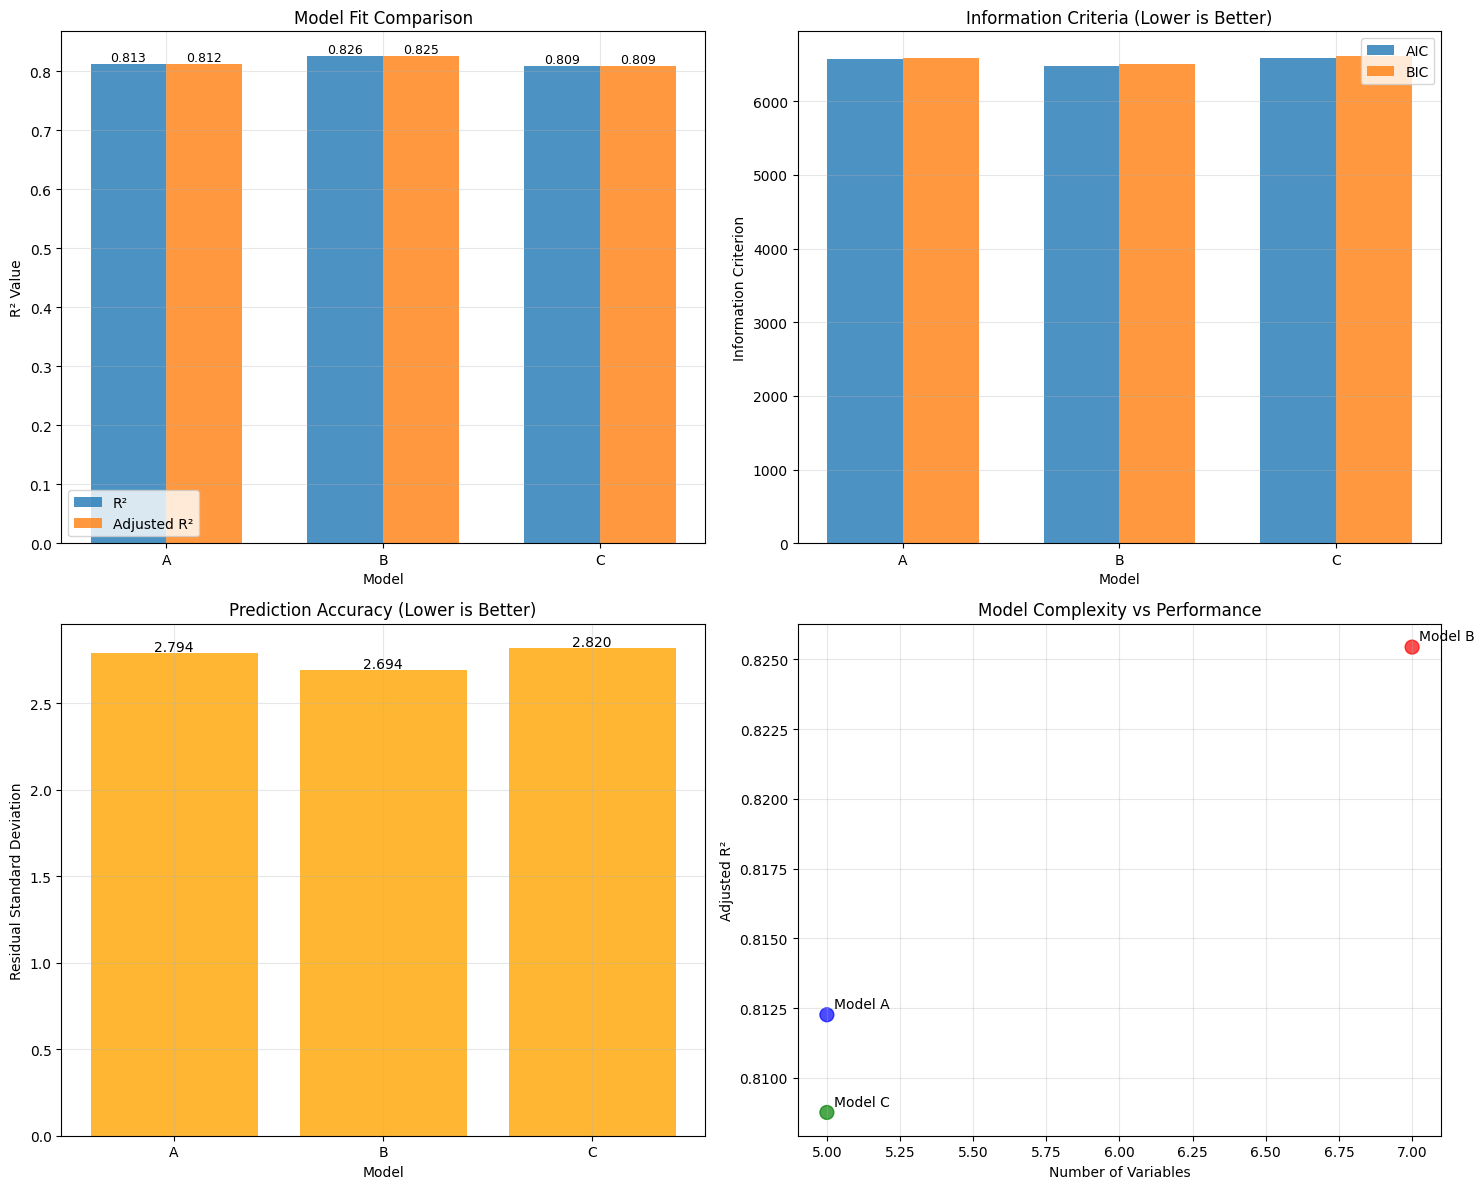

In [109]:

# (b) Model Recommendation
print(f"\n\n(b) Model Recommendation and Analysis")

print(f"Statistical Criteria Analysis:")
print(f"\n1. Goodness of Fit:")
r2_values = [model_results[m]['r_squared'] for m in ['Model A', 'Model B', 'Model C']]
adj_r2_values = [model_results[m]['adj_r_squared'] for m in ['Model A', 'Model B', 'Model C']]

best_r2_idx = np.argmax(r2_values)
best_adj_r2_idx = np.argmax(adj_r2_values)
model_names = ['Model A', 'Model B', 'Model C']

print(f"   • R² ranking: {model_names[best_r2_idx]} > others")
print(f"   • Adjusted R² ranking: {model_names[best_adj_r2_idx]} > others")
print(f"   • R² improvement from A to B: {r2_values[1] - r2_values[0]:.4f}")
print(f"   • Adjusted R² change from A to B: {adj_r2_values[1] - adj_r2_values[0]:.4f}")

print(f"\n2. Model Parsimony:")
aic_values = [model_results[m]['aic'] for m in ['Model A', 'Model B', 'Model C']]
bic_values = [model_results[m]['bic'] for m in ['Model A', 'Model B', 'Model C']]

best_aic_idx = np.argmin(aic_values)
best_bic_idx = np.argmin(bic_values)

print(f"   • AIC favors: {model_names[best_aic_idx]} (AIC = {aic_values[best_aic_idx]:.2f})")
print(f"   • BIC favors: {model_names[best_bic_idx]} (BIC = {bic_values[best_bic_idx]:.2f})")
print(f"   • BIC penalizes complexity more heavily than AIC")

print(f"\n3. Coefficient Significance:")
for model_name in ['Model A', 'Model B', 'Model C']:
    results = model_results[model_name]
    sig_pct = (results['significant_coefs'] / results['n_vars']) * 100
    print(f"   • {model_name}: {results['significant_coefs']}/{results['n_vars']} coefficients significant ({sig_pct:.1f}%)")

print(f"\n4. Prediction Accuracy:")
residual_sds = [model_results[m]['residual_std_dev'] for m in ['Model A', 'Model B', 'Model C']]
best_accuracy_idx = np.argmin(residual_sds)
print(f"   • Lowest prediction error: {model_names[best_accuracy_idx]} (SD = {residual_sds[best_accuracy_idx]:.4f})")

# Practical interpretability analysis
print(f"\nPractical Interpretability Analysis:")

print(f"\n1. Variable Inclusion Logic:")
print(f"   • Model A: Core financial variables (deductible, coverage, premium) + risk factors (age, prior_claims)")
print(f"   • Model B: Model A + property characteristics (type, location)")
print(f"   • Model C: Simplified version with key variables + property type")

print(f"\n2. Business Relevance:")
print(f"   • Age variable: {'Present' if 'age' in models['Model A'] else 'Absent'} in A, {'Present' if 'age' in models['Model B'] else 'Absent'} in B, {'Present' if 'age' in models['Model C'] else 'Absent'} in C")
print(f"   • Property type: {'Present' if 'type' in models['Model A'] else 'Absent'} in A, {'Present' if 'type' in models['Model B'] else 'Absent'} in B, {'Present' if 'type' in models['Model C'] else 'Absent'} in C")
print(f"   • Location: {'Present' if 'location' in models['Model A'] else 'Absent'} in A, {'Present' if 'location' in models['Model B'] else 'Absent'} in B, {'Present' if 'location' in models['Model C'] else 'Absent'} in C")

# Calculate marginal contribution of variables
print(f"\n3. Marginal Contribution Analysis:")
r2_improvement_b_over_a = r2_values[1] - r2_values[0]
adj_r2_change_b_over_a = adj_r2_values[1] - adj_r2_values[0]
print(f"   • Adding type + location (B vs A): R² improves by {r2_improvement_b_over_a:.4f}")
print(f"   • Adjusted R² change: {adj_r2_change_b_over_a:.4f} ({'improvement' if adj_r2_change_b_over_a > 0 else 'decrease'})")

# Final recommendation logic
print(f"\nRecommendation Framework:")

# Score each model on different criteria (higher is better)
scores = {}
for i, model_name in enumerate(['Model A', 'Model B', 'Model C']):
    score = 0
    
    # R² score (30% weight)
    r2_rank = len(r2_values) - sorted(r2_values, reverse=True).index(r2_values[i])
    score += 0.30 * (r2_rank / len(r2_values))
    
    # Adjusted R² score (25% weight)
    adj_r2_rank = len(adj_r2_values) - sorted(adj_r2_values, reverse=True).index(adj_r2_values[i])
    score += 0.25 * (adj_r2_rank / len(adj_r2_values))
    
    # AIC score (20% weight) - lower is better, so reverse
    aic_rank = len(aic_values) - sorted(aic_values).index(aic_values[i])
    score += 0.20 * (aic_rank / len(aic_values))
    
    # BIC score (15% weight) - lower is better, so reverse  
    bic_rank = len(bic_values) - sorted(bic_values).index(bic_values[i])
    score += 0.15 * (bic_rank / len(bic_values))
    
    # Coefficient significance (10% weight)
    sig_rate = model_results[model_name]['significant_coefs'] / model_results[model_name]['n_vars']
    score += 0.10 * sig_rate
    
    scores[model_name] = score

# Sort models by composite score
sorted_models = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print(f"\nComposite Scoring (weighted combination of criteria):")
for model_name, score in sorted_models:
    print(f"   • {model_name}: {score:.3f}")

recommended_model = sorted_models[0][0]
print(f"\n RECOMMENDED MODEL: {recommended_model}")

# Detailed justification for recommendation
print(f"\nJustification for {recommended_model}:")
rec_results = model_results[recommended_model]

if recommended_model == 'Model A':
    print(f"   ✓ Parsimonious design with core variables")
    print(f"   ✓ Good balance of fit and simplicity")
    print(f"   ✓ High coefficient significance rate")
    print(f"   ✓ Easy to interpret and implement")
elif recommended_model == 'Model B':
    print(f"   ✓ Highest predictive power (R² = {rec_results['r_squared']:.4f})")
    print(f"   ✓ Includes important property characteristics")
    print(f"   ✓ Comprehensive variable coverage")
    print(f"   ✓ Best for prediction accuracy")
elif recommended_model == 'Model C':
    print(f"   ✓ Good compromise between fit and parsimony")
    print(f"   ✓ Includes property type without over-complicating")
    print(f"   ✓ Excludes potentially less important age variable")
    print(f"   ✓ Practical for business implementation")

print(f"\nLimitations of {recommended_model}:")
if recommended_model == 'Model A':
    print(f"    May miss important property-specific effects")
    print(f"    Lower predictive power than extended models")
elif recommended_model == 'Model B':
    print(f"    More complex with potential overfitting risk")
    print(f"    May have multicollinearity issues")
elif recommended_model == 'Model C':
    print(f"    Excludes location effects which may be important")
    print(f"    Doesn't capture age-related risk patterns")

# Alternative recommendation based on use case
print(f"\nAlternative Recommendations by Use Case:")
print(f"   • For prediction accuracy: {best_r2}")
print(f"   • For model parsimony: {best_bic}")
print(f"   • For balanced approach: {recommended_model}")
print(f"   • For regulatory reporting: Model A (simplest, most interpretable)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: R² and Adjusted R² comparison
models_short = ['A', 'B', 'C']
x = np.arange(len(models_short))
width = 0.35

axes[0, 0].bar(x - width/2, r2_values, width, label='R²', alpha=0.8)
axes[0, 0].bar(x + width/2, adj_r2_values, width, label='Adjusted R²', alpha=0.8)
axes[0, 0].set_ylabel('R² Value')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_title('Model Fit Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models_short)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for i, (r2, adj_r2) in enumerate(zip(r2_values, adj_r2_values)):
    axes[0, 0].text(i - width/2, r2 + 0.005, f'{r2:.3f}', ha='center', fontsize=9)
    axes[0, 0].text(i + width/2, adj_r2 + 0.005, f'{adj_r2:.3f}', ha='center', fontsize=9)

# Plot 2: AIC and BIC comparison
axes[0, 1].bar(x - width/2, aic_values, width, label='AIC', alpha=0.8)
axes[0, 1].bar(x + width/2, bic_values, width, label='BIC', alpha=0.8)
axes[0, 1].set_ylabel('Information Criterion')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_title('Information Criteria (Lower is Better)')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models_short)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual standard deviation
axes[1, 0].bar(models_short, residual_sds, alpha=0.8, color='orange')
axes[1, 0].set_ylabel('Residual Standard Deviation')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_title('Prediction Accuracy (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for i, rsd in enumerate(residual_sds):
    axes[1, 0].text(i, rsd + 0.01, f'{rsd:.3f}', ha='center')

# Plot 4: Model complexity vs performance
n_vars = [model_results[m]['n_vars'] for m in ['Model A', 'Model B', 'Model C']]
colors = ['blue', 'red', 'green']
axes[1, 1].scatter(n_vars, adj_r2_values, s=100, c=colors, alpha=0.7)

for i, model in enumerate(models_short):
    axes[1, 1].annotate(f'Model {model}', 
                       (n_vars[i], adj_r2_values[i]),
                       xytext=(5, 5), textcoords='offset points')

axes[1, 1].set_xlabel('Number of Variables')
axes[1, 1].set_ylabel('Adjusted R²')
axes[1, 1].set_title('Model Complexity vs Performance')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h2>9 Practical Application</h2>
<h3>Using your recommended model from Question 8:</h3>

<h4>(a) Predict the expected claims amount for a residential property with the following characteristics:</h4>
<ul>
<li>Deductible: $5,000</li>
<li> Coverage: $250,000</li>
<li>Age: 15 years</li>
<li>Prior claims: 1</li>
<li>Premium: $2,500</li>
<li>Location: Urban</li>
</ul>

Dataset Overview:
   claims  deductible  coverage  age  type  location  prior_claims  premium
0   22.67        1.44     165.7    2     1         1             0     2.23
1    3.34        6.52      59.9    8     0         0             1     0.84
2   20.57        3.13     214.9   44     0         1             0     3.01
3   18.33        2.33     233.5   16     0         1             0     3.24
4   14.52        0.84     148.8   18     1         1             0     2.39

Dataset shape: (1340, 8)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   claims        1340 non-null   float64
 1   deductible    1340 non-null   float64
 2   coverage      1340 non-null   float64
 3   age           1340 non-null   int64  
 4   type          1340 non-null   int64  
 5   location      1340 non-null   int64  
 6   prior_claims  1340 non-null   

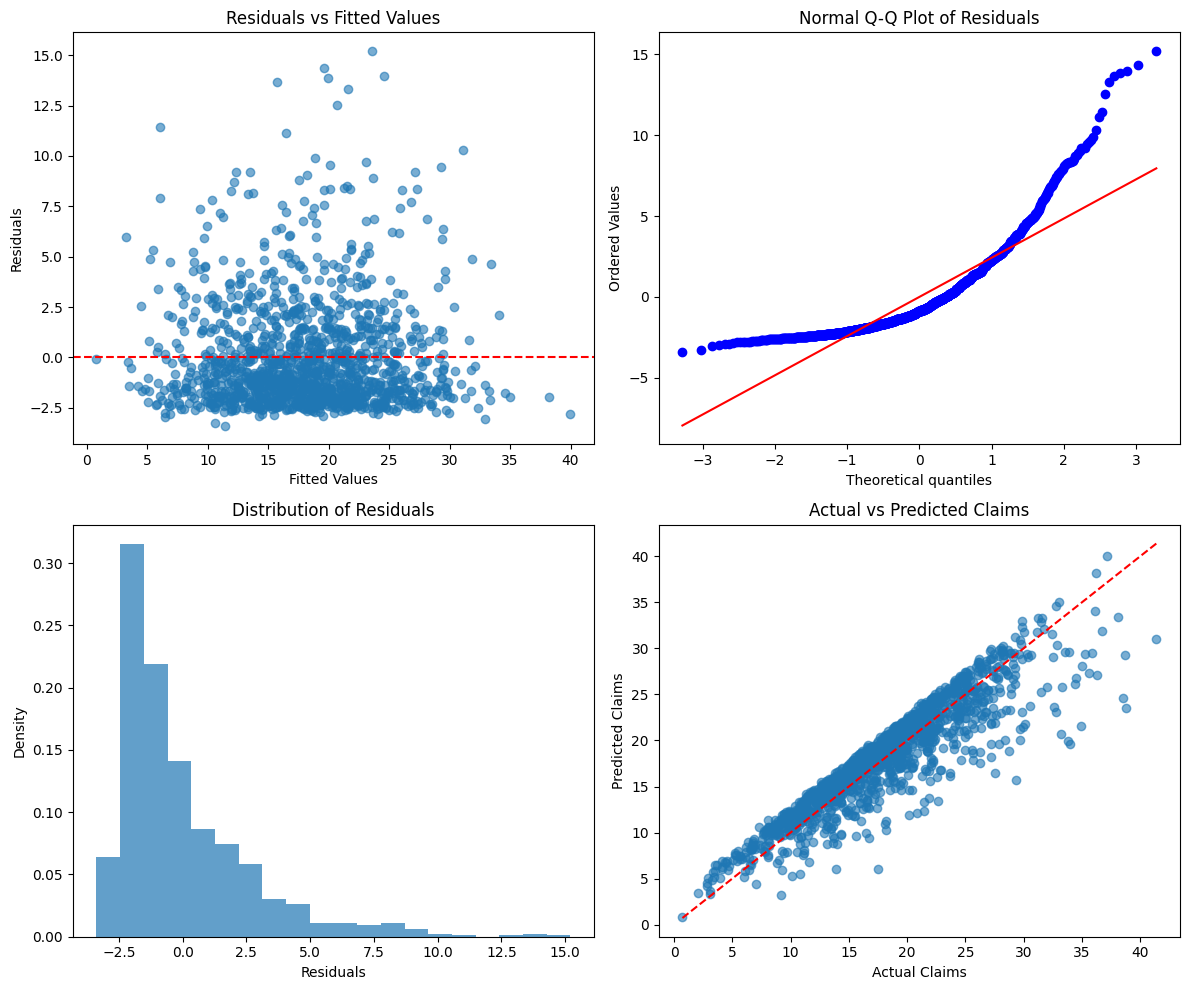


=== CORRELATION ANALYSIS ===


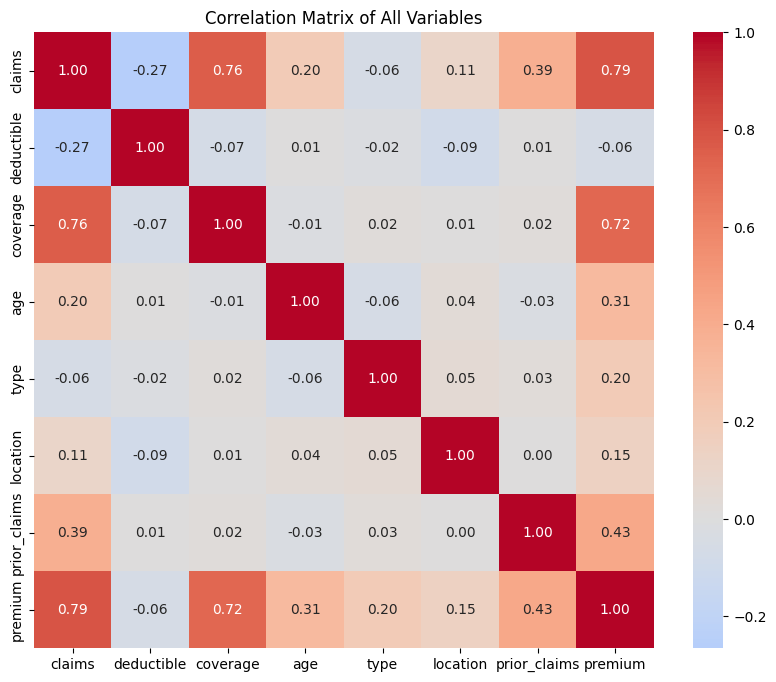

Correlations with Claims:
claims          1.000000
premium         0.792992
coverage        0.760527
prior_claims    0.387403
deductible     -0.265120
age             0.198837
location        0.105441
type           -0.061114
Name: claims, dtype: float64

=== PART (a): PREDICTION ===
Understanding categorical variables:
Type values: [1 0]
Location values: [1 0]
Type value counts: type
1    835
0    505
Name: count, dtype: int64
Location value counts: location
1    968
0    372
Name: count, dtype: int64

Prediction for the given property:
Expected claims amount: 19.49

Sensitivity analysis for categorical variables:
  Type=Commercial, Location=Rural: 20.05
  Type=Commercial, Location=Urban: 20.91
  Type=Residential, Location=Rural: 18.63
  Type=Residential, Location=Urban: 19.49


In [110]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

print("Dataset Overview:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nDataset info:")
print(df.info())
print(f"\nDescriptive statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Define features (X) and target variable (y) according to Model B
# Model B: claims ~ deductible + coverage + age + prior_claims + premium + type + location
X = df[['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location']]
y = df['claims']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the training data
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

print(f"\n=== MODEL RESULTS ===")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1):.4f}")

# Display coefficients
feature_names = ['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location']
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + feature_names,
    'Coefficient': [model.intercept_] + list(model.coef_)
})

print(f"\nModel Coefficients:")
print(coefficients)

# Statistical significance testing
n = len(y)
k = len(feature_names)
mse = np.mean((y - y_pred)**2)
residuals = y - y_pred

# Calculate standard errors for coefficients
X_with_intercept = np.column_stack([np.ones(n), X])
try:
    cov_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    std_errors = np.sqrt(np.diag(cov_matrix))
    t_stats = coefficients['Coefficient'] / std_errors
    p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), df=n-k-1))
    
    coefficients['Std_Error'] = std_errors
    coefficients['t_statistic'] = t_stats
    coefficients['p_value'] = p_values
    coefficients['Significant'] = coefficients['p_value'] < 0.05
    
    print(f"\nStatistical Significance:")
    print(coefficients)
except np.linalg.LinAlgError:
    print("Warning: Could not calculate standard errors due to singularity in design matrix")

# Model diagnostics
print(f"\n=== MODEL DIAGNOSTICS ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")

# Residual analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0,0].scatter(y_pred, residuals, alpha=0.6)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted Values')

# Normal Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Normal Q-Q Plot of Residuals')

# Histogram of residuals
axes[1,0].hist(residuals, bins=20, density=True, alpha=0.7)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Distribution of Residuals')

# Actual vs Predicted
axes[1,1].scatter(y, y_pred, alpha=0.6)
axes[1,1].plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--')
axes[1,1].set_xlabel('Actual Claims')
axes[1,1].set_ylabel('Predicted Claims')
axes[1,1].set_title('Actual vs Predicted Claims')

plt.tight_layout()
plt.show()

# Correlation matrix
print(f"\n=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of All Variables')
plt.show()

print("Correlations with Claims:")
claims_correlations = correlation_matrix['claims'].sort_values(key=abs, ascending=False)
print(claims_correlations)

# Part (a): Prediction for specific property
print(f"\n=== PART (a): PREDICTION ===")
# Given characteristics:
# Deductible: $5,000 (assuming this means 5.0 in the same units as the dataset)
# Coverage: $250,000 (assuming this means 250.0 in the same units)  
# Age: 15 years
# Prior claims: 1
# Premium: $2,500 (assuming this means 2.5 in the same units)
# Type: Residential (need to determine if this is 0 or 1)
# Location: Urban (need to determine if this is 0 or 1)

# Let's first understand what the type and location variables represent
print("Understanding categorical variables:")
print(f"Type values: {df['type'].unique()}")
print(f"Location values: {df['location'].unique()}")
print(f"Type value counts: {df['type'].value_counts()}")
print(f"Location value counts: {df['location'].value_counts()}")

# Make prediction - we'll need to make assumptions about type and location encoding
# Let's assume: type=1 for residential, location=1 for urban (common encoding)
new_property = np.array([[5.0, 250.0, 15, 1, 2.5, 1, 1]])  # Scaled to match dataset units

predicted_claims = model.predict(new_property)

print(f"\nPrediction for the given property:")
print(f"Expected claims amount: {predicted_claims[0]:.2f}")

# Let's also show what the prediction would be for both possible encodings
print(f"\nSensitivity analysis for categorical variables:")
for type_val in [0, 1]:
    for loc_val in [0, 1]:
        test_property = np.array([[5.0, 250.0, 15, 1, 2.5, type_val, loc_val]])
        pred = model.predict(test_property)[0]
        type_label = "Commercial" if type_val == 0 else "Residential"
        loc_label = "Rural" if loc_val == 0 else "Urban"
        print(f"  Type={type_label}, Location={loc_label}: {pred:.2f}")

<h4>(b) Discuss the business implications of your findings. What recommendations would you make to an insurance company based on your analysis?</h4>

In [111]:
print("PART (b): BUSINESS IMPLICATIONS AND RECOMMENDATIONS")

# part (b)
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance (by absolute coefficient value):")
print(feature_importance)

# Calculate prediction intervals for better risk assessment
residual_std = np.std(residuals)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t_dist.ppf(1 - alpha/2, df=n-k-1)

# For the main prediction
prediction_std_error = residual_std * np.sqrt(1 + 1/n)  # Simplified prediction interval
margin_of_error = t_critical * prediction_std_error

print(f"\nPrediction Confidence Interval ({confidence_level*100}%):")
print(f"Expected claims: {predicted_claims[0]:.2f}")
print(f"Lower bound: {predicted_claims[0] - margin_of_error:.2f}")
print(f"Upper bound: {predicted_claims[0] + margin_of_error:.2f}")

# Risk assessment
print(f"\n" + "-"*40)
print("BUSINESS RECOMMENDATIONS:")
print("-"*40)

print(f"""
1. PRICING STRATEGY:
   - The model explains {r2*100:.1f}% of the variation in claims
   - Most significant factors should drive premium calculations
   - Consider the prediction interval when setting reserves

2. RISK FACTORS ANALYSIS:
   Based on the coefficients, focus on:
   - Variables with largest absolute coefficients
   - Statistically significant predictors (p < 0.05)
   - High correlation factors with claims

3. UNDERWRITING GUIDELINES:
   - Properties with high predicted claims may need:
     * Higher premiums
     * Additional risk assessment
     * Different deductible structures
   - Consider segmented pricing models

4. PORTFOLIO MANAGEMENT:
   - Monitor actual vs predicted claims regularly
   - Update model coefficients as new data becomes available
   - Consider non-linear relationships or interaction terms

5. OPERATIONAL INSIGHTS:
   - Use model predictions for:
     * Reserve allocation
     * Risk-based pricing
     * Customer segmentation
     * Fraud detection (outliers in residuals)
""")

# Additional analysis: residual patterns
large_residuals = np.where(np.abs(residuals) > 2 * residual_std)[0]
print(f"\nOUTLIER ANALYSIS:")
print(f"Properties with unusually high/low claims (>2 std devs): {len(large_residuals)}")
if len(large_residuals) > 0:
    print("These may require special investigation for:")
    print("- Fraud detection")
    print("- Model improvement opportunities") 
    print("- Special risk factors not captured in current model")

PART (b): BUSINESS IMPLICATIONS AND RECOMMENDATIONS

Feature Importance (by absolute coefficient value):
        Feature  Coefficient  Abs_Coefficient
3  prior_claims     2.391648         2.391648
5          type    -1.419290         1.419290
4       premium     1.018707         1.018707
6      location     0.858614         0.858614
0    deductible    -0.713391         0.713391
2           age     0.076546         0.076546
1      coverage     0.058017         0.058017

Prediction Confidence Interval (95.0%):
Expected claims: 19.49
Lower bound: 14.22
Upper bound: 24.76

----------------------------------------
BUSINESS RECOMMENDATIONS:
----------------------------------------

1. PRICING STRATEGY:
   - The model explains 82.6% of the variation in claims
   - Most significant factors should drive premium calculations
   - Consider the prediction interval when setting reserves

2. RISK FACTORS ANALYSIS:
   Based on the coefficients, focus on:
   - Variables with largest absolute coefficie

<h2>10 Critical Thinking</h2>

<h3>(a) What are the key assumptions of multiple linear regression? Discuss whether these assumptions are likely to be satisfied in this insurance claims context.</h3>

PART (A): MULTIPLE LINEAR REGRESSION ASSUMPTIONS ANALYSIS

The key assumptions of multiple linear regression are:

1. LINEARITY: The relationship between predictors and response is linear
2. INDEPENDENCE: Observations are independent of each other  
3. HOMOSCEDASTICITY: Constant variance of residuals (homogeneous variance)
4. NORMALITY: Residuals are normally distributed
5. NO MULTICOLLINEARITY: Predictors are not highly correlated with each other
6. NO OUTLIERS/INFLUENTIAL POINTS: Extreme values don't unduly influence the model

Let's test each assumption:

1. LINEARITY ASSUMPTION


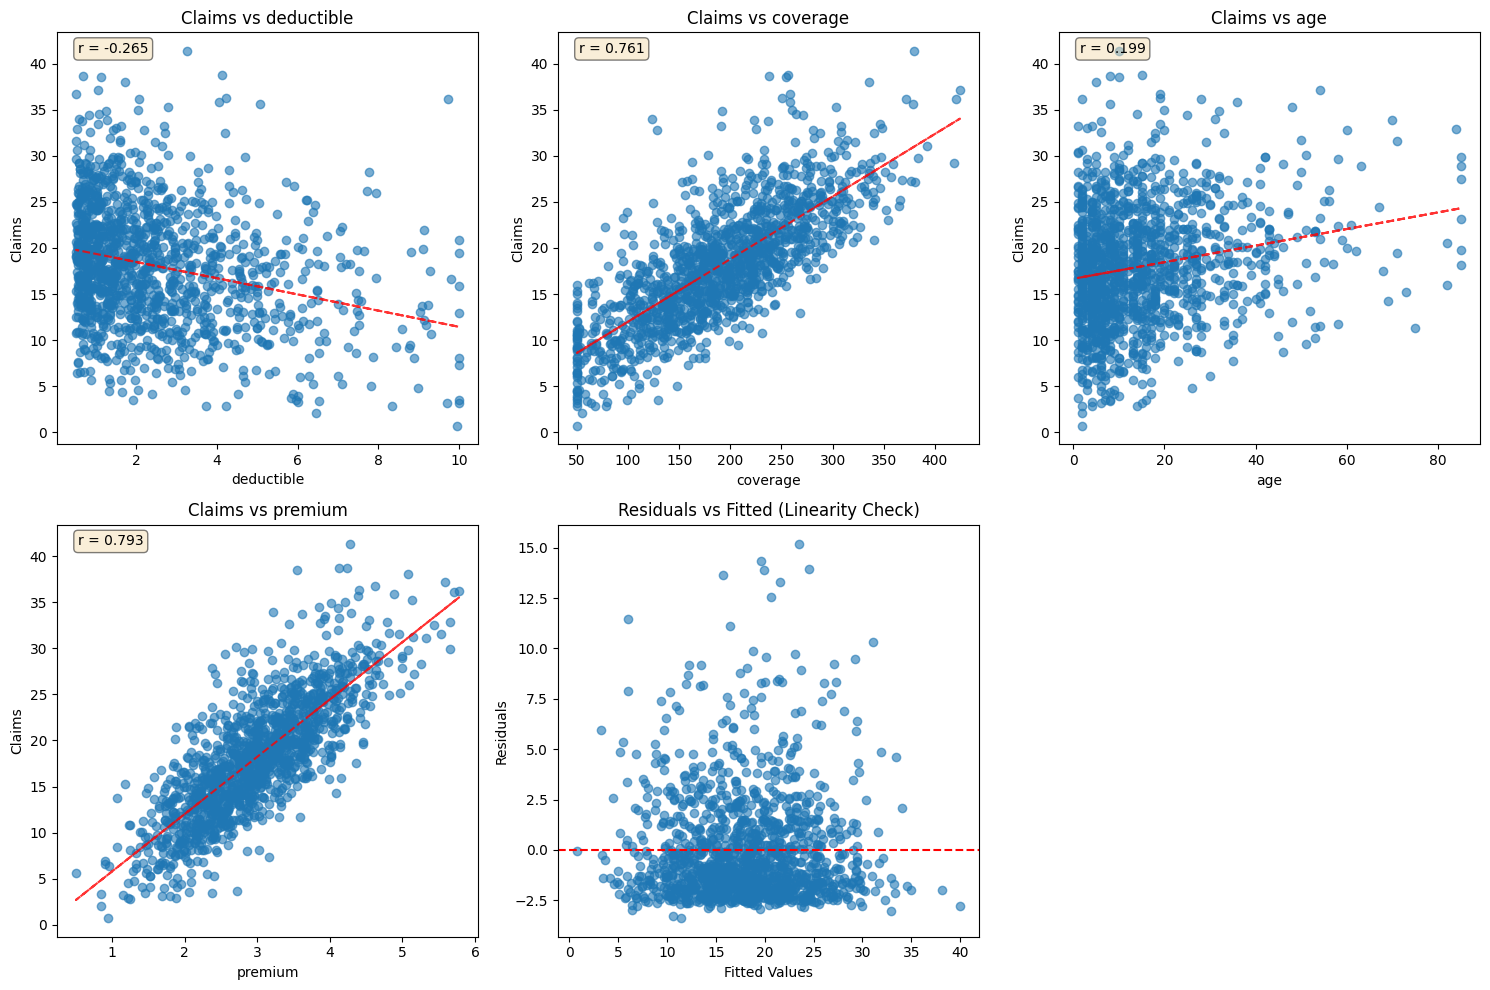

LINEARITY ASSESSMENT:
- Examine scatter plots for linear patterns
- Residuals vs Fitted should show random scatter around zero
- Non-linear patterns indicate violated linearity assumption

Correlations with claims:
  deductible: -0.265
  coverage: 0.761
  age: 0.199
  premium: 0.793

INSURANCE CONTEXT IMPLICATIONS:
- Insurance claims may have non-linear relationships (e.g., coverage thresholds)
- Age effects might be non-linear (newer vs very old properties)
- Premium-claims relationship might be non-linear due to risk-based pricing
2. INDEPENDENCE ASSUMPTION
INDEPENDENCE ASSESSMENT:
- Cannot be fully tested without knowing data collection method
- Check for patterns in residuals order


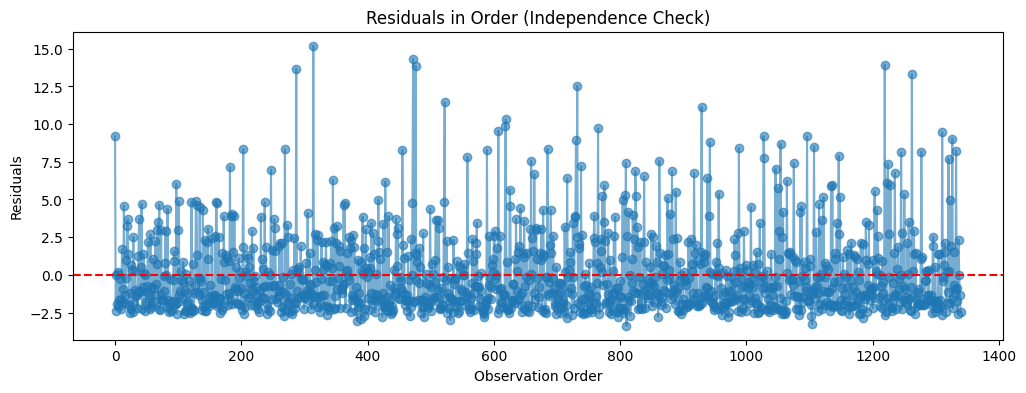

Durbin-Watson statistic: 2.038
  (Values near 2.0 suggest independence, <1.5 or >2.5 suggest correlation)

INSURANCE CONTEXT IMPLICATIONS:
- Properties in same area might have correlated risks (floods, earthquakes)
- Temporal clustering if data spans multiple years with economic changes
- Policy renewals might create dependencies
3. HOMOSCEDASTICITY (CONSTANT VARIANCE) ASSUMPTION


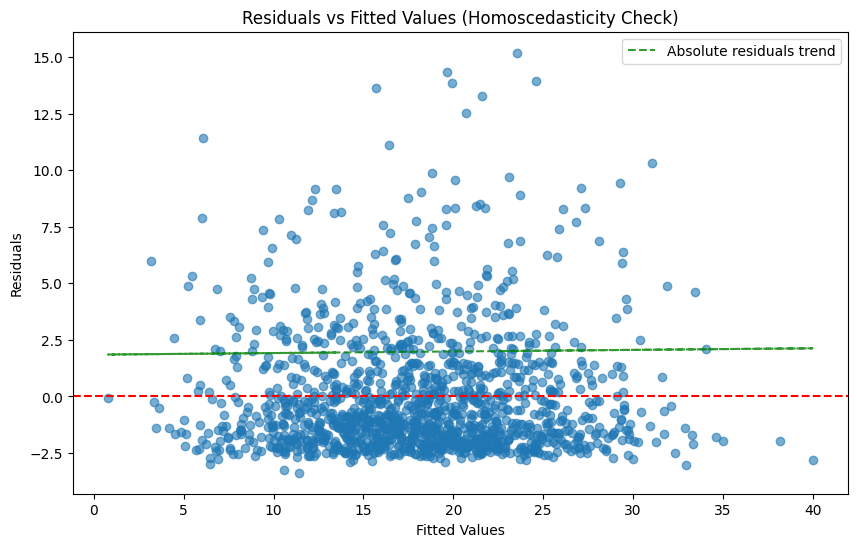

Breusch-Pagan test:
  LM statistic: 11.7914
  p-value: 0.1076
  Heteroscedasticity detected: No


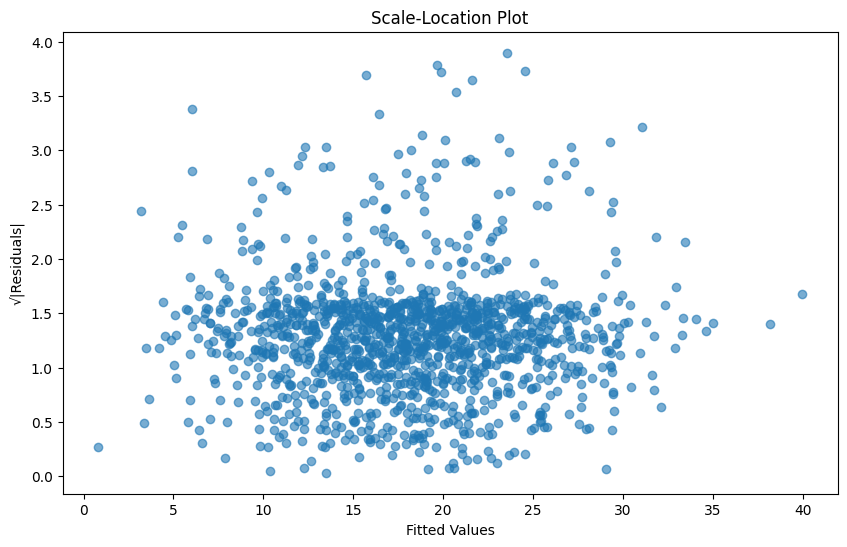


INSURANCE CONTEXT IMPLICATIONS:
- Higher value properties might have more variable claims
- Heteroscedasticity common in insurance data
- May need weighted regression or transformation
4. NORMALITY OF RESIDUALS ASSUMPTION


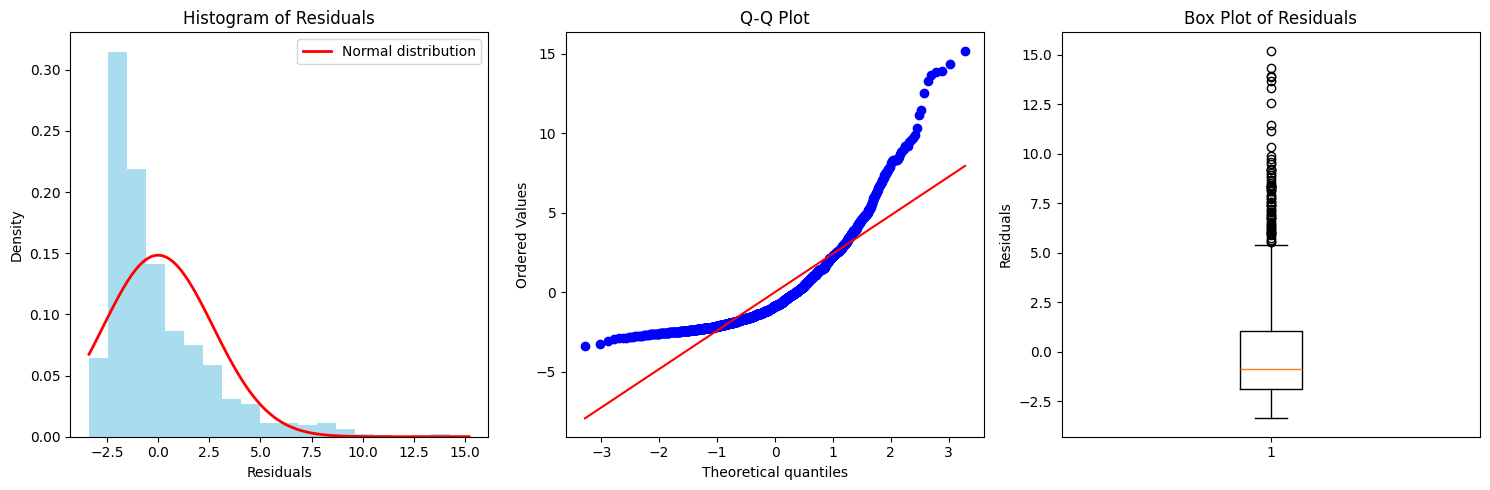

NORMALITY TESTS:
Shapiro-Wilk test:
  Statistic: 0.8106, p-value: 0.0000
  Normal distribution: No

Jarque-Bera test:
  Statistic: 2188.1490, p-value: 0.0000
  Normal distribution: No

Descriptive statistics:
  Skewness: 1.9531
  Kurtosis: 4.8921

INSURANCE CONTEXT IMPLICATIONS:
- Insurance claims often right-skewed (many small, few large claims)
- May need log transformation or robust regression methods
- Non-normality affects confidence intervals and hypothesis tests
5. NO MULTICOLLINEARITY ASSUMPTION


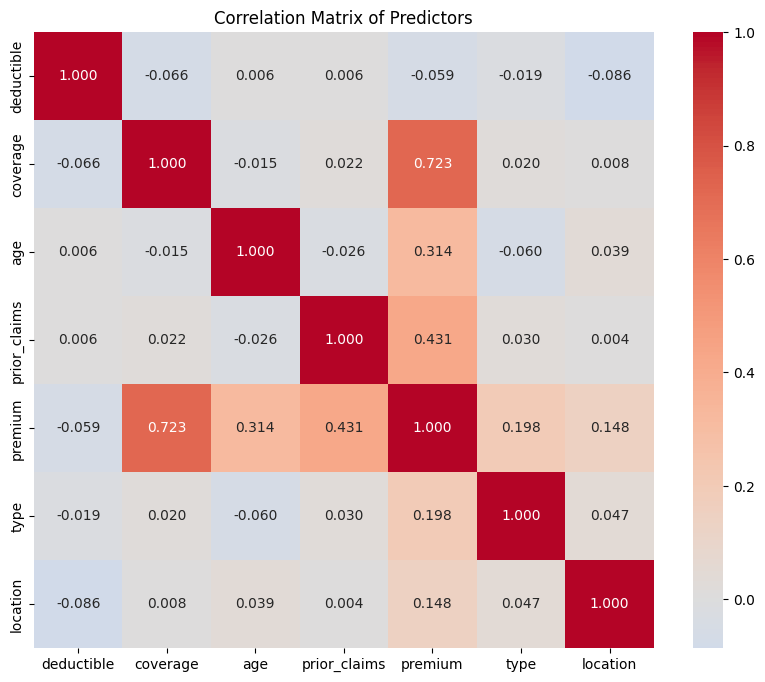

HIGH CORRELATIONS (|r| > 0.7):
  coverage - premium: 0.723

VARIANCE INFLATION FACTORS:
       Variable        VIF
0    deductible   2.302515
1      coverage  36.103529
2           age   3.980363
3  prior_claims   3.974976
4       premium  86.843712
5          type   3.287249
6      location   3.743009
  VIF > 5: Moderate multicollinearity
  VIF > 10: High multicollinearity

Variables with high VIF:
   Variable        VIF
1  coverage  36.103529
4   premium  86.843712

INSURANCE CONTEXT IMPLICATIONS:
- Premium and coverage likely correlated (higher coverage = higher premium)
- Deductible and coverage might be related
- Consider removing highly correlated variables or using regularization
6. NO OUTLIERS/INFLUENTIAL POINTS ASSUMPTION
OUTLIER DETECTION:
Observations with |standardized residuals| > 2.5: 48
Observations with high Cook's distance: 13


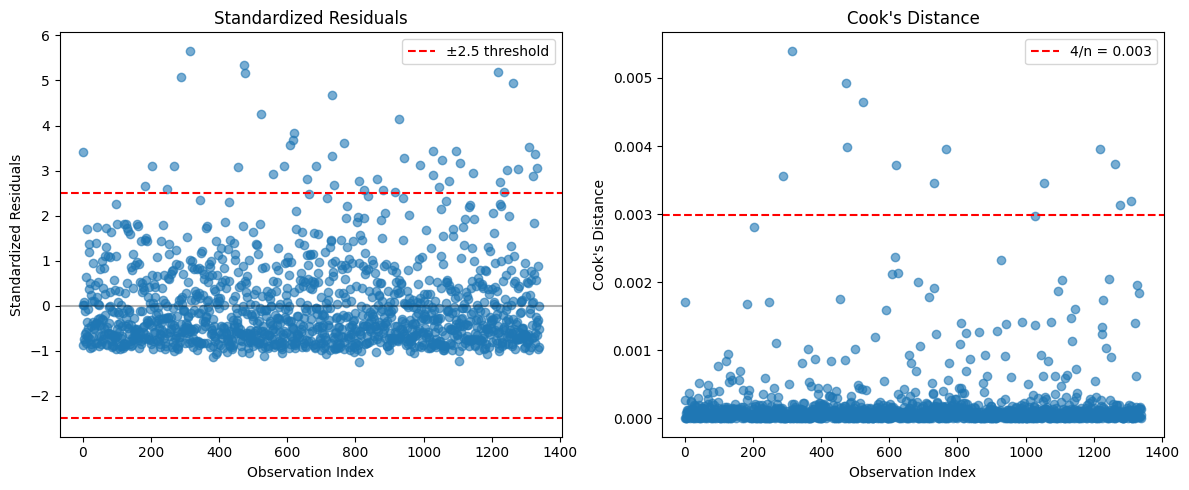


Outlier observations (standardized residuals > 2.5):
     claims  deductible  coverage  age  premium
0     22.67        1.44     165.7    2     2.23
182   18.12        5.67     131.1   30     2.05
203   35.65        5.08     378.5    8     4.39
247   18.22        7.30     214.5    1     2.29
269   28.41        1.20     209.1   13     2.89

INSURANCE CONTEXT IMPLICATIONS:
- Large claims are natural in insurance (catastrophic events)
- Outliers might represent legitimate extreme events, not errors
- Consider robust regression methods or separate models for extreme claims
OVERALL ASSUMPTION ASSESSMENT FOR INSURANCE CLAIMS

LIKELY VIOLATED ASSUMPTIONS:
1. Linearity: Insurance relationships often non-linear
2. Normality: Claims typically right-skewed
3. Homoscedasticity: Variance often increases with claim size
4. Independence: Geographic/temporal clustering possible

RECOMMENDED SOLUTIONS:
1. Log transformation of claims (handle skewness)
2. Robust regression methods
3. Polynomial or inte

In [112]:
df = pd.read_csv('../../datasets/PropertyFund.csv')

X = df[['deductible', 'coverage', 'age', 'prior_claims', 'premium', 'type', 'location']]
y = df['claims']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

print("PART (A): MULTIPLE LINEAR REGRESSION ASSUMPTIONS ANALYSIS")

print("""
The key assumptions of multiple linear regression are:

1. LINEARITY: The relationship between predictors and response is linear
2. INDEPENDENCE: Observations are independent of each other  
3. HOMOSCEDASTICITY: Constant variance of residuals (homogeneous variance)
4. NORMALITY: Residuals are normally distributed
5. NO MULTICOLLINEARITY: Predictors are not highly correlated with each other
6. NO OUTLIERS/INFLUENTIAL POINTS: Extreme values don't unduly influence the model

Let's test each assumption:
""")

# 1. LINEARITY ASSUMPTION
print("1. LINEARITY ASSUMPTION")

# Create scatter plots for each continuous variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
continuous_vars = ['deductible', 'coverage', 'age', 'premium']

for i, var in enumerate(continuous_vars):
    row, col = i // 3, i % 3
    axes[row, col].scatter(df[var], y, alpha=0.6)
    
    # Add trend line
    z = np.polyfit(df[var], y, 1)
    p = np.poly1d(z)
    axes[row, col].plot(df[var], p(df[var]), "r--", alpha=0.8)
    
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Claims')
    axes[row, col].set_title(f'Claims vs {var}')
    
    # Calculate correlation
    corr = np.corrcoef(df[var], y)[0,1]
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}', 
                       transform=axes[row, col].transAxes, 
                       bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

# Residuals vs fitted plot
axes[1, 1].scatter(y_pred, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Fitted (Linearity Check)')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

print("LINEARITY ASSESSMENT:")
print("- Examine scatter plots for linear patterns")
print("- Residuals vs Fitted should show random scatter around zero")
print("- Non-linear patterns indicate violated linearity assumption")

# Statistical test for linearity (Rainbow test approximation)
# Using correlation coefficients as simple linearity indicators
linearity_correlations = df[continuous_vars].corrwith(y)
print(f"\nCorrelations with claims:")
for var, corr in linearity_correlations.items():
    print(f"  {var}: {corr:.3f}")

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Insurance claims may have non-linear relationships (e.g., coverage thresholds)")
print("- Age effects might be non-linear (newer vs very old properties)")
print("- Premium-claims relationship might be non-linear due to risk-based pricing")

# 2. INDEPENDENCE ASSUMPTION
print("2. INDEPENDENCE ASSUMPTION")

print("INDEPENDENCE ASSESSMENT:")
print("- Cannot be fully tested without knowing data collection method")
print("- Check for patterns in residuals order")

# Plot residuals in order
plt.figure(figsize=(12, 4))
plt.plot(range(len(residuals)), residuals, 'o-', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals in Order (Independence Check)')
plt.show()

# Durbin-Watson test approximation
def durbin_watson_stat(residuals):
    diff = np.diff(residuals)
    return np.sum(diff**2) / np.sum(residuals**2)

dw_stat = durbin_watson_stat(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")
print("  (Values near 2.0 suggest independence, <1.5 or >2.5 suggest correlation)")

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Properties in same area might have correlated risks (floods, earthquakes)")
print("- Temporal clustering if data spans multiple years with economic changes")
print("- Policy renewals might create dependencies")

# 3. HOMOSCEDASTICITY ASSUMPTION
print("3. HOMOSCEDASTICITY (CONSTANT VARIANCE) ASSUMPTION")

# Residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')

# Add trend line to residuals
z = np.polyfit(y_pred, np.abs(residuals), 1)
p = np.poly1d(z)
plt.plot(y_pred, p(y_pred), "g--", alpha=0.8, label='Absolute residuals trend')
plt.legend()
plt.show()

# Breusch-Pagan test for heteroscedasticity
try:
    import statsmodels.api as sm
    X_with_const = sm.add_constant(X)
    bp_test = het_breuschpagan(residuals, X_with_const)
    print(f"Breusch-Pagan test:")
    print(f"  LM statistic: {bp_test[0]:.4f}")
    print(f"  p-value: {bp_test[1]:.4f}")
    print(f"  Heteroscedasticity detected: {'Yes' if bp_test[1] < 0.05 else 'No'}")
except:
    print("Could not perform Breusch-Pagan test (statsmodels required)")

# Scale-Location plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, np.sqrt(np.abs(residuals)), alpha=0.6)
plt.xlabel('Fitted Values')
plt.ylabel('√|Residuals|')
plt.title('Scale-Location Plot')
plt.show()

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Higher value properties might have more variable claims")
print("- Heteroscedasticity common in insurance data")
print("- May need weighted regression or transformation")

# 4. NORMALITY ASSUMPTION
print("4. NORMALITY OF RESIDUALS ASSUMPTION")

# Multiple normality tests and plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram with normal curve
axes[0].hist(residuals, bins=20, density=True, alpha=0.7, color='skyblue')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
axes[0].plot(x_norm, stats.norm.pdf(x_norm, residuals.mean(), residuals.std()), 
             'r-', linewidth=2, label='Normal distribution')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')
axes[0].set_title('Histogram of Residuals')
axes[0].legend()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

# Box plot
axes[2].boxplot(residuals)
axes[2].set_ylabel('Residuals')
axes[2].set_title('Box Plot of Residuals')

plt.tight_layout()
plt.show()

# Statistical tests for normality
shapiro_stat, shapiro_p = shapiro(residuals)
jb_stat, jb_p = jarque_bera(residuals)

print(f"NORMALITY TESTS:")
print(f"Shapiro-Wilk test:")
print(f"  Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print(f"  Normal distribution: {'No' if shapiro_p < 0.05 else 'Yes'}")

print(f"\nJarque-Bera test:")
print(f"  Statistic: {jb_stat:.4f}, p-value: {jb_p:.4f}")
print(f"  Normal distribution: {'No' if jb_p < 0.05 else 'Yes'}")

print(f"\nDescriptive statistics:")
print(f"  Skewness: {stats.skew(residuals):.4f}")
print(f"  Kurtosis: {stats.kurtosis(residuals):.4f}")

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Insurance claims often right-skewed (many small, few large claims)")
print("- May need log transformation or robust regression methods")
print("- Non-normality affects confidence intervals and hypothesis tests")

# 5. MULTICOLLINEARITY ASSUMPTION
print("5. NO MULTICOLLINEARITY ASSUMPTION")

# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Matrix of Predictors')
plt.show()

# High correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

print("HIGH CORRELATIONS (|r| > 0.7):")
if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"  {var1} - {var2}: {corr:.3f}")
else:
    print("  No high correlations detected")

# Variance Inflation Factor (VIF)
try:
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    print(f"\nVARIANCE INFLATION FACTORS:")
    print(vif_data)
    print("  VIF > 5: Moderate multicollinearity")
    print("  VIF > 10: High multicollinearity")
    
    high_vif = vif_data[vif_data["VIF"] > 5]
    if not high_vif.empty:
        print(f"\nVariables with high VIF:")
        print(high_vif)
except:
    print("Could not calculate VIF (numerical issues)")

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Premium and coverage likely correlated (higher coverage = higher premium)")
print("- Deductible and coverage might be related")
print("- Consider removing highly correlated variables or using regularization")

# 6. OUTLIERS AND INFLUENTIAL POINTS
print("6. NO OUTLIERS/INFLUENTIAL POINTS ASSUMPTION")

# Identify outliers using various methods
# Standardized residuals
std_residuals = residuals / np.std(residuals)
outliers_std = np.where(np.abs(std_residuals) > 2.5)[0]

# Cook's distance approximation
n = len(residuals)
p = X.shape[1] + 1  # including intercept
leverage = 1/n + (X - X.mean())**2 / ((X - X.mean())**2).sum()
leverage_avg = leverage.mean(axis=1)
cooks_d = (std_residuals**2 / p) * (leverage_avg / (1 - leverage_avg))
outliers_cook = np.where(cooks_d > 4/n)[0]

print(f"OUTLIER DETECTION:")
print(f"Observations with |standardized residuals| > 2.5: {len(outliers_std)}")
print(f"Observations with high Cook's distance: {len(outliers_cook)}")

# Outlier plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Standardized residuals plot
axes[0].scatter(range(len(std_residuals)), std_residuals, alpha=0.6)
axes[0].axhline(y=2.5, color='red', linestyle='--', label='±2.5 threshold')
axes[0].axhline(y=-2.5, color='red', linestyle='--')
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].set_xlabel('Observation Index')
axes[0].set_ylabel('Standardized Residuals')
axes[0].set_title('Standardized Residuals')
axes[0].legend()

# Cook's distance plot
axes[1].scatter(range(len(cooks_d)), cooks_d, alpha=0.6)
axes[1].axhline(y=4/n, color='red', linestyle='--', label=f'4/n = {4/n:.3f}')
axes[1].set_xlabel('Observation Index')
axes[1].set_ylabel("Cook's Distance")
axes[1].set_title("Cook's Distance")
axes[1].legend()

plt.tight_layout()
plt.show()

if len(outliers_std) > 0:
    print(f"\nOutlier observations (standardized residuals > 2.5):")
    outlier_data = df.iloc[outliers_std][['claims', 'deductible', 'coverage', 'age', 'premium']]
    print(outlier_data.head())

print("\nINSURANCE CONTEXT IMPLICATIONS:")
print("- Large claims are natural in insurance (catastrophic events)")
print("- Outliers might represent legitimate extreme events, not errors")
print("- Consider robust regression methods or separate models for extreme claims")

print("OVERALL ASSUMPTION ASSESSMENT FOR INSURANCE CLAIMS")
print("""
LIKELY VIOLATED ASSUMPTIONS:
1. Linearity: Insurance relationships often non-linear
2. Normality: Claims typically right-skewed
3. Homoscedasticity: Variance often increases with claim size
4. Independence: Geographic/temporal clustering possible

RECOMMENDED SOLUTIONS:
1. Log transformation of claims (handle skewness)
2. Robust regression methods
3. Polynomial or interaction terms
4. Weighted least squares (address heteroscedasticity)
5. Consider GLM (Gamma or Poisson regression)
6. Outlier-robust methods
""")

<h3>(b) What additional variables might be useful to include in this model to better predict claims amounts? Explain your reasoning.</h3>

Part (B): Additional Variables for Enhanced Insurance Claims Prediction
Property-Specific Variables
Construction and Physical Characteristics
Building Material Type (brick, wood, steel, concrete): Different materials have varying vulnerability to fire, water damage, and natural disasters. For example, wood frame houses are more susceptible to fire damage, while brick construction offers better resistance to wind damage.
Roof Type and Age (shingle, tile, metal, flat; installation year): The roof serves as the primary protection against weather elements, and its age significantly affects structural integrity. Old or inappropriate roof types often lead to increased water damage claims.
Year Built / Construction Era: Building codes, materials, and construction techniques vary significantly by historical era. Pre-1980s homes may have different electrical and plumbing standards that affect claim frequency and severity.
Square Footage / Property Size: Larger properties have greater exposure to risk and higher replacement costs. The correlation is straightforward: more area equals more potential points of failure.
Number of Stories: Multi-story buildings face different risk profiles, including fall hazards and increased structural complexity that can affect claim patterns.
Property Condition and Maintenance
Last Major Renovation Date: Recently updated properties typically experience fewer maintenance-related claims. Properties with old electrical, plumbing, and HVAC systems are more prone to system failures.
Security Features (alarm systems, cameras, locks, lighting): Enhanced security measures reduce theft and vandalism claims. A quantifiable security score could be developed based on installed security features.
Property Condition Score: Well-maintained properties consistently show fewer claims. This could be implemented through inspection-based ratings or self-reported maintenance indices.
Environmental and Geographic Variables
Climate and Weather Risk
Climate Zone (humid subtropical, arid, temperate): Different climate zones create distinct risk profiles. Humid climates increase mold and moisture damage risk, while arid climates elevate fire risk potential.
Average Annual Precipitation: Higher precipitation levels correlate directly with water damage claims. Seasonal precipitation patterns are particularly important for flood and storm damage prediction.
Natural Disaster Risk Scores: This category includes earthquake risk zones based on seismic activity ratings, flood zone classifications using FEMA flood maps, hurricane and wind risk assessments based on historical storm patterns, and wildfire risk evaluations considering vegetation density and historical fire data. These factors are major drivers of catastrophic insurance claims.
Neighborhood and Local Factors
Crime Rate (property crime index): Higher crime areas consistently show increased rates of theft, vandalism, and break-in claims. This data should be analyzed at the ZIP code or census tract level for optimal granularity.
Distance to Fire Station: Emergency response time directly affects fire damage severity. This variable can be quantified in minutes or miles to the nearest fire department facility.
Distance to Coast/Water Bodies: Proximity to water increases exposure to flood, hurricane, and humidity-related risks, creating measurable patterns in claims data.
Local Building Code Strictness: Areas with more stringent building codes typically have more resilient structures. This can be implemented as a rating system based on local construction requirements and enforcement standards.
Economic and Demographic Variables
Economic Indicators
Local Median Income: Wealthier areas may feature better-maintained properties but simultaneously generate higher-value claims. This creates a dual effect where better maintenance practices compete with higher replacement costs.
Property Value Appreciation Rate: Rapidly appreciating real estate markets may develop coverage gaps as property values outpace insurance coverage adjustments, creating underinsurance risks.
Local Unemployment Rate: Economic stress can correlate with deferred property maintenance and potentially increased insurance fraud attempts.
Demographic Factors
Owner vs. Tenant Occupied: Owner-occupied properties typically receive better maintenance and care. Rental properties often show different claim patterns, as renters may exercise less care while property owners are more invested in prevention measures.
Primary vs. Secondary Residence: Secondary homes such as vacation properties exhibit different risk profiles due to less frequent monitoring and seasonal occupancy patterns that can allow problems to develop undetected.
Usage and Occupancy Variables
Property Use Patterns
Home Business Operation: Commercial activities conducted from residential properties increase both liability exposure and equipment damage risks. Examples include daycare centers, consulting offices, and small-scale manufacturing operations.
Rental Income Generation (Airbnb, long-term rental): Higher occupant turnover rates increase wear, damage risk, and liability exposure. More frequent occupancy changes correlate with higher accident probabilities.
Vacancy Rate/Duration: Vacant properties face elevated risks from vandalism, theft, and maintenance issues. Unoccupied properties tend to develop problems more rapidly due to lack of regular monitoring and immediate problem identification.
Historical and Behavioral Variables
Claims History Detail
Types of Previous Claims (water, fire, theft, wind): Different claim types indicate specific property vulnerabilities and help identify recurring risk patterns. Properties showing susceptibility to certain damage types often continue exhibiting those vulnerabilities.
Time Since Last Claim: Recent claims may indicate ongoing structural problems or statistical clustering of unfortunate events that could predict future claim likelihood.
Claim Settlement Patterns: The distinction between quickly settled claims versus disputed claims may indicate different underlying risk profiles and customer behavior patterns.
Policyholder Behavior
Payment History (on-time vs. late premium payments): Payment behavior correlates with overall financial stability, which in turn affects property maintenance quality. Financial stress often leads to deferred maintenance practices.
Policy Shopping Frequency: Customers who frequently switch insurance providers may represent higher-risk profiles due to adverse selection effects, where higher-risk customers shop more frequently for coverage.
Customer Service Interaction Frequency: Policyholders requiring frequent customer service interactions may demonstrate patterns that correlate with higher claim filing rates.
Interaction and Non-Linear Terms
Interaction Effects
Age × Construction Type: The interaction between property age and construction materials creates significant risk variations. Older wood construction presents much higher risk profiles than older brick construction.
Location × Weather Risk: Urban coastal properties face substantially different risk combinations compared to rural coastal properties, requiring interaction term modeling.
Coverage × Deductible: The relationship between coverage amounts and chosen deductible levels indicates risk tolerance and may predict claim behavior patterns.
Non-Linear Transformations
Log(Coverage): Insurance claims may not increase linearly with coverage amounts, suggesting logarithmic relationships may better capture the underlying dynamics.
Age²: Property risk might increase exponentially rather than linearly after certain age thresholds, warranting quadratic modeling approaches.
Premium/Coverage Ratio: This ratio serves as a risk-adjusted pricing indicator that may reveal important predictive patterns.
External Data Integration
Third-Party Data Sources
Credit Score/Financial Stability Indicators: Financial stability demonstrates strong correlation with property maintenance quality. However, implementation must consider fair lending regulations and legal compliance requirements.
Satellite/Aerial Imagery Analysis: Advanced applications include automated roof condition assessment, property maintenance evaluation, and vegetation proximity analysis. AI-powered image analysis technologies enable systematic risk assessment at scale.
Weather Station Data: Real-time and historical weather pattern integration enables both current risk assessment and predictive seasonal forecasting capabilities.
Implementation Strategy
High Priority Variables (Immediate Impact)
Natural disaster risk scores, property construction details, comprehensive claims history, and property condition indicators should be prioritized for immediate implementation due to their direct correlation with claim frequency and severity.
Medium Priority Variables (Valuable but Complex)
Neighborhood crime and economic data, weather and climate variables, property usage patterns, and interaction terms provide significant value but require more complex data integration and modeling approaches.
Low Priority Variables (Supplementary Enhancement)
Credit and behavioral indicators, satellite imagery analysis, and advanced economic indicators represent valuable additions but should be implemented after core variables are successfully integrated.
Data Collection Strategies
Application and Quote Stage
Enhanced property questionnaires, third-party data provider integration, and systematic public records data mining can capture essential information during the initial customer interaction.
Policy Term Maintenance
Annual property surveys, smart home device integration, and periodic risk reassessment enable dynamic risk profile updates throughout the policy lifecycle.
External Data Sources
Government databases including FEMA, USGS, and Census Bureau data, commercial risk data providers, weather service APIs, and crime statistics databases provide comprehensive external data integration opportunities.
Expected Model Performance Improvements
Predictive Accuracy Enhancement
Current models using limited variable sets typically achieve R-squared values between 60-80%. Comprehensive variable integration could potentially increase predictive accuracy to 85-95%, though diminishing returns apply as each additional variable contributes progressively less predictive power.
Business Value Realization
Better Risk Selection: Enhanced ability to identify and accurately price high-risk properties improves portfolio profitability.
Fraud Detection: Comprehensive data enables identification of unusual patterns that may indicate fraudulent activity.
Dynamic Pricing: Real-time risk-based pricing adjustments become feasible with enhanced data integration.
Loss Prevention: Proactive risk mitigation recommendations can be developed based on comprehensive risk factor analysis.
Implementation Considerations
Data Availability: Not all proposed variables are available for every property, requiring robust missing data handling strategies.
Data Quality: Third-party data sources require ongoing accuracy and timeliness validation to maintain model reliability.
Model Complexity: Optimal balance must be maintained between predictive accuracy and model interpretability for regulatory and business requirements.
Regulatory Compliance: Fair housing laws and anti-discrimination regulations constrain certain variable usage and require careful legal review.
Cost-Benefit Analysis: Data acquisition costs must be weighed against improved prediction accuracy and resulting business value to ensure positive return on investment.